In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_log_error
from prophet import Prophet



In [3]:
full_train = pd.read_csv('train_0irEZ2H.csv', parse_dates=['week'])
full_test = pd.read_csv('test_nfaJ3J5.csv', parse_dates=['week'])


full_train.fillna(0, inplace=True)
full_test.fillna(0,inplace= True)

In [4]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150150 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [5]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        13860 non-null  int64         
 1   week             13860 non-null  datetime64[ns]
 2   store_id         13860 non-null  int64         
 3   sku_id           13860 non-null  int64         
 4   total_price      13860 non-null  float64       
 5   base_price       13860 non-null  float64       
 6   is_featured_sku  13860 non-null  int64         
 7   is_display_sku   13860 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 866.4 KB


In [6]:
dataset = [v for k, v in full_train.groupby(['sku_id','store_id'])]
test_dataset = [v for k, v in full_test.groupby(['sku_id','store_id'])]
len(test_dataset)

1155

In [7]:
for i in range(len(test_dataset)):
    test_dataset[i]['units_sold'] = np.zeros(len(test_dataset[0]))

In [8]:
test_dataset[0]

record_ID       week  store_id  sku_id  total_price  base_price  \
75        212743 2013-07-16      8023  216233     139.6500    139.6500   
1230      214382 2013-07-23      8023  216233     117.5625    139.6500   
2385      216019 2013-07-30      8023  216233     118.2750    139.6500   
3540      217656 2013-06-08      8023  216233     118.2750    139.6500   
4695      219295 2013-08-13      8023  216233     139.6500    139.6500   
5850      220927 2013-08-20      8023  216233     136.0875    136.0875   
7005      222564 2013-08-27      8023  216233     137.5125    137.5125   
8160      224204 2013-03-09      8023  216233     136.8000    136.8000   
9315      225834 2013-10-09      8023  216233     138.2250    138.2250   
10470     227466 2013-09-17      8023  216233     140.3625    140.3625   
11625     229106 2013-09-24      8023  216233     140.3625    140.3625   
12780     230744 2013-01-10      8023  216233     141.0750    141.0750   

       is_featured_sku  is_display_sku  units_sold  
75                   0               0         0.0  
1230                 0               1         0.0  
2385                 0               1         0.0  
3540                 0               0         0.0  
4695                 0               0         0.0  
5850                 0               0         0.0  
7005                 0               0         0.0  
8160                 0               0         0.0  
9315                 0               0         0.0  
10470                0               0         0.0  
11625                0               0         0.0  
12780                0               0         0.0

In [9]:
dataset[0][['week','units_sold']][:104]

week  units_sold
75     2011-01-17         114
1230   2011-01-24          87
2385   2011-01-31         135
3540   2011-07-02         115
4695   2011-02-14          93
...           ...         ...
114420 2012-11-12         160
115575 2012-12-18         133
116730 2012-12-25         111
117885 2013-01-01          82
119040 2013-08-01         133

[104 rows x 2 columns]

In [10]:
len(dataset[i].iloc[104:])

26

In [11]:
train_list = []
validation_list = []
test_list =[]
leng = len(dataset)
for i in range(leng):
    train_list.append(dataset[i][['record_ID','week','units_sold']][:104])
    validation_list.append(dataset[i][['record_ID','week','units_sold']][104:])
    test_list.append(test_dataset[i][['record_ID','units_sold']])

In [12]:
test_list[0]

record_ID  units_sold
75        212743         0.0
1230      214382         0.0
2385      216019         0.0
3540      217656         0.0
4695      219295         0.0
5850      220927         0.0
7005      222564         0.0
8160      224204         0.0
9315      225834         0.0
10470     227466         0.0
11625     229106         0.0
12780     230744         0.0

In [13]:
merged_train = pd.concat(train_list)
merged_train.to_csv("train_dataset_merged.csv")

In [14]:
merged_validation = pd.concat(validation_list)
merged_validation.to_csv("validation_dataset_merged.csv")

In [15]:
merged_test = pd.concat(test_list)
merged_test.to_csv("test_dataset_merged.csv")

In [16]:
data = pd.read_csv("train_dataset_merged.csv")

In [17]:
testsdg = pd.read_csv("train_0irEZ2H.csv",parse_dates=['week'])
future_pd = testsdg['week'].sort_values().unique()
future_pd = pd.DataFrame({'ds': future_pd})
future_pd.columns

Index(['ds'], dtype='object')

In [18]:
train_dataset_merged = pd.read_csv("train_dataset_merged.csv",parse_dates=['week'])
train_dates =  pd.DataFrame({'ds': train_dataset_merged['week'].sort_values().unique() }).squeeze()

train_dates

0     2011-01-08
1     2011-01-17
2     2011-01-24
3     2011-01-31
4     2011-02-05
         ...    
99    2012-12-06
100   2012-12-18
101   2012-12-25
102   2013-01-01
103   2013-08-01
Name: ds, Length: 104, dtype: datetime64[ns]

In [19]:
start = 0
ds_y = pd.DataFrame()
ds_y['ds'] = train_dates
ds_y['y'] = data['units_sold'][start:start+104]
ds_y

ds    y
0   2011-01-08  114
1   2011-01-17   87
2   2011-01-24  135
3   2011-01-31  115
4   2011-02-05   93
..         ...  ...
99  2012-12-06  160
100 2012-12-18  133
101 2012-12-25  111
102 2013-01-01   82
103 2013-08-01  133

[104 rows x 2 columns]

In [20]:
def prophet(ds_y,future_pd):
    model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative')
    model.fit(ds_y)
    forecast_pd = model.predict(future_pd)
    print(forecast_pd)
    return forecast_pd['yhat']
def VARMAX(data):
    model = VARMAX(data)
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()
    return yhat

def ARIMA(data):
    model = ARMA(data, order=(1, 1))
    model_fit = model.fit(disp=False) 
    yhat = model_fit.predict(len(data), len(data)+12)
 
    return yhat


In [21]:
start = 0 
pred_values_list =[]
for i in range(int(len(data)/104)):
    ds_y = pd.DataFrame()
    ds_y['ds'] = train_dates
    ds_y['y'] = data['units_sold'][start:start+104].values
    pred_values_list.append(prophet(ds_y,future_pd))
    start+=104

18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  124.105525   40.153058  139.924498   124.105525   124.105525   
1   2011-01-17  124.103479   49.141005  148.407861   124.103479   124.103479   
2   2011-01-24  124.101888   42.837118  142.201479   124.101888   124.101888   
3   2011-01-31  124.100297   44.433362  143.639103   124.100297   124.100297   
4   2011-02-05  124.099160   46.883578  147.154890   124.099160   124.099160   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  123.884947  107.697063  202.547304   123.884947   123.884947   
126 2013-09-07  123.884265   84.177744  187.795537   123.884264   123.884265   
127 2013-11-06  123.870620   90.789388  190.228704   123.870619   123.870621   
128 2013-12-02  123.864708  110.703233  212.073123   123.864707   123.864709   
129 2013-12-03  123.864481   88.648650  193.128277   123.864478   123.864482   

     multiplicative_terms  multiplicati

18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.300945    8.100015   55.366735    45.300945    45.300945   
1   2011-01-17  45.524011   16.614442   61.280637    45.524011    45.524011   
2   2011-01-24  45.697507   15.359253   61.566321    45.697507    45.697507   
3   2011-01-31  45.871003   15.215457   59.932359    45.871003    45.871003   
4   2011-02-05  45.994929    9.825479   56.890647    45.994929    45.994929   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  69.342536   37.167630   84.268396    69.342536    69.342537   
126 2013-09-07  69.416892   25.147395   71.137372    69.416892    69.416892   
127 2013-11-06  70.904001   52.981188   98.306510    70.904001    70.904001   
128 2013-12-02  71.548415   51.796283   99.444370    71.548414    71.548415   
129 2013-12-03  71.573200   40.074013   84.712638    71.573199    71.573200   

     multiplicative_terms  multiplicative_terms_low

18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  97.970684   25.232893  109.371788    97.970684    97.970684   
1   2011-01-17  97.766897   33.496927  109.123765    97.766897    97.766897   
2   2011-01-24  97.608396   34.389977  108.096373    97.608396    97.608396   
3   2011-01-31  97.449895   43.629303  119.674354    97.449895    97.449895   
4   2011-02-05  97.336680   60.758918  137.318652    97.336680    97.336680   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  76.005107   50.666680  129.028842    76.005105    76.005109   
126 2013-09-07  75.937172   52.786851  128.172747    75.937164    75.937179   
127 2013-11-06  74.578459   46.136354  128.390006    74.578446    74.578473   
128 2013-12-02  73.989684   61.982235  137.085614    73.989664    73.989705   
129 2013-12-03  73.967039   49.638259  126.780180    73.967013    73.967069   

     multiplicative_terms  multiplicative_terms_low

18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  48.530856   24.070567   63.397599    48.530856    48.530856   
1   2011-01-17  48.184641   13.265844   51.216345    48.184641    48.184641   
2   2011-01-24  47.915363    4.753683   42.814854    47.915363    47.915363   
3   2011-01-31  47.646085    3.457619   43.296449    47.646085    47.646085   
4   2011-02-05  47.453743   16.925310   54.886801    47.453743    47.453743   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  11.216644   -5.666374   34.354652    11.216644    11.216644   
126 2013-09-07  11.101239   -3.506496   35.479193    11.101239    11.101240   
127 2013-11-06   8.793146   -9.028562   30.327245     8.793145     8.793147   
128 2013-12-02   7.792972  -12.543738   28.347258     7.792971     7.792974   
129 2013-12-03   7.754504  -12.418037   28.131304     7.754503     7.754506   

     multiplicative_terms  multiplicative_terms_low

18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  65.333261   27.235284   80.003696    65.333261    65.333261   
1   2011-01-17  65.105252   22.412828   75.293857    65.105252    65.105252   
2   2011-01-24  64.927912   17.407404   68.706196    64.927912    64.927912   
3   2011-01-31  64.750572   21.882991   71.101772    64.750572    64.750572   
4   2011-02-05  64.623901   30.523046   80.378343    64.623901    64.623901   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  40.760555   25.543835   76.518701    40.760550    40.760559   
126 2013-09-07  40.684562   18.410815   68.890224    40.684549    40.684574   
127 2013-11-06  39.164713   25.330052   76.919398    39.164691    39.164735   
128 2013-12-02  38.506112   22.304729   73.375177    38.506080    38.506146   
129 2013-12-03  38.480781   18.125688   66.721797    38.480737    38.480830   

     multiplicative_terms  multiplicative_terms_low

18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  28.790336   -2.549851   32.836357    28.790336    28.790336   
1   2011-01-17  28.765833    0.834191   32.877719    28.765833    28.765833   
2   2011-01-24  28.746775    0.619751   35.027330    28.746775    28.746775   
3   2011-01-31  28.727717   10.774677   43.383259    28.727717    28.727717   
4   2011-02-05  28.714104   12.823354   45.893198    28.714104    28.714104   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  26.149435   26.301282   61.874743    26.149435    26.149435   
126 2013-09-07  26.141267   21.597596   54.778968    26.141267    26.141267   
127 2013-11-06  25.977913   12.571459   47.151301    25.977912    25.977913   
128 2013-12-02  25.907126    7.475826   41.130818    25.907125    25.907126   
129 2013-12-03  25.904403    1.773635   35.032580    25.904403    25.904403   

     multiplicative_terms  multiplicative_terms_low

18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  96.684768   56.404720  123.526567    96.684768    96.684768   
1   2011-01-17  96.364102   33.596637  103.803246    96.364102    96.364102   
2   2011-01-24  96.114695   24.697598   94.547607    96.114695    96.114695   
3   2011-01-31  95.865288   33.832288   99.232670    95.865288    95.865288   
4   2011-02-05  95.687141   45.378741  114.720633    95.687141    95.687141   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  62.124318   31.940237  105.858447    62.124318    62.124319   
126 2013-09-07  62.017431   30.019294  101.671545    62.017429    62.017432   
127 2013-11-06  59.879681   20.922105   92.132578    59.879678    59.879683   
128 2013-12-02  58.953322   35.630050  104.685732    58.953318    58.953326   
129 2013-12-03  58.917693   25.214991   96.579432    58.917687    58.917699   

     multiplicative_terms  multiplicative_terms_low

18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  17.397122    2.661371   26.272644    17.397122    17.397122   
1   2011-01-17  17.382519    2.840668   24.981900    17.382519    17.382519   
2   2011-01-24  17.371162    3.228168   27.424702    17.371162    17.371162   
3   2011-01-31  17.359804    3.129846   27.934838    17.359804    17.359804   
4   2011-02-05  17.351691    4.504710   27.788193    17.351691    17.351691   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.823272    6.275217   29.680813    15.823272    15.823272   
126 2013-09-07  15.818404    8.270138   32.948521    15.818404    15.818404   
127 2013-11-06  15.721053    7.103781   29.748492    15.721053    15.721053   
128 2013-12-02  15.678867    3.400431   26.778180    15.678867    15.678867   
129 2013-12-03  15.677244   -0.180364   23.351011    15.677244    15.677245   

     multiplicative_terms  multiplicative_terms_low

18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  43.463985    2.905942   47.892393    43.463985    43.463985   
1   2011-01-17  43.494360   11.056943   56.843177    43.494360    43.494360   
2   2011-01-24  43.517984   15.337085   57.876727    43.517984    43.517984   
3   2011-01-31  43.541609   17.945568   65.139009    43.541609    43.541609   
4   2011-02-05  43.558484   14.117961   58.315434    43.558484    43.558484   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  46.452054   25.103673   69.452144    46.451727    46.452466   
126 2013-09-07  46.461206   17.058456   60.924869    46.460226    46.462449   
127 2013-11-06  46.644250   27.285236   71.561854    46.642419    46.646444   
128 2013-12-02  46.723569   26.830401   71.037379    46.720661    46.726848   
129 2013-12-03  46.726620   17.594059   61.143653    46.722387    46.731151   

     multiplicative_terms  multiplicative_terms_low

18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  27.883344    5.929374   41.480869    27.883344    27.883344   
1   2011-01-17  27.854567   15.587068   51.574488    27.854567    27.854567   
2   2011-01-24  27.832185   16.028680   51.932612    27.832185    27.832185   
3   2011-01-31  27.809803   14.787995   50.995788    27.809803    27.809803   
4   2011-02-05  27.793816    8.265762   44.211031    27.793816    27.793816   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  24.781843    4.312417   41.171014    24.781843    24.781843   
126 2013-09-07  24.772251   -0.971856   34.895457    24.772251    24.772251   
127 2013-11-06  24.580405    9.595245   45.869773    24.580405    24.580405   
128 2013-12-02  24.497272   18.125358   55.768212    24.497272    24.497273   
129 2013-12-03  24.494075   12.118948   47.085510    24.494075    24.494075   

     multiplicative_terms  multiplicative_terms_low

18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.273921   13.670434   49.075863    45.273921    45.273921   
1   2011-01-17  45.184671   15.176935   52.774746    45.184671    45.184671   
2   2011-01-24  45.115255   14.415509   51.275220    45.115255    45.115255   
3   2011-01-31  45.045839   19.084329   55.079428    45.045839    45.045839   
4   2011-02-05  44.996255   17.301294   53.018719    44.996255    44.996255   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  35.642553   20.871413   57.934071    35.642524    35.642582   
126 2013-09-07  35.612723   16.309598   53.940390    35.612637    35.612815   
127 2013-11-06  35.016126   19.118617   55.938703    35.015963    35.016291   
128 2013-12-02  34.757600   21.429693   56.686021    34.757356    34.757865   
129 2013-12-03  34.747657   19.118243   56.032870    34.747330    34.748018   

     multiplicative_terms  multiplicative_terms_low

18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  38.851223   16.247274   48.013437    38.851223    38.851223   
1   2011-01-17  38.666157   20.575844   51.115183    38.666157    38.666157   
2   2011-01-24  38.522216   21.186817   50.388164    38.522216    38.522216   
3   2011-01-31  38.378276   26.093317   57.534936    38.378276    38.378276   
4   2011-02-05  38.275461   23.140378   54.415146    38.275461    38.275461   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  18.905125    7.573809   37.754831    18.905125    18.905126   
126 2013-09-07  18.843436    4.963790   36.444226    18.843436    18.843437   
127 2013-11-06  17.609657    2.328835   33.093413    17.609656    17.609658   
128 2013-12-02  17.075019    3.031198   33.499368    17.075018    17.075020   
129 2013-12-03  17.054456    0.547420   31.967498    17.054455    17.054458   

     multiplicative_terms  multiplicative_terms_low

18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  59.392555   21.057131   76.926121    59.392555    59.392555   
1   2011-01-17  59.281213   22.516637   77.302373    59.281213    59.281213   
2   2011-01-24  59.194613   18.849452   73.069033    59.194613    59.194613   
3   2011-01-31  59.108014   23.277944   80.415831    59.108014    59.108014   
4   2011-02-05  59.046157   28.395756   84.163553    59.046157    59.046157   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  47.392342   24.509131   79.784432    47.392342    47.392342   
126 2013-09-07  47.355228   21.541778   75.993182    47.355228    47.355228   
127 2013-11-06  46.612946   21.939540   77.057074    46.612946    46.612947   
128 2013-12-02  46.291291   22.653000   76.593527    46.291291    46.291292   
129 2013-12-03  46.278920   18.292028   74.021815    46.278919    46.278920   

     multiplicative_terms  multiplicative_terms_low

18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  48.786030   -0.272769   55.222868    48.786030    48.786030   
1   2011-01-17  48.553738    2.493374   60.169029    48.553738    48.553738   
2   2011-01-24  48.373066    3.476035   61.723177    48.373066    48.373066   
3   2011-01-31  48.192394    8.451874   65.161072    48.192394    48.192394   
4   2011-02-05  48.063343    6.150981   63.021613    48.063343    48.063343   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  23.751753   -1.177356   52.617200    23.751749    23.751757   
126 2013-09-07  23.674333   -3.033947   52.350377    23.674322    23.674345   
127 2013-11-06  22.125935   -4.006667   53.281835    22.125915    22.125957   
128 2013-12-02  21.454963   -8.975590   47.697454    21.454932    21.454996   
129 2013-12-03  21.429156  -10.454191   47.167302    21.429112    21.429202   

     multiplicative_terms  multiplicative_terms_low

18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  41.100598    5.873308   49.408344    41.100598    41.100598   
1   2011-01-17  41.068459    4.744853   50.116584    41.068459    41.068459   
2   2011-01-24  41.043462    7.822271   54.712246    41.043462    41.043462   
3   2011-01-31  41.018465   15.105342   60.028721    41.018465    41.018465   
4   2011-02-05  41.000610   22.505940   65.351180    41.000610    41.000610   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  37.636735   31.981236   74.971922    37.636735    37.636735   
126 2013-09-07  37.626022   24.815374   69.033482    37.626022    37.626022   
127 2013-11-06  37.411762   26.950756   71.852059    37.411762    37.411762   
128 2013-12-02  37.318916   25.958924   71.610721    37.318916    37.318917   
129 2013-12-03  37.315345   25.329789   67.982188    37.315345    37.315346   

     multiplicative_terms  multiplicative_terms_low

18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  19.516116    0.297595   24.259352    19.516116    19.516116   
1   2011-01-17  19.465640    2.803911   27.154355    19.465640    19.465640   
2   2011-01-24  19.426381   -1.192838   22.696798    19.426381    19.426381   
3   2011-01-31  19.387123   -1.174211   23.153349    19.387123    19.387123   
4   2011-02-05  19.359081   -6.923635   18.626790    19.359081    19.359081   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  14.072567    5.712517   30.851639    14.072562    14.072572   
126 2013-09-07  14.055728    0.166611   24.983580    14.055714    14.055743   
127 2013-11-06  13.718957    3.840793   29.361290    13.718930    13.718984   
128 2013-12-02  13.573023    4.586987   29.248446    13.572981    13.573065   
129 2013-12-03  13.567410    3.123451   26.952199    13.567356    13.567470   

     multiplicative_terms  multiplicative_terms_low

18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  43.347750    7.902567   56.314682    43.347750    43.347750   
1   2011-01-17  43.358613    5.268607   52.378191    43.358613    43.358613   
2   2011-01-24  43.367062    2.386914   50.040194    43.367062    43.367062   
3   2011-01-31  43.375510    8.448466   56.894569    43.375510    43.375510   
4   2011-02-05  43.381545   20.221071   66.070623    43.381545    43.381545   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  44.520893   25.831565   73.634619    44.520882    44.520905   
126 2013-09-07  44.524530   23.439215   72.986575    44.524495    44.524568   
127 2013-11-06  44.597268   21.595939   70.331933    44.597204    44.597334   
128 2013-12-02  44.628787   30.485221   77.531985    44.628688    44.628884   
129 2013-12-03  44.629999   22.238703   69.969388    44.629859    44.630138   

     multiplicative_terms  multiplicative_terms_low

18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  44.913456   16.728289   57.037250    44.913456    44.913456   
1   2011-01-17  44.693947    7.516399   46.942278    44.693947    44.693947   
2   2011-01-24  44.523219    8.948563   50.712192    44.523219    44.523219   
3   2011-01-31  44.352490   14.430797   56.268288    44.352490    44.352490   
4   2011-02-05  44.230540   29.083512   69.853396    44.230540    44.230540   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  21.254625    6.470904   47.412463    21.254624    21.254626   
126 2013-09-07  21.181453   10.004806   51.705199    21.181450    21.181456   
127 2013-11-06  19.718008    2.425205   43.264505    19.718002    19.718014   
128 2013-12-02  19.083849    0.562319   42.485538    19.083840    19.083858   
129 2013-12-03  19.059458    1.776273   42.490260    19.059446    19.059471   

     multiplicative_terms  multiplicative_terms_low

18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  55.305129   13.685557   63.270902    55.305129    55.305129   
1   2011-01-17  55.317205   13.411762   66.369579    55.317205    55.317205   
2   2011-01-24  55.326597    7.704076   60.207617    55.326597    55.326597   
3   2011-01-31  55.335990    7.475651   60.627652    55.335990    55.335990   
4   2011-02-05  55.342698    6.319211   57.286755    55.342698    55.342698   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  56.604458   69.561078  121.330627    56.604453    56.604463   
126 2013-09-07  56.608468   31.071161   82.909596    56.608450    56.608484   
127 2013-11-06  56.688678   60.220217  112.120095    56.688643    56.688705   
128 2013-12-02  56.723436   51.242927  105.374399    56.723384    56.723477   
129 2013-12-03  56.724773   35.878214   87.376149    56.724704    56.724831   

     multiplicative_terms  multiplicative_terms_low

18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:08 - cmdstanpy - INFO - Chain [1] done processing
18:06:08 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  44.491974    7.863114   44.678686    44.491974    44.491974   
1   2011-01-17  44.326882    6.818390   43.435303    44.326882    44.326882   
2   2011-01-24  44.198478    4.483913   43.607900    44.198478    44.198478   
3   2011-01-31  44.070073    5.783367   47.026108    44.070073    44.070073   
4   2011-02-05  43.978355    9.622523   48.083539    43.978355    43.978355   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  26.698759   24.179665   63.876354    26.698759    26.698759   
126 2013-09-07  26.643729   10.616196   50.769758    26.643728    26.643729   
127 2013-11-06  25.543117   13.379979   50.850400    25.543117    25.543118   
128 2013-12-02  25.066186    6.481147   45.195152    25.066185    25.066186   
129 2013-12-03  25.047842    5.205455   44.661285    25.047842    25.047843   

     multiplicative_terms  multiplicative_terms_low

18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  14.279808   -6.318421   32.737972    14.279808    14.279808   
1   2011-01-17  14.635354    0.178227   41.869339    14.635354    14.635354   
2   2011-01-24  14.911891    2.532384   43.063091    14.911891    14.911891   
3   2011-01-31  15.188427    5.840181   44.854433    15.188427    15.188427   
4   2011-02-05  15.385953   -1.003015   36.813782    15.385953    15.385953   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  52.563370   40.720106   79.430910    52.563313    52.563430   
126 2013-09-07  52.681719    8.222571   47.154148    52.681540    52.681904   
127 2013-11-06  55.048708   44.175468   83.601385    55.048372    55.049041   
128 2013-12-02  56.074404   36.044962   76.218312    56.073910    56.074897   
129 2013-12-03  56.113853   14.531329   54.341266    56.113193    56.114537   

     multiplicative_terms  multiplicative_terms_low

18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  31.842606   26.299819   90.765638    31.842606    31.842606   
1   2011-01-17  32.192764   42.085171  109.148091    32.192764    32.192764   
2   2011-01-24  32.465110   45.942775  108.612409    32.465110    32.465110   
3   2011-01-31  32.737455   31.243802   96.037082    32.737455    32.737455   
4   2011-02-05  32.931988   15.065980   80.678029    32.931988    32.931988   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  66.565321    8.486316   77.165400    66.559849    66.570420   
126 2013-09-07  66.667113   41.535204  103.806058    66.649952    66.682475   
127 2013-11-06  68.702954   19.899520   85.549729    68.672270    68.730872   
128 2013-12-02  69.585152   79.080073  146.155281    69.540134    69.628199   
129 2013-12-03  69.619083   54.251243  120.455155    69.555728    69.679793   

     multiplicative_terms  multiplicative_terms_low

18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  52.959690   39.670326   94.732797    52.959690    52.959690   
1   2011-01-17  52.702583   25.290234   78.989943    52.702583    52.702583   
2   2011-01-24  52.502610   20.415366   74.364711    52.502610    52.502610   
3   2011-01-31  52.302638   20.312761   72.892797    52.302638    52.302638   
4   2011-02-05  52.159801   15.859237   70.687218    52.159801    52.159801   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  25.251097    4.197097   58.793991    25.251094    25.251101   
126 2013-09-07  25.165404    0.382989   56.597051    25.165393    25.165416   
127 2013-11-06  23.451539    7.883656   59.936222    23.451519    23.451559   
128 2013-12-02  22.708863   -9.384589   45.679361    22.708834    22.708894   
129 2013-12-03  22.680299   -4.872526   50.456291    22.680259    22.680342   

     multiplicative_terms  multiplicative_terms_low

18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:09 - cmdstanpy - INFO - Chain [1] start processing
18:06:09 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  123.219432   56.471477  159.027784   123.219432   123.219432   
1   2011-01-17  123.191549   68.957527  173.078405   123.191549   123.191549   
2   2011-01-24  123.169863  104.631416  202.421959   123.169863   123.169863   
3   2011-01-31  123.148177  132.661317  229.647758   123.148177   123.148177   
4   2011-02-05  123.132686  126.756511  224.598287   123.132686   123.132686   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  120.214231   60.279307  157.064622   120.214231   120.214231   
126 2013-09-07  120.204936   46.439097  144.811425   120.204936   120.204937   
127 2013-11-06  120.019046   78.033769  181.740049   120.019044   120.019047   
128 2013-12-02  119.938493   85.801972  179.336045   119.938491   119.938495   
129 2013-12-03  119.935395   84.068424  184.155286   119.935392   119.935397   

     multiplicative_terms  multiplicati

18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  60.382395   44.147088   98.160060    60.382395    60.382395   
1   2011-01-17  60.464705   29.191535   82.785185    60.464705    60.464705   
2   2011-01-24  60.528723   30.646902   84.959328    60.528723    60.528723   
3   2011-01-31  60.592742   34.857547   88.821234    60.592742    60.592742   
4   2011-02-05  60.638469   41.260915   95.691876    60.638469    60.638469   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  69.253756   29.585500   83.217582    69.253755    69.253757   
126 2013-09-07  69.281194   42.394363   98.788551    69.281191    69.281197   
127 2013-11-06  69.829960   44.733874   99.440979    69.829955    69.829964   
128 2013-12-02  70.067759   48.243622  102.553905    70.067751    70.067765   
129 2013-12-03  70.076905   36.439086   92.023893    70.076894    70.076913   

     multiplicative_terms  multiplicative_terms_low

18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.629424   49.743441  113.795959    45.629424    45.629424   
1   2011-01-17  45.417426   37.831643  102.332485    45.417426    45.417426   
2   2011-01-24  45.252539   34.144258   97.824507    45.252539    45.252539   
3   2011-01-31  45.087651   34.416639   96.004151    45.087651    45.087651   
4   2011-02-05  44.969874   18.405412   84.020898    44.969874    44.969874   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.780578  -21.345759   46.006973    22.780578    22.780579   
126 2013-09-07  22.709912  -17.047193   46.431023    22.709910    22.709913   
127 2013-11-06  21.296575  -13.826076   51.903572    21.296573    21.296577   
128 2013-12-02  20.684129   15.156718   81.254941    20.684126    20.684132   
129 2013-12-03  20.660574   20.038139   86.773049    20.660569    20.660578   

     multiplicative_terms  multiplicative_terms_low

18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  46.091040   48.840288   90.455167    46.091040    46.091040   
1   2011-01-17  45.969816   64.211204  103.863147    45.969816    45.969816   
2   2011-01-24  45.875531   48.073963   88.742742    45.875531    45.875531   
3   2011-01-31  45.781245   32.211365   73.308998    45.781245    45.781245   
4   2011-02-05  45.713899    8.738493   49.964352    45.713899    45.713899   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  33.025789   19.384387   59.100623    33.025789    33.025789   
126 2013-09-07  32.985381    8.099299   48.193923    32.985381    32.985381   
127 2013-11-06  32.177221   12.100967   53.031460    32.177221    32.177222   
128 2013-12-02  31.827019   24.302916   63.775351    31.827018    31.827019   
129 2013-12-03  31.813549   23.809944   65.031572    31.813549    31.813550   

     multiplicative_terms  multiplicative_terms_low

18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:10 - cmdstanpy - INFO - Chain [1] start processing
18:06:10 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   32.880822   -3.240400   51.111024    32.880822    32.880822   
1   2011-01-17   33.975430   18.278993   75.216307    33.975430    33.975430   
2   2011-01-24   34.826792   33.424147   90.502760    34.826792    34.826792   
3   2011-01-31   35.678153   37.058594   95.941264    35.678153    35.678153   
4   2011-02-05   36.286269   29.734066   86.307773    36.286269    36.286269   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  150.804886  158.131491  214.562342   150.804797   150.804975   
126 2013-09-07  151.169505   81.542241  136.212368   151.169235   151.169774   
127 2013-11-06  158.461878  158.060183  214.158919   158.461387   158.462364   
128 2013-12-02  161.621907  109.902549  166.184248   161.621144   161.622640   
129 2013-12-03  161.743446   95.193337  152.346831   161.742385   161.744448   

     multiplicative_terms  multiplicati

18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  62.510848   45.169463   97.879684    62.510848    62.510848   
1   2011-01-17  62.733110   43.960033   94.732371    62.733110    62.733110   
2   2011-01-24  62.905981   42.969289   95.461871    62.905981    62.905981   
3   2011-01-31  63.078851   51.472613  104.456505    63.078851    63.078851   
4   2011-02-05  63.202330   49.079747  101.782009    63.202330    63.202330   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  86.246721   83.514815  138.114453    86.246318    86.247105   
126 2013-09-07  86.319745   54.311443  105.437495    86.318428    86.320933   
127 2013-11-06  87.780219   85.694228  139.414678    87.777930    87.782279   
128 2013-12-02  88.413091   79.266025  131.811066    88.409626    88.416204   
129 2013-12-03  88.437433   58.275317  110.205581    88.432793    88.441932   

     multiplicative_terms  multiplicative_terms_low

18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  74.183574   59.678281  126.239531    74.183574    74.183574   
1   2011-01-17  73.908678   68.880396  138.995322    73.908678    73.908678   
2   2011-01-24  73.694870   65.593520  129.469694    73.694870    73.694870   
3   2011-01-31  73.481062   48.964512  114.620516    73.481062    73.481062   
4   2011-02-05  73.328342   26.349338   94.151380    73.328342    73.328342   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  44.555831    6.816461   75.261554    44.555831    44.555831   
126 2013-09-07  44.464199   -1.679537   65.559329    44.464198    44.464199   
127 2013-11-06  42.631553    9.557824   72.263791    42.631552    42.631554   
128 2013-12-02  41.837406   12.921135   81.820941    41.837405    41.837408   
129 2013-12-03  41.806862   17.196261   82.031034    41.806860    41.806864   

     multiplicative_terms  multiplicative_terms_low

18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  162.341595  156.454309  257.590097   162.341595   162.341595   
1   2011-01-17  163.063434  172.451126  273.079903   163.063434   163.063434   
2   2011-01-24  163.624864  173.815648  269.437253   163.624864   163.624864   
3   2011-01-31  164.186293  163.584964  264.449382   164.186293   164.186293   
4   2011-02-05  164.643702  131.650720  230.511063   164.643702   164.643702   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  250.819553  212.856260  312.457765   250.806448   250.833346   
126 2013-09-07  251.093998  196.061976  293.619161   251.054776   251.136925   
127 2013-11-06  256.582906  229.460854  328.178802   256.510938   256.654912   
128 2013-12-02  258.961433  243.095232  336.196338   258.855094   259.066354   
129 2013-12-03  259.052914  194.216457  294.803641   258.906952   259.197359   

     multiplicative_terms  multiplicati

18:06:11 - cmdstanpy - INFO - Chain [1] done processing
18:06:11 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  38.490662   27.011522   80.070324    38.490662    38.490662   
1   2011-01-17  38.633500   13.568849   71.464155    38.633500    38.633500   
2   2011-01-24  38.744597   13.362864   68.981035    38.744597    38.744597   
3   2011-01-31  38.855693   12.402265   68.039518    38.855693    38.855693   
4   2011-02-05  38.935048    5.480616   60.712662    38.935048    38.935048   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   5.482384  -21.706803   32.323419     5.390059     5.574308   
126 2013-09-07   5.287042  -22.049268   33.265329     5.003309     5.564778   
127 2013-11-06   1.380191  -25.156456   27.579267     0.890713     1.880454   
128 2013-12-02  -0.312777  -29.381807   28.095086    -1.111936     0.427016   
129 2013-12-03  -0.377891  -27.236344   26.913619    -1.518374     0.644469   

     multiplicative_terms  multiplicative_terms_low

18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  130.713897  104.539474  198.553279   130.713897   130.713897   
1   2011-01-17  131.339866  118.621820  214.696863   131.339866   131.339866   
2   2011-01-24  131.826731  109.844069  208.805846   131.826731   131.826731   
3   2011-01-31  132.313595  106.454589  201.382678   132.313595   132.313595   
4   2011-02-05  132.661356   69.700341  162.433663   132.661356   132.661356   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  194.213327  155.823283  252.352256   194.206109   194.220726   
126 2013-09-07  194.402995   88.541482  181.423871   194.380719   194.424545   
127 2013-11-06  198.196357  181.498391  276.278065   198.154725   198.239498   
128 2013-12-02  199.840148  180.035002  271.471081   199.776575   199.902624   
129 2013-12-03  199.903370  142.562132  238.264245   199.817330   199.987027   

     multiplicative_terms  multiplicati

18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.643548    5.541977   45.325689    18.643548    18.643548   
1   2011-01-17  18.889855   15.927211   55.056537    18.889855    18.889855   
2   2011-01-24  19.081428   17.807121   57.145813    19.081428    19.081428   
3   2011-01-31  19.273000   16.751709   54.050327    19.273000    19.273000   
4   2011-02-05  19.409838    8.876574   46.222892    19.409838    19.409838   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  45.190011   38.777226   77.153279    45.190011    45.190011   
126 2013-09-07  45.272114   23.028270   61.583928    45.272113    45.272114   
127 2013-11-06  46.914163   23.044706   60.911926    46.914163    46.914163   
128 2013-12-02  47.625718   16.618589   54.323095    47.625717    47.625718   
129 2013-12-03  47.653085    9.349188   47.927064    47.653085    47.653085   

     multiplicative_terms  multiplicative_terms_low

18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   88.210531   76.969884  159.987265    88.210531    88.210531   
1   2011-01-17   88.459021   69.433935  149.313973    88.459021    88.459021   
2   2011-01-24   88.652291   61.537784  143.344279    88.652291    88.652291   
3   2011-01-31   88.845560   51.548929  138.612863    88.845560    88.845560   
4   2011-02-05   88.983610   52.445809  130.069110    88.983610    88.983610   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  114.992213   94.641270  175.616742   114.992213   114.992213   
126 2013-09-07  115.075043   89.087584  169.923048   115.075042   115.075043   
127 2013-11-06  116.731642   76.052491  157.441396   116.731641   116.731642   
128 2013-12-02  117.449502   87.311897  167.321078   117.449501   117.449502   
129 2013-12-03  117.477112   67.623880  149.297868   117.477111   117.477113   

     multiplicative_terms  multiplicati

18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  132.029326   88.277255  190.635287   132.029326   132.029326   
1   2011-01-17  132.373581  140.637067  243.346106   132.373581   132.373581   
2   2011-01-24  132.641335  163.080591  270.535982   132.641335   132.641335   
3   2011-01-31  132.909088  177.410600  282.605518   132.909088   132.909088   
4   2011-02-05  133.100341  128.684421  225.193926   133.100341   133.100341   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  169.132194  132.742166  233.772856   169.132194   169.132195   
126 2013-09-07  169.246945   64.848652  166.699105   169.246944   169.246946   
127 2013-11-06  171.541963  150.420434  261.782331   171.541961   171.541965   
128 2013-12-02  172.536471  112.984721  216.854293   172.536467   172.536474   
129 2013-12-03  172.574721   88.085249  190.872079   172.574716   172.574725   

     multiplicative_terms  multiplicati

18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  14.655264   14.990498   43.012241    14.655264    14.655264   
1   2011-01-17  14.757117    8.420538   34.538401    14.757117    14.757117   
2   2011-01-24  14.836336    5.587205   31.936744    14.836336    14.836336   
3   2011-01-31  14.915556    2.873301   30.272836    14.915556    14.915556   
4   2011-02-05  14.972141   -1.015470   25.821032    14.972141    14.972141   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  -0.242741  -13.531571   13.519898    -0.292132    -0.187699   
126 2013-09-07  -0.338076  -14.241016   13.588800    -0.492974    -0.177263   
127 2013-11-06  -2.244757  -16.790925   10.055638    -2.492839    -1.940826   
128 2013-12-02  -3.070985  -18.144055    8.625629    -3.459573    -2.604033   
129 2013-12-03  -3.102763  -20.641175    8.141385    -3.647959    -2.463399   

     multiplicative_terms  multiplicative_terms_low

18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  10.269712   -4.967074   33.645221    10.269712    10.269712   
1   2011-01-17  10.791011    8.054957   47.244878    10.791011    10.791011   
2   2011-01-24  11.196466   12.477806   54.666078    11.196466    11.196466   
3   2011-01-31  11.601922    9.278072   49.658266    11.601922    11.601922   
4   2011-02-05  11.891532    0.257125   40.685901    11.891532    11.891532   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  56.512387   35.807115   77.186581    56.491954    56.532618   
126 2013-09-07  56.637959   23.021920   64.053808    56.572854    56.701573   
127 2013-11-06  59.149414   28.068426   68.189982    59.030132    59.263955   
128 2013-12-02  60.237712   50.227288   91.017587    60.054673    60.410126   
129 2013-12-03  60.279569   35.988706   76.693160    60.038201    60.516538   

     multiplicative_terms  multiplicative_terms_low

18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing
18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:13 - cmdstanpy - INFO - Chain [1] start processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   78.367872   31.578796  143.008256    78.367872    78.367872   
1   2011-01-17   78.758832   87.954293  198.323312    78.758832    78.758832   
2   2011-01-24   79.062913  105.550840  214.406025    79.062913    79.062913   
3   2011-01-31   79.366993  101.875154  208.366262    79.366993    79.366993   
4   2011-02-05   79.584193   46.749302  161.534153    79.584193    79.584193   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  120.475244   46.610202  159.133704   120.475189   120.475300   
126 2013-09-07  120.605421   22.791089  135.494938   120.605244   120.605591   
127 2013-11-06  123.208963   64.286993  172.410985   123.208635   123.209280   
128 2013-12-02  124.337164   92.949502  200.249472   124.336665   124.337644   
129 2013-12-03  124.380557   55.511976  162.023155   124.379855   124.381208   

     multiplicative_terms  multiplicati

18:06:13 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  49.003488   52.050763  107.014680    49.003488    49.003488   
1   2011-01-17  48.754045   60.094070  114.407872    48.754045    48.754045   
2   2011-01-24  48.560034   34.613459   90.168661    48.560034    48.560034   
3   2011-01-31  48.366024   -0.439751   53.848032    48.366024    48.366024   
4   2011-02-05  48.227444  -18.635587   37.136700    48.227444    48.227444   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.117943   -5.583602   49.152470    22.117941    22.117944   
126 2013-09-07  22.034791  -10.880275   44.600566    22.034786    22.034795   
127 2013-11-06  20.371764   -1.244928   54.489823    20.371754    20.371772   
128 2013-12-02  19.651119   -1.750295   51.477126    19.651104    19.651131   
129 2013-12-03  19.623401    0.618121   55.568342    19.623382    19.623419   

     multiplicative_terms  multiplicative_terms_low

18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   89.650935   53.024390  129.700485    89.650935    89.650935   
1   2011-01-17   89.887512   64.397078  139.664612    89.887512    89.887512   
2   2011-01-24   90.071516   58.694861  137.027634    90.071516    90.071516   
3   2011-01-31   90.255520   62.215539  133.619843    90.255520    90.255520   
4   2011-02-05   90.386951   39.927137  113.640172    90.386951    90.386951   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  115.148736   95.921303  173.805992   115.148736   115.148737   
126 2013-09-07  115.227596   45.965631  122.446258   115.227595   115.227596   
127 2013-11-06  116.804783  100.909324  174.116045   116.804782   116.804784   
128 2013-12-02  117.488231   86.621547  161.995917   117.488229   117.488233   
129 2013-12-03  117.514517   55.268020  134.320481   117.514514   117.514520   

     multiplicative_terms  multiplicati

18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   6.557500    0.292230   15.810824     6.557500     6.557500   
1   2011-01-17   6.625432   -1.631398   14.637904     6.625432     6.625432   
2   2011-01-24   6.678269    1.345123   16.266675     6.678269     6.678269   
3   2011-01-31   6.731105    2.662081   18.575589     6.731105     6.731105   
4   2011-02-05   6.768845    8.259402   24.003869     6.768845     6.768845   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.878999    0.234733   15.908563    13.878999    13.878999   
126 2013-09-07  13.901643    8.081813   22.669065    13.901642    13.901643   
127 2013-11-06  14.354513   10.919959   25.910502    14.354512    14.354515   
128 2013-12-02  14.550757    6.101100   22.128078    14.550755    14.550759   
129 2013-12-03  14.558305    9.055483   24.662780    14.558302    14.558308   

     multiplicative_terms  multiplicative_terms_low

18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  11.177460   21.694106   45.342333    11.177460    11.177460   
1   2011-01-17  11.274332   32.960236   57.386358    11.274332    11.274332   
2   2011-01-24  11.349677   33.229644   57.480601    11.349677    11.349677   
3   2011-01-31  11.425022   19.183044   43.476160    11.425022    11.425022   
4   2011-02-05  11.478839   13.095768   36.397855    11.478839    11.478839   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  19.262819  -20.502943    4.188463    19.258576    19.267080   
126 2013-09-07  19.283733    9.625497   34.150512    19.271300    19.296924   
127 2013-11-06  19.702002   -6.447985   17.220079    19.680104    19.723808   
128 2013-12-02  19.883251   16.886083   40.534198    19.847949    19.915140   
129 2013-12-03  19.890223   10.834250   35.461852    19.839373    19.934883   

     multiplicative_terms  multiplicative_terms_low

18:06:14 - cmdstanpy - INFO - Chain [1] start processing
18:06:14 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  158.400466  135.463954  251.355989   158.400466   158.400466   
1   2011-01-17  158.191236  157.003499  273.357417   158.191236   158.191236   
2   2011-01-24  158.028502  155.412261  269.577582   158.028502   158.028502   
3   2011-01-31  157.865768  156.405249  277.412154   157.865768   157.865768   
4   2011-02-05  157.749529  136.088910  249.808710   157.749529   157.749529   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  135.850965   72.560079  186.342487   135.850964   135.850966   
126 2013-09-07  135.781225   32.720053  148.246402   135.781221   135.781228   
127 2013-11-06  134.386419  107.221844  223.417300   134.386411   134.386425   
128 2013-12-02  133.782003   98.935885  211.443437   133.781992   133.782012   
129 2013-12-03  133.758756   87.135795  199.833081   133.758740   133.758769   

     multiplicative_terms  multiplicati

18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  75.380937   91.051944  163.720319    75.380937    75.380937   
1   2011-01-17  75.035373  102.233959  176.498537    75.035373    75.035373   
2   2011-01-24  74.766602   87.910741  159.412944    74.766602    74.766602   
3   2011-01-31  74.497830   52.508937  123.047502    74.497830    74.497830   
4   2011-02-05  74.305850   42.377369  117.573518    74.305850    74.305850   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  50.515946   -0.709279   68.997277    50.489079    50.541552   
126 2013-09-07  50.464701   28.233432  103.270260    50.378926    50.542410   
127 2013-11-06  49.439807    1.071953   71.063957    49.289967    49.577094   
128 2013-12-02  48.995687   29.504697  100.313328    48.775745    49.213299   
129 2013-12-03  48.978605   29.622342  103.043371    48.676400    49.285256   

     multiplicative_terms  multiplicative_terms_low

18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  59.556969   51.792466  100.220035    59.556969    59.556969   
1   2011-01-17  59.299692   55.823194  105.434200    59.299692    59.299692   
2   2011-01-24  59.099588   61.978125  109.231868    59.099588    59.099588   
3   2011-01-31  58.899483   59.417606  106.404722    58.899483    58.899483   
4   2011-02-05  58.756551   50.277766   97.081421    58.756551    58.756551   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.828140    3.573784   50.073524    31.828140    31.828140   
126 2013-09-07  31.742381    4.725306   51.903241    31.742381    31.742381   
127 2013-11-06  30.027195    4.935365   53.977172    30.027195    30.027196   
128 2013-12-02  29.283948    4.660171   52.976787    29.283947    29.283950   
129 2013-12-03  29.255362    3.621749   51.574147    29.255360    29.255364   

     multiplicative_terms  multiplicative_terms_low

18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing
18:06:15 - cmdstanpy - INFO - Chain [1] start processing
18:06:15 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  119.521948  101.258532  247.477723   119.521948   119.521948   
1   2011-01-17  119.031322  125.818671  269.054862   119.031322   119.031322   
2   2011-01-24  118.649723  105.724596  249.239867   118.649723   118.649723   
3   2011-01-31  118.268125   59.037949  193.592882   118.268125   118.268125   
4   2011-02-05  117.995554   43.613080  180.213865   117.995554   117.995554   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   66.091166   15.117638  153.930859    66.090394    66.092089   
126 2013-09-07   65.925353   23.552491  161.124542    65.922909    65.928154   
127 2013-11-06   62.609080  -24.727993  115.229171    62.604445    62.614287   
128 2013-12-02   61.172029   26.260542  166.568382    61.164416    61.179951   
129 2013-12-03   61.116757   18.277032  158.492592    61.106024    61.127116   

     multiplicative_terms  multiplicati

18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  121.922137  209.348886  361.995186   121.922137   121.922137   
1   2011-01-17  120.936893   75.328241  215.839538   120.936893   120.936893   
2   2011-01-24  120.170593   23.909877  164.059362   120.170593   120.170593   
3   2011-01-31  119.404292   -2.422257  139.185522   119.404292   119.404292   
4   2011-02-05  118.856935   24.078664  175.370943   118.856935   118.856935   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   15.734701  -44.511402  100.713203    15.734701    15.734701   
126 2013-09-07   15.406286  -52.468340   96.646102    15.406285    15.406287   
127 2013-11-06    8.837988  -60.264921   79.763660     8.837986     8.837990   
128 2013-12-02    5.991726  -69.633695   74.874077     5.991723     5.991728   
129 2013-12-03    5.882254  -63.846350   82.704104     5.882250     5.882258   

     multiplicative_terms  multiplicati

18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  33.351892   20.041817   59.723311    33.351892    33.351892   
1   2011-01-17  33.182871   22.381141   60.671068    33.182871    33.182871   
2   2011-01-24  33.051410   17.118702   57.579578    33.051410    33.051410   
3   2011-01-31  32.919949   15.938145   53.974989    32.919949    32.919949   
4   2011-02-05  32.826048    3.701598   42.552628    32.826048    32.826048   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.128185    1.173745   38.252259    15.128172    15.128198   
126 2013-09-07  15.071812   -7.958784   27.959627    15.071771    15.071848   
127 2013-11-06  13.944345    1.915299   40.817905    13.944273    13.944409   
128 2013-12-02  13.455776   -3.019440   35.412400    13.455671    13.455869   
129 2013-12-03  13.436985   -4.782413   33.575665    13.436839    13.437118   

     multiplicative_terms  multiplicative_terms_low

18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  42.987573   12.516746   66.231751    42.987573    42.987573   
1   2011-01-17  42.893006   48.207959  102.792162    42.893006    42.893006   
2   2011-01-24  42.819454   58.799156  112.500825    42.819454    42.819454   
3   2011-01-31  42.745902   69.213960  120.002691    42.745902    42.745902   
4   2011-02-05  42.693365   44.198979   97.686089    42.693365    42.693365   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  32.695564    2.303222   56.463469    32.695371    32.695728   
126 2013-09-07  32.663557   -6.278915   47.887526    32.662978    32.664052   
127 2013-11-06  32.023413   -8.719295   45.828709    32.022307    32.024339   
128 2013-12-02  31.746018    2.621428   55.838606    31.744391    31.747435   
129 2013-12-03  31.735349  -14.787178   40.551606    31.733125    31.737360   

     multiplicative_terms  multiplicative_terms_low

18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:16 - cmdstanpy - INFO - Chain [1] done processing
18:06:16 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  17.200350   12.100786   51.106169    17.200350    17.200350   
1   2011-01-17  17.440530   22.415352   62.227762    17.440530    17.440530   
2   2011-01-24  17.627336   23.667490   62.743925    17.627336    17.627336   
3   2011-01-31  17.814143   20.923477   58.782461    17.814143    17.814143   
4   2011-02-05  17.947576    8.921210   50.186370    17.947576    17.947576   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  43.086383   24.583912   64.859744    43.086383    43.086383   
126 2013-09-07  43.166443   23.569848   63.929306    43.166443    43.166443   
127 2013-11-06  44.767641   13.227674   53.604937    44.767640    44.767641   
128 2013-12-02  45.461493   20.937963   61.160160    45.461493    45.461493   
129 2013-12-03  45.488180    8.087239   45.848424    45.488179    45.488180   

     multiplicative_terms  multiplicative_terms_low

18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   92.000190   91.610720  164.831724    92.000190    92.000190   
1   2011-01-17   91.535009   93.716909  164.495687    91.535009    91.535009   
2   2011-01-24   91.173202   86.146061  153.962840    91.173202    91.173202   
3   2011-01-31   90.811395   64.240248  137.327476    90.811395    90.811395   
4   2011-02-05   90.552961   63.046438  132.860626    90.552961    90.552961   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  100.761850   26.770700   96.099185   100.639568   100.906828   
126 2013-09-07  100.980794   52.841616  121.133238   100.600800   101.416165   
127 2013-11-06  105.359665   55.595491  127.957603   104.581867   106.144092   
128 2013-12-02  107.257175   83.045196  151.618770   105.989609   108.498032   
129 2013-12-03  107.330157   73.640371  138.258479   105.535140   109.065665   

     multiplicative_terms  multiplicati

18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  65.521386   38.807107  129.418147    65.521386    65.521386   
1   2011-01-17  65.567686   84.565155  175.647279    65.567686    65.567686   
2   2011-01-24  65.603697   96.407137  183.988425    65.603697    65.603697   
3   2011-01-31  65.639709   93.864165  185.393242    65.639709    65.639709   
4   2011-02-05  65.665431   53.128723  140.007771    65.665431    65.665431   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  62.694191   19.565109  107.430013    62.680388    62.710741   
126 2013-09-07  62.672016  -10.778024   73.133769    62.630229    62.720491   
127 2013-11-06  62.228517   10.544140   97.621135    62.152345    62.316273   
128 2013-12-02  62.036334   29.256649  118.937379    61.911718    62.174727   
129 2013-12-03  62.028943   -6.828056   84.315509    61.854188    62.213384   

     multiplicative_terms  multiplicative_terms_low

18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  58.799572   27.834178   85.756561    58.799572    58.799572   
1   2011-01-17  58.736667   26.246446   83.255831    58.736667    58.736667   
2   2011-01-24  58.687741   25.699354   80.733938    58.687741    58.687741   
3   2011-01-31  58.638815   21.072911   78.628916    58.638815    58.638815   
4   2011-02-05  58.603868   16.404330   74.507309    58.603868    58.603868   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  52.012891   52.890704  108.515176    52.012880    52.012901   
126 2013-09-07  51.991896   33.744489   88.935435    51.991862    51.991928   
127 2013-11-06  51.571981   51.873992  105.671149    51.571922    51.572039   
128 2013-12-02  51.390018   60.765026  116.233090    51.389933    51.390104   
129 2013-12-03  51.383019   49.731124  106.684487    51.382899    51.383137   

     multiplicative_terms  multiplicative_terms_low

18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:17 - cmdstanpy - INFO - Chain [1] start processing
18:06:17 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  33.141400   -1.866613   26.556671    33.141400    33.141400   
1   2011-01-17  32.977869   10.987371   40.484281    32.977869    32.977869   
2   2011-01-24  32.850679   17.719012   46.539011    32.850679    32.850679   
3   2011-01-31  32.723488   21.314112   50.546210    32.723488    32.723488   
4   2011-02-05  32.632638   11.252235   41.258219    32.632638    32.632638   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.516418    1.476861   31.382955    15.516418    15.516418   
126 2013-09-07  15.461908   -0.755013   28.613328    15.461908    15.461908   
127 2013-11-06  14.371703    4.308552   33.012107    14.371703    14.371703   
128 2013-12-02  13.899281    1.952686   31.639476    13.899280    13.899281   
129 2013-12-03  13.881110    1.563903   31.621069    13.881110    13.881111   

     multiplicative_terms  multiplicative_terms_low

18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  63.618588    0.427069   77.903202    63.618588    63.618588   
1   2011-01-17  63.917045   13.575313   87.016200    63.917045    63.917045   
2   2011-01-24  64.149178   15.542114   92.232233    64.149178    64.149178   
3   2011-01-31  64.381312   18.457522   96.372441    64.381312    64.381312   
4   2011-02-05  64.547121   12.783602   87.666704    64.547121    64.547121   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  95.785618   80.162916  158.487441    95.785618    95.785618   
126 2013-09-07  95.885104   65.954109  140.917275    95.885104    95.885104   
127 2013-11-06  97.874817   61.402116  137.309956    97.874817    97.874818   
128 2013-12-02  98.737026   84.962441  159.613309    98.737026    98.737027   
129 2013-12-03  98.770188   67.022655  141.105361    98.770187    98.770189   

     multiplicative_terms  multiplicative_terms_low

18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.510852   -7.052047   64.327174    45.510852    45.510852   
1   2011-01-17  45.466809   17.660438   83.804699    45.466809    45.466809   
2   2011-01-24  45.432554   17.056766   85.005837    45.432554    45.432554   
3   2011-01-31  45.398298   11.710768   79.589733    45.398298    45.398298   
4   2011-02-05  45.373830   -5.026733   64.953049    45.373830    45.373830   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  40.764017   11.970157   81.551087    40.764017    40.764017   
126 2013-09-07  40.749336    9.687702   73.332271    40.749336    40.749336   
127 2013-11-06  40.455717    2.634122   71.792710    40.455717    40.455718   
128 2013-12-02  40.328483   17.476050   90.575528    40.328482    40.328483   
129 2013-12-03  40.323589    4.133256   73.351883    40.323589    40.323589   

     multiplicative_terms  multiplicative_terms_low

18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  57.685446  -19.615956   54.150312    57.685446    57.685446   
1   2011-01-17  57.691107   10.924674   83.624356    57.691107    57.691107   
2   2011-01-24  57.695511   12.759953   86.348186    57.695511    57.695511   
3   2011-01-31  57.699914   19.069405   92.916149    57.699914    57.699914   
4   2011-02-05  57.703060   -5.767009   67.960028    57.703060    57.703060   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  58.294655   41.296009  115.673290    58.294653    58.294656   
126 2013-09-07  58.296538   17.288361   94.956370    58.296534    58.296542   
127 2013-11-06  58.334213   10.078291   86.766532    58.334205    58.334220   
128 2013-12-02  58.350538   30.433525  104.888061    58.350526    58.350549   
129 2013-12-03  58.351166   13.651283   88.688393    58.351148    58.351181   

     multiplicative_terms  multiplicative_terms_low

18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:18 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  32.294762    0.857256   54.627689    32.294762    32.294762   
1   2011-01-17  32.305064   10.878106   67.248133    32.305064    32.305064   
2   2011-01-24  32.313076    5.518631   61.617526    32.313076    32.313076   
3   2011-01-31  32.321089   -2.992284   55.234236    32.321089    32.321089   
4   2011-02-05  32.326812  -10.768143   45.873429    32.326812    32.326812   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  33.405068   10.446919   69.138052    33.405068    33.405068   
126 2013-09-07  33.408502    6.986871   65.310678    33.408501    33.408502   
127 2013-11-06  33.477180   -5.048227   52.418014    33.477180    33.477181   
128 2013-12-02  33.506941   41.658630   98.163500    33.506941    33.506942   
129 2013-12-03  33.508086   37.686503   94.687494    33.508085    33.508087   

     multiplicative_terms  multiplicative_terms_low

18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  57.279460   -4.944331   60.794683    57.279460    57.279460   
1   2011-01-17  57.191971   20.934091   89.368259    57.191971    57.191971   
2   2011-01-24  57.123925   23.621075   90.032404    57.123925    57.123925   
3   2011-01-31  57.055878   22.021864   90.306884    57.055878    57.055878   
4   2011-02-05  57.007273    5.951138   71.927848    57.007273    57.007273   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  47.850089   41.747415  107.097856    47.850088    47.850089   
126 2013-09-07  47.820925   31.082222   99.034961    47.820925    47.820926   
127 2013-11-06  47.237664    7.897197   76.918254    47.237664    47.237665   
128 2013-12-02  46.984918   21.259199   87.409798    46.984917    46.984919   
129 2013-12-03  46.975197   11.440538   76.209035    46.975196    46.975198   

     multiplicative_terms  multiplicative_terms_low

18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  60.347479    4.263122   79.966470    60.347479    60.347479   
1   2011-01-17  60.233840   14.847621   95.272431    60.233840    60.233840   
2   2011-01-24  60.145455   22.123561   95.338182    60.145455    60.145455   
3   2011-01-31  60.057069   23.424772   98.421821    60.057069    60.057069   
4   2011-02-05  59.993936   18.009772   92.078797    59.993936    59.993936   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  48.100813   12.239267   87.647618    48.100812    48.100815   
126 2013-09-07  48.062938    7.705906   85.210024    48.062934    48.062944   
127 2013-11-06  47.305440    1.849684   73.831453    47.305431    47.305450   
128 2013-12-02  46.977191   21.138756   93.501565    46.977176    46.977206   
129 2013-12-03  46.964566   13.504458   89.845490    46.964546    46.964588   

     multiplicative_terms  multiplicative_terms_low

18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.104684   10.370738   32.011401    22.104684    22.104684   
1   2011-01-17  21.993657   15.336524   37.825454    21.993657    21.993657   
2   2011-01-24  21.907303   13.284639   34.313635    21.907303    21.907303   
3   2011-01-31  21.820948    9.636379   32.352600    21.820948    21.820948   
4   2011-02-05  21.759267    6.157046   29.505506    21.759267    21.759267   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  10.138445   -4.282424   18.631030    10.138445    10.138445   
126 2013-09-07  10.101436   -4.132630   18.603962    10.101436    10.101436   
127 2013-11-06   9.361256   -2.591891   20.503189     9.361256     9.361256   
128 2013-12-02   9.040512   -4.273701   19.312185     9.040511     9.040512   
129 2013-12-03   9.028175   -5.225167   16.804781     9.028175     9.028175   

     multiplicative_terms  multiplicative_terms_low

18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  21.736098    7.344371   29.033210    21.736098    21.736098   
1   2011-01-17  21.655333   11.658254   33.222979    21.655333    21.655333   
2   2011-01-24  21.592516    7.579685   27.741596    21.592516    21.592516   
3   2011-01-31  21.529699    4.765343   26.954724    21.529699    21.529699   
4   2011-02-05  21.484830    2.352496   23.698242    21.484830    21.484830   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.031457    2.298521   24.248281    13.031457    13.031457   
126 2013-09-07  13.004535    3.001447   24.428236    13.004535    13.004535   
127 2013-11-06  12.466104    5.892055   26.826129    12.466104    12.466104   
128 2013-12-02  12.232784    4.444407   25.244189    12.232783    12.232784   
129 2013-12-03  12.223810    2.311199   22.722035    12.223810    12.223810   

     multiplicative_terms  multiplicative_terms_low

18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  20.598462   -7.182441   22.716548    20.598462    20.598462   
1   2011-01-17  20.583826   -0.021739   29.461801    20.583826    20.583826   
2   2011-01-24  20.572442    1.901805   31.354252    20.572442    20.572442   
3   2011-01-31  20.561058    5.887577   34.353298    20.561058    20.561058   
4   2011-02-05  20.552927    0.976660   28.672967    20.552927    20.552927   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  19.020999    4.514292   32.764963    19.020999    19.020999   
126 2013-09-07  19.016120    3.214161   32.902374    19.016120    19.016120   
127 2013-11-06  18.918545    4.494852   33.077237    18.918545    18.918545   
128 2013-12-02  18.876262    3.490612   32.796986    18.876262    18.876263   
129 2013-12-03  18.874636   -3.501927   24.066358    18.874636    18.874637   

     multiplicative_terms  multiplicative_terms_low

18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  31.069104    5.278382   38.948422    31.069104    31.069104   
1   2011-01-17  30.966180   11.204175   45.049700    30.966180    30.966180   
2   2011-01-24  30.886127    9.625358   44.016689    30.886127    30.886127   
3   2011-01-31  30.806075    6.643562   41.928634    30.806075    30.806075   
4   2011-02-05  30.748895   -0.617222   33.609454    30.748895    30.748895   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  19.976134    6.389920   40.722303    19.976134    19.976134   
126 2013-09-07  19.941826    3.284194   37.598130    19.941826    19.941826   
127 2013-11-06  19.255663    2.404950   38.244407    19.255663    19.255663   
128 2013-12-02  18.958326    1.796593   35.873463    18.958326    18.958326   
129 2013-12-03  18.946890   -2.714325   32.460233    18.946890    18.946890   

     multiplicative_terms  multiplicative_terms_low

18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.312254   -7.371023   13.240959    16.312254    16.312254   
1   2011-01-17  16.286065    2.666541   24.258416    16.286065    16.286065   
2   2011-01-24  16.265696    6.186631   28.443511    16.265696    16.265696   
3   2011-01-31  16.245327   11.899879   34.148225    16.245327    16.245327   
4   2011-02-05  16.230778    5.199140   26.886239    16.230778    16.230778   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.489670    6.738104   28.291261    13.489670    13.489670   
126 2013-09-07  13.480941    0.195853   21.198045    13.480940    13.480941   
127 2013-11-06  13.306348    3.502047   24.576194    13.306348    13.306348   
128 2013-12-02  13.230691    0.299142   21.490515    13.230691    13.230691   
129 2013-12-03  13.227781   -3.972048   18.678995    13.227781    13.227781   

     multiplicative_terms  multiplicative_terms_low

18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:20 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.458184   -8.454561   34.544040    36.458184    36.458184   
1   2011-01-17  36.416080    5.837866   47.727496    36.416080    36.416080   
2   2011-01-24  36.383332   11.469260   53.008208    36.383332    36.383332   
3   2011-01-31  36.350584   14.720685   57.155914    36.350584    36.350584   
4   2011-02-05  36.327193    8.492074   48.877507    36.327193    36.327193   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.920284   16.931544   58.142660    31.920284    31.920284   
126 2013-09-07  31.906250   16.695410   57.742587    31.906249    31.906250   
127 2013-11-06  31.625555    2.112232   45.938845    31.625555    31.625555   
128 2013-12-02  31.503921   17.466436   57.480628    31.503921    31.503921   
129 2013-12-03  31.499243    6.087512   49.925368    31.499242    31.499243   

     multiplicative_terms  multiplicative_terms_low

18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  75.813412   19.091312   87.658339    75.813412    75.813412   
1   2011-01-17  75.646275   26.403026   98.350717    75.646275    75.646275   
2   2011-01-24  75.516280   20.768937   87.810328    75.516280    75.516280   
3   2011-01-31  75.386284   22.428700   90.841626    75.386284    75.386284   
4   2011-02-05  75.293431   21.389079   87.720746    75.293431    75.293431   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  57.834435   34.666953  103.362086    57.834378    57.834497   
126 2013-09-07  57.778880   12.976326   80.486653    57.778703    57.779083   
127 2013-11-06  56.667786   27.302553   93.124975    56.667432    56.668138   
128 2013-12-02  56.186311   25.672330   97.425460    56.185790    56.186856   
129 2013-12-03  56.167793   16.497134   89.288817    56.167071    56.168563   

     multiplicative_terms  multiplicative_terms_low

18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  24.399157    6.295371   31.539805    24.399157    24.399157   
1   2011-01-17  24.299839   14.067573   39.209415    24.299839    24.299839   
2   2011-01-24  24.222592   14.588179   39.928231    24.222592    24.222592   
3   2011-01-31  24.145345   12.043720   38.251401    24.145345    24.145345   
4   2011-02-05  24.090168    5.640413   31.786669    24.090168    24.090168   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.694909    2.137309   27.460354    13.694909    13.694909   
126 2013-09-07  13.661803    0.791528   27.529626    13.661803    13.661803   
127 2013-11-06  12.999685    1.861053   27.946326    12.999685    12.999685   
128 2013-12-02  12.712767   -2.260114   23.982096    12.712766    12.712767   
129 2013-12-03  12.701731   -4.069033   21.554855    12.701731    12.701732   

     multiplicative_terms  multiplicative_terms_low

18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  48.199725  -19.053865   45.745233    48.199725    48.199725   
1   2011-01-17  47.945596    0.113422   70.278139    47.945596    47.945596   
2   2011-01-24  47.747940    5.415853   68.930267    47.747940    47.747940   
3   2011-01-31  47.550284   18.080555   84.584860    47.550284    47.550284   
4   2011-02-05  47.409101   12.426351   74.052818    47.409101    47.409101   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  20.810237    1.709381   65.586398    20.810237    20.810237   
126 2013-09-07  20.725527   -2.359919   63.459401    20.725527    20.725527   
127 2013-11-06  19.031332  -25.578670   40.469973    19.031331    19.031332   
128 2013-12-02  18.297181   -3.299310   62.296538    18.297180    18.297181   
129 2013-12-03  18.268944   -7.588389   63.274688    18.268943    18.268944   

     multiplicative_terms  multiplicative_terms_low

18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:21 - cmdstanpy - INFO - Chain [1] start processing
18:06:21 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   9.688448   -2.891338   22.916524     9.688448     9.688448   
1   2011-01-17   9.814486    0.952529   29.080894     9.814486     9.814486   
2   2011-01-24   9.912515    1.985445   28.751317     9.912515     9.912515   
3   2011-01-31  10.010544    2.801855   30.995895    10.010544    10.010544   
4   2011-02-05  10.080565   -2.892956   25.938455    10.080565    10.080565   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  23.272152   10.256507   37.311616    23.272152    23.272153   
126 2013-09-07  23.314163    2.702590   30.490000    23.314161    23.314165   
127 2013-11-06  24.154379   12.204558   39.463402    24.154374    24.154382   
128 2013-12-02  24.518472   19.193706   46.224950    24.518465    24.518477   
129 2013-12-03  24.532475   12.318240   39.204778    24.532467    24.532483   

     multiplicative_terms  multiplicative_terms_low

18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  19.248684    7.811772   28.886297    19.248684    19.248684   
1   2011-01-17  19.099265   11.738333   33.594907    19.099265    19.099265   
2   2011-01-24  18.983050   11.270892   32.004571    18.983050    18.983050   
3   2011-01-31  18.866835   10.303919   32.147903    18.866835    18.866835   
4   2011-02-05  18.783825    7.314682   29.420482    18.783825    18.783825   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   3.144636   -8.161839   14.109949     3.144636     3.144636   
126 2013-09-07   3.094829   -9.020870   11.592690     3.094829     3.094829   
127 2013-11-06   2.098703   -7.278381   13.892544     2.098702     2.098703   
128 2013-12-02   1.667048   -9.036993   12.125863     1.667047     1.667048   
129 2013-12-03   1.650446   -9.070754   12.120526     1.650445     1.650446   

     multiplicative_terms  multiplicative_terms_low

18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  15.527719   15.660910   40.450793    15.527719    15.527719   
1   2011-01-17  15.674150   15.621772   38.795658    15.674150    15.674150   
2   2011-01-24  15.788041    8.894246   34.116141    15.788041    15.788041   
3   2011-01-31  15.901932    4.485965   30.634698    15.901932    15.901932   
4   2011-02-05  15.983282   -3.218936   21.442193    15.983282    15.983282   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   4.796855   -8.221642   15.630215     4.747327     4.844611   
126 2013-09-07   4.709496  -10.715484   14.516858     4.555697     4.857056   
127 2013-11-06   2.962322   -8.234369   15.702283     2.669140     3.233341   
128 2013-12-02   2.205214   -9.270856   14.634040     1.763221     2.613680   
129 2013-12-03   2.176094  -10.098345   15.063845     1.591483     2.730450   

     multiplicative_terms  multiplicative_terms_low

18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  53.873970   28.031494   73.404529    53.873970    53.873970   
1   2011-01-17  53.775308   38.012389   83.517947    53.775308    53.775308   
2   2011-01-24  53.698570   36.702924   79.086796    53.698570    53.698570   
3   2011-01-31  53.621833   34.106784   78.596867    53.621833    53.621833   
4   2011-02-05  53.567021   23.996313   68.090379    53.567021    53.567021   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  43.239673   31.063056   74.244446    43.239672    43.239674   
126 2013-09-07  43.206782   19.987592   64.341124    43.206778    43.206786   
127 2013-11-06  42.548966   33.217965   77.370911    42.548959    42.548973   
128 2013-12-02  42.263912   22.093334   65.248043    42.263902    42.263923   
129 2013-12-03  42.252948   12.103011   56.628329    42.252934    42.252964   

     multiplicative_terms  multiplicative_terms_low

18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:22 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  12.843200   14.925722   35.278912    12.843200    12.843200   
1   2011-01-17  12.873159   13.380196   33.076411    12.873159    12.873159   
2   2011-01-24  12.896461   13.427810   34.433315    12.896461    12.896461   
3   2011-01-31  12.919763   10.983408   30.886464    12.919763    12.919763   
4   2011-02-05  12.936407    9.393707   30.722445    12.936407    12.936407   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.973008    3.078675   24.215337    15.972826    15.973188   
126 2013-09-07  15.982503    9.924015   31.285027    15.981947    15.983062   
127 2013-11-06  16.172409    0.177519   22.263916    16.171453    16.173446   
128 2013-12-02  16.254701    7.509199   28.610867    16.253180    16.256303   
129 2013-12-03  16.257866    4.151805   23.240745    16.255809    16.260035   

     multiplicative_terms  multiplicative_terms_low

18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  37.289077   91.772448  157.941604    37.289077    37.289077   
1   2011-01-17  37.236308  123.278340  186.633317    37.236308    37.236308   
2   2011-01-24  37.195265  112.131082  173.605798    37.195265    37.195265   
3   2011-01-31  37.154223   71.420863  134.469817    37.154223    37.154223   
4   2011-02-05  37.124907   26.035312   91.892226    37.124907    37.124907   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  29.947945  -28.863977   37.167078    29.944743    29.950889   
126 2013-09-07  29.922317   -6.176527   57.339690    29.912620    29.931390   
127 2013-11-06  29.409757  -20.194257   43.952693    29.392544    29.427319   
128 2013-12-02  29.187647  -13.482152   51.822424    29.163041    29.214967   
129 2013-12-03  29.179105  -15.221280   46.304045    29.144757    29.215113   

     multiplicative_terms  multiplicative_terms_low

18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.556437   23.749412   51.575750    16.556437    16.556437   
1   2011-01-17  16.557905   22.910531   49.840982    16.557905    16.557905   
2   2011-01-24  16.559046   16.212095   43.223398    16.559046    16.559046   
3   2011-01-31  16.560188   11.732889   38.107505    16.560188    16.560188   
4   2011-02-05  16.561003    4.241546   31.404931    16.561003    16.561003   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  11.240554   -5.790620   21.420266    11.228756    11.251971   
126 2013-09-07  11.213026   -8.711322   16.805022    11.177583    11.249109   
127 2013-11-06  10.662472   -2.137920   23.964009    10.598601    10.725936   
128 2013-12-02  10.423898   -2.449235   25.164119    10.326005    10.520773   
129 2013-12-03  10.414723   -2.157407   25.210826    10.279490    10.546405   

     multiplicative_terms  multiplicative_terms_low

18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   69.533084   13.799346  104.540529    69.533084    69.533084   
1   2011-01-17   69.861413   29.968385  118.162998    69.861413    69.861413   
2   2011-01-24   70.116780   39.234013  127.704263    70.116780    70.116780   
3   2011-01-31   70.372146   42.158854  128.341592    70.372146    70.372146   
4   2011-02-05   70.554551   40.712773  134.253120    70.554551    70.554551   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  104.919652   66.775266  147.808034   104.919652   104.919652   
126 2013-09-07  105.029095   63.020505  150.047283   105.029095   105.029095   
127 2013-11-06  107.217956   77.257043  164.047831   107.217956   107.217957   
128 2013-12-02  108.166462   92.065102  176.488990   108.166462   108.166463   
129 2013-12-03  108.202943   84.929362  172.774408   108.202942   108.202944   

     multiplicative_terms  multiplicati

18:06:23 - cmdstanpy - INFO - Chain [1] start processing
18:06:23 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  112.666756   67.595295  192.242288   112.666756   112.666756   
1   2011-01-17  113.443821   58.297079  187.649894   113.443821   113.443821   
2   2011-01-24  114.048205   65.180406  192.992518   114.048205   114.048205   
3   2011-01-31  114.652589   53.263088  180.871165   114.652589   114.652589   
4   2011-02-05  115.084291   84.967189  215.946580   115.084291   115.084291   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  196.417937  132.979967  264.000014   196.417936   196.417939   
126 2013-09-07  196.676963  189.701628  313.892550   196.676958   196.676968   
127 2013-11-06  201.857478  144.450967  273.296826   201.857467   201.857487   
128 2013-12-02  204.102368  166.378013  299.284738   204.102352   204.102381   
129 2013-12-03  204.188710  182.673254  311.105776   204.188687   204.188727   

     multiplicative_terms  multiplicati

18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  60.898344   45.662988   98.127361    60.898344    60.898344   
1   2011-01-17  60.619032   36.093706   87.069426    60.619032    60.619032   
2   2011-01-24  60.401789   38.142916   90.922407    60.401789    60.401789   
3   2011-01-31  60.184547   44.018851   95.763455    60.184547    60.184547   
4   2011-02-05  60.029373   47.591118  100.448385    60.029373    60.029373   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  30.795467    6.553722   56.773018    30.795465    30.795468   
126 2013-09-07  30.702366    7.038967   57.713553    30.702362    30.702370   
127 2013-11-06  28.840352    0.376783   51.657760    28.840345    28.840359   
128 2013-12-02  28.033480    0.665230   53.068393    28.033469    28.033490   
129 2013-12-03  28.002446    4.446832   54.695964    28.002431    28.002460   

     multiplicative_terms  multiplicative_terms_low

18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  29.825856    8.017242   61.065993    29.825856    29.825856   
1   2011-01-17  30.080352    3.635267   59.192992    30.080352    30.080352   
2   2011-01-24  30.278293    6.762705   61.809992    30.278293    30.278293   
3   2011-01-31  30.476235   10.038532   65.832457    30.476235    30.476235   
4   2011-02-05  30.617621   21.033573   73.477384    30.617621    30.617621   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  57.266000   29.968740   84.676255    57.265983    57.266019   
126 2013-09-07  57.350878   33.561563   87.401732    57.350825    57.350934   
127 2013-11-06  59.048423   44.206440   99.272907    59.048332    59.048522   
128 2013-12-02  59.784027   32.874511   85.964537    59.783886    59.784170   
129 2013-12-03  59.812319   41.900333   95.387378    59.812138    59.812515   

     multiplicative_terms  multiplicative_terms_low

18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  111.722103   69.546124  162.226209   111.722103   111.722103   
1   2011-01-17  111.625667   58.842295  155.698580   111.625667   111.625667   
2   2011-01-24  111.550661   65.304325  158.309307   111.550661   111.550661   
3   2011-01-31  111.475656   72.992749  165.668015   111.475656   111.475656   
4   2011-02-05  111.422080   93.082363  184.724678   111.422080   111.422080   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  101.328553   55.312743  150.221226   101.328553   101.328553   
126 2013-09-07  101.296408   57.027667  149.410095   101.296408   101.296409   
127 2013-11-06  100.653510   78.312790  173.742164   100.653509   100.653511   
128 2013-12-02  100.374921   68.962408  161.748917   100.374919   100.374922   
129 2013-12-03  100.364206   59.537976  153.223754   100.364203   100.364208   

     multiplicative_terms  multiplicati

18:06:24 - cmdstanpy - INFO - Chain [1] start processing
18:06:24 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   48.889605   21.449866   81.435700    48.889605    48.889605   
1   2011-01-17   49.384542   15.886796   72.268039    49.384542    49.384542   
2   2011-01-24   49.769493   22.991410   85.200244    49.769493    49.769493   
3   2011-01-31   50.154443   24.852705   84.873190    50.154443    50.154443   
4   2011-02-05   50.429408   37.219541  100.379818    50.429408    50.429408   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  102.232589   91.399118  151.884924   102.232589   102.232590   
126 2013-09-07  102.397568  102.527549  163.009241   102.397567   102.397569   
127 2013-11-06  105.697132  103.266693  163.800724   105.697131   105.697134   
128 2013-12-02  107.126944   95.939981  155.767120   107.126941   107.126947   
129 2013-12-03  107.181937   81.958475  143.384786   107.181933   107.181940   

     multiplicative_terms  multiplicati

18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  90.786728   57.083260  144.012529    90.786728    90.786728   
1   2011-01-17  90.796519   37.907851  124.906748    90.796519    90.796519   
2   2011-01-24  90.804135   40.909161  125.065294    90.804135    90.804135   
3   2011-01-31  90.811750   39.565509  125.438987    90.811750    90.811750   
4   2011-02-05  90.817190   66.646026  152.202696    90.817190    90.817190   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  91.842024   70.043951  153.041961    91.842024    91.842024   
126 2013-09-07  91.845288   63.750679  151.374148    91.845288    91.845288   
127 2013-11-06  91.910565   67.643815  153.868859    91.910564    91.910565   
128 2013-12-02  91.938851   72.486224  158.329582    91.938850    91.938852   
129 2013-12-03  91.939939   72.435293  157.903361    91.939938    91.939940   

     multiplicative_terms  multiplicative_terms_low

18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.764583   11.294482   36.082450    18.764583    18.764583   
1   2011-01-17  18.844286    9.538695   35.062338    18.844286    18.844286   
2   2011-01-24  18.906277    9.781628   35.601829    18.906277    18.906277   
3   2011-01-31  18.968268    7.737070   31.355388    18.968268    18.968268   
4   2011-02-05  19.012547   10.830859   35.148001    19.012547    19.012547   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  32.167042   23.795121   49.509549    32.158808    32.175737   
126 2013-09-07  32.215192   36.908995   61.583427    32.190767    32.241139   
127 2013-11-06  33.178184   21.737047   46.083951    33.134317    33.225652   
128 2013-12-02  33.595481   25.483222   49.247890    33.526015    33.664099   
129 2013-12-03  33.611531   22.090131   46.693639    33.513298    33.710115   

     multiplicative_terms  multiplicative_terms_low

18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing
18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  60.337480   44.107894  109.629052    60.337480    60.337480   
1   2011-01-17  60.447447   31.918942   96.319439    60.447447    60.447447   
2   2011-01-24  60.532977   32.560874   96.634040    60.532977    60.532977   
3   2011-01-31  60.618507   24.849842   95.382006    60.618507    60.618507   
4   2011-02-05  60.679600   46.345076  114.367573    60.679600    60.679600   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  72.194789   42.017525  111.226168    72.194781    72.194797   
126 2013-09-07  72.231464   56.435400  122.622133    72.231442    72.231492   
127 2013-11-06  72.964972   48.025435  112.529812    72.964932    72.965020   
128 2013-12-02  73.282826   50.452539  118.823194    73.282766    73.282897   
129 2013-12-03  73.295051   49.077045  115.540041    73.294966    73.295152   

     multiplicative_terms  multiplicative_terms_low

18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.656742   18.372715   51.503334    26.656742    26.656742   
1   2011-01-17  26.619741   20.067841   54.148658    26.619741    26.619741   
2   2011-01-24  26.590962   18.447583   51.336498    26.590962    26.590962   
3   2011-01-31  26.562183   12.069449   45.400482    26.562183    26.562183   
4   2011-02-05  26.541627   13.797626   47.799032    26.541627    26.541627   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  23.314839    2.273900   36.281873    23.313835    23.315965   
126 2013-09-07  23.305404    9.464768   43.333542    23.302473    23.308782   
127 2013-11-06  23.116712    1.150533   36.588993    23.111291    23.122689   
128 2013-12-02  23.034945    6.591083   43.024857    23.026165    23.043958   
129 2013-12-03  23.031800    8.542882   43.533914    23.019754    23.043965   

     multiplicative_terms  multiplicative_terms_low

18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  102.473712   28.917192  157.684270   102.473712   102.473712   
1   2011-01-17  103.178556   20.745065  148.545677   103.178556   103.178556   
2   2011-01-24  103.726769   30.319596  156.156808   103.726769   103.726769   
3   2011-01-31  104.274981   32.736721  166.094798   104.274981   104.274981   
4   2011-02-05  104.666561   55.671234  188.613477   104.666561   104.666561   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  178.440291  134.308743  261.166518   178.440291   178.440291   
126 2013-09-07  178.675239  137.894662  263.879594   178.675239   178.675239   
127 2013-11-06  183.374203  145.586924  275.787065   183.374202   183.374204   
128 2013-12-02  185.410421  126.234924  255.752430   185.410420   185.410422   
129 2013-12-03  185.488737  127.408988  254.798064   185.488736   185.488738   

     multiplicative_terms  multiplicati

18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.537306   12.400935   69.759644    45.537306    45.537306   
1   2011-01-17  45.784280   14.007824   74.675140    45.784280    45.784280   
2   2011-01-24  45.976371   21.080630   82.355468    45.976371    45.976371   
3   2011-01-31  46.168462   27.338357   87.950751    46.168462    46.168462   
4   2011-02-05  46.305669   36.655097   98.569299    46.305669    46.305669   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  72.155654   35.864678   98.484725    72.155654    72.155654   
126 2013-09-07  72.237979   44.696744  103.756382    72.237979    72.237979   
127 2013-11-06  73.884475   45.590433  106.538125    73.884475    73.884476   
128 2013-12-02  74.597957   57.405789  118.003436    74.597956    74.597958   
129 2013-12-03  74.625398   57.849168  116.939790    74.625397    74.625400   

     multiplicative_terms  multiplicative_terms_low

18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing
18:06:26 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   73.160341   46.825697  133.726951    73.160341    73.160341   
1   2011-01-17   73.441050   38.124184  121.873881    73.441050    73.441050   
2   2011-01-24   73.659379   40.654526  129.103491    73.659379    73.659379   
3   2011-01-31   73.877708   31.968633  119.798108    73.877708    73.877708   
4   2011-02-05   74.033657   50.964167  145.598842    74.033657    74.033657   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  103.414556   78.802477  164.203319   103.414556   103.414556   
126 2013-09-07  103.508126   74.450658  163.325610   103.508126   103.508126   
127 2013-11-06  105.379522   91.120846  175.918240   105.379521   105.379523   
128 2013-12-02  106.190460   57.043786  146.673386   106.190459   106.190461   
129 2013-12-03  106.221650   58.101383  148.846068   106.221649   106.221651   

     multiplicative_terms  multiplicati

18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  17.691500   18.587114   42.960799    17.691500    17.691500   
1   2011-01-17  17.735213    7.173869   32.553986    17.735213    17.735213   
2   2011-01-24  17.769212    3.841257   28.663791    17.769212    17.769212   
3   2011-01-31  17.803211   -0.808562   24.144757    17.803211    17.803211   
4   2011-02-05  17.827496   11.453657   36.095830    17.827496    17.827496   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.405031   15.119583   39.559810    22.405027    22.405034   
126 2013-09-07  22.419611   24.325888   49.935767    22.419599    22.419621   
127 2013-11-06  22.711209   11.479739   36.964374    22.711189    22.711229   
128 2013-12-02  22.837568   10.258968   35.594886    22.837537    22.837597   
129 2013-12-03  22.842428   15.198797   39.811921    22.842386    22.842469   

     multiplicative_terms  multiplicative_terms_low

18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  143.998410   58.081375  198.845458   143.998410   143.998410   
1   2011-01-17  144.440591   63.972775  205.096553   144.440591   144.440591   
2   2011-01-24  144.784509   64.514941  213.082630   144.784509   144.784509   
3   2011-01-31  145.128427   67.184778  211.884712   145.128427   145.128427   
4   2011-02-05  145.374083   89.384508  229.584514   145.374083   145.374083   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  191.689334  117.881717  251.183474   191.689291   191.689382   
126 2013-09-07  191.836849  132.437171  268.280505   191.836705   191.837000   
127 2013-11-06  194.787156  140.961044  285.770835   194.786897   194.787426   
128 2013-12-02  196.065622  154.104401  292.718310   196.065230   196.066033   
129 2013-12-03  196.114794  133.004561  270.758259   196.114240   196.115357   

     multiplicative_terms  multiplicati

18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  19.901131    6.592193   34.527991    19.901131    19.901131   
1   2011-01-17  19.896418    9.754544   36.195534    19.896418    19.896418   
2   2011-01-24  19.892752   10.931238   37.149790    19.892752    19.892752   
3   2011-01-31  19.889086    9.922185   36.570384    19.889086    19.889086   
4   2011-02-05  19.886468    7.505025   35.338838    19.886468    19.886468   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  19.394526    7.671318   34.712663    19.394524    19.394528   
126 2013-09-07  19.392961    9.839691   36.894011    19.392954    19.392968   
127 2013-11-06  19.361669    3.199257   32.202306    19.361653    19.361681   
128 2013-12-02  19.348109    0.657231   29.165277    19.348085    19.348128   
129 2013-12-03  19.347587    1.738080   30.213147    19.347554    19.347615   

     multiplicative_terms  multiplicative_terms_low

18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:27 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   99.420606   57.030872  153.321322    99.420606    99.420606   
1   2011-01-17   99.656549   50.434952  142.864091    99.656549    99.656549   
2   2011-01-24   99.840061   57.457362  149.095079    99.840061    99.840061   
3   2011-01-31  100.023572   56.269072  148.469669   100.023572   100.023572   
4   2011-02-05  100.154652   74.123057  169.592841   100.154652   100.154652   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  124.850093  102.446193  202.019661   124.850093   124.850093   
126 2013-09-07  124.928741   96.855772  192.185406   124.928741   124.928741   
127 2013-11-06  126.501700  103.890825  201.574548   126.501699   126.501700   
128 2013-12-02  127.183315   78.613251  171.842301   127.183314   127.183316   
129 2013-12-03  127.209531   78.515738  169.934459   127.209530   127.209533   

     multiplicative_terms  multiplicati

18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  110.081088   76.360494  184.376518   110.081088   110.081088   
1   2011-01-17  110.209417   47.594685  155.039202   110.209417   110.209417   
2   2011-01-24  110.309229   50.644767  158.719495   110.309229   110.309229   
3   2011-01-31  110.409041   50.617528  155.803989   110.409041   110.409041   
4   2011-02-05  110.480335   94.980478  196.191515   110.480335   110.480335   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  123.913125  120.013850  227.845771   123.913123   123.913126   
126 2013-09-07  123.955905  103.485058  210.879686   123.955901   123.955909   
127 2013-11-06  124.811507  126.901232  228.823046   124.811499   124.811515   
128 2013-12-02  125.182268   62.563930  169.142963   125.182255   125.182280   
129 2013-12-03  125.196528   61.474648  166.992969   125.196510   125.196545   

     multiplicative_terms  multiplicati

18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.864550   12.071597   39.148951    26.864550    26.864550   
1   2011-01-17  26.737304   19.742505   48.941344    26.737304    26.737304   
2   2011-01-24  26.638335   20.152849   45.783116    26.638335    26.638335   
3   2011-01-31  26.539365   18.740905   45.802914    26.539365    26.539365   
4   2011-02-05  26.468673    6.472024   34.180926    26.468673    26.468673   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.131297    2.941381   29.349352    13.131259    13.131332   
126 2013-09-07  13.088785   -6.150546   21.261678    13.088665    13.088893   
127 2013-11-06  12.238551    1.752762   30.048665    12.238339    12.238763   
128 2013-12-02  11.870116   -1.599564   26.442298    11.869788    11.870450   
129 2013-12-03  11.855945   -1.090618   26.012773    11.855512    11.856393   

     multiplicative_terms  multiplicative_terms_low

18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.876296   10.332638   39.177008    16.876296    16.876296   
1   2011-01-17  16.943868   14.802684   43.091292    16.943868    16.943868   
2   2011-01-24  16.996424   10.663120   40.066781    16.996424    16.996424   
3   2011-01-31  17.048981    7.365160   34.936184    17.048981    17.048981   
4   2011-02-05  17.086521    1.476376   31.039584    17.086521    17.086521   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  24.158168   13.936860   42.202528    24.158166    24.158170   
126 2013-09-07  24.180688   -2.187366   27.371172    24.180683    24.180693   
127 2013-11-06  24.631080   22.104955   51.644415    24.631072    24.631090   
128 2013-12-02  24.826250   14.474710   42.197236    24.826237    24.826265   
129 2013-12-03  24.833757   11.894655   41.298857    24.833739    24.833777   

     multiplicative_terms  multiplicative_terms_low

18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  61.375020   37.636082   87.603696    61.375020    61.375020   
1   2011-01-17  61.158458   25.784716   74.862094    61.158458    61.158458   
2   2011-01-24  60.990021   23.234422   74.507984    60.990021    60.990021   
3   2011-01-31  60.821585   27.424436   76.940006    60.821585    60.821585   
4   2011-02-05  60.701273   38.434514   88.428568    60.701273    60.701273   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  38.034457   15.152540   62.752201    38.034457    38.034457   
126 2013-09-07  37.962270   10.646473   61.001214    37.962270    37.962270   
127 2013-11-06  36.518523   17.086771   66.266606    36.518522    36.518523   
128 2013-12-02  35.892899    4.480512   53.322522    35.892898    35.892900   
129 2013-12-03  35.868836    0.722498   48.732710    35.868835    35.868837   

     multiplicative_terms  multiplicative_terms_low

18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  27.219601   19.167684   71.344665    27.219601    27.219601   
1   2011-01-17  27.500500   14.913679   64.598657    27.500500    27.500500   
2   2011-01-24  27.718978    0.248727   53.913974    27.718978    27.718978   
3   2011-01-31  27.937455   -3.015496   51.309507    27.937455    27.937455   
4   2011-02-05  28.093510   -3.385276   48.425752    28.093510    28.093510   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  54.920975   16.416446   66.223375    54.915924    54.925661   
126 2013-09-07  55.001703   15.102812   66.654299    54.986492    55.017318   
127 2013-11-06  56.616273   18.105831   69.797317    56.587812    56.643936   
128 2013-12-02  57.315920   24.146369   76.746833    57.274429    57.358684   
129 2013-12-03  57.342830   16.349516   69.132238    57.285960    57.401923   

     multiplicative_terms  multiplicative_terms_low

18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   9.990706   11.425851   43.115380     9.990706     9.990706   
1   2011-01-17  10.346798    9.967242   42.468793    10.346798    10.346798   
2   2011-01-24  10.623759    5.849728   37.388224    10.623759    10.623759   
3   2011-01-31  10.900719   -0.480584   31.234314    10.900719    10.900719   
4   2011-02-05  11.098548   -2.499955   28.516349    11.098548    11.098548   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.411916   -5.728823   26.398079    15.355734    15.470402   
126 2013-09-07  15.362369   -5.416907   27.199724    15.182117    15.539366   
127 2013-11-06  14.371428   -5.515460   26.397620    14.025368    14.695250   
128 2013-12-02  13.942020    0.435610   32.756615    13.401126    14.431967   
129 2013-12-03  13.925505   -0.230556   31.741063    13.161574    14.636943   

     multiplicative_terms  multiplicative_terms_low

18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  165.233488   19.907284  287.532155   165.233488   165.233488   
1   2011-01-17  162.349815 -192.528832   92.021267   162.349815   162.349815   
2   2011-01-24  160.106959  -64.183361  198.845434   160.106959   160.106959   
3   2011-01-31  157.864102  125.732862  407.131134   157.864102   157.864102   
4   2011-02-05  156.262062  410.175074  692.126149   156.262062   156.262062   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  146.676561  -82.182810  195.672394   146.125013   147.292139   
126 2013-09-07  147.226658   55.344350  332.083546   145.541207   149.156564   
127 2013-11-06  158.228590  -51.585985  225.744477   155.169381   161.537087   
128 2013-12-02  162.996095  177.549896  450.670643   158.388116   167.908862   
129 2013-12-03  163.179460  203.413025  480.790807   156.848174   170.353090   

     multiplicative_terms  multiplicati

18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:29 - cmdstanpy - INFO - Chain [1] start processing
18:06:29 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  256.141091   13.833763   449.769369   256.141091   256.141091   
1   2011-01-17  251.944573 -291.689973   137.170260   251.944573   251.944573   
2   2011-01-24  248.680614 -142.230379   304.194785   248.680614   248.680614   
3   2011-01-31  245.416655  200.320917   638.295609   245.416655   245.416655   
4   2011-02-05  243.085256  587.220038  1032.430998   243.085256   243.085256   
..         ...         ...         ...          ...          ...          ...   
125 2013-09-04  244.357296 -198.556698   251.280684   243.429486   245.133104   
126 2013-09-07  245.205437  -14.900676   446.552315   242.602758   247.728699   
127 2013-11-06  262.168245  -95.414246   334.718185   257.365442   266.519309   
128 2013-12-02  269.518796  203.938329   644.411654   262.442561   276.453210   
129 2013-12-03  269.801509  275.263959   726.422132   260.101662   279.497289   

     multiplicative_terms  

18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  251.626344   32.782149  469.743874   251.626344   251.626344   
1   2011-01-17  247.648268 -278.766484  161.000219   247.648268   247.648268   
2   2011-01-24  244.554208 -116.345573  337.106164   244.554208   244.554208   
3   2011-01-31  241.460149  180.005130  639.533955   241.460149   241.460149   
4   2011-02-05  239.250106  505.942771  964.925115   239.250106   239.250106   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  299.779743 -149.729993  289.095280   298.918613   300.610220   
126 2013-09-07  300.904501   31.336328  498.440785   298.169366   303.527736   
127 2013-11-06  323.399680 -144.337473  296.573980   318.561149   328.004864   
128 2013-12-02  333.147590  379.349380  835.226355   325.739737   340.379710   
129 2013-12-03  333.522510  402.210171  858.867345   322.798700   343.919560   

     multiplicative_terms  multiplicati

18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  84.043960   22.949209  143.131850    84.043960    84.043960   
1   2011-01-17  82.624665  -69.463189   45.081940    82.624665    82.624665   
2   2011-01-24  81.520768  -27.248499   83.157718    81.520768    81.520768   
3   2011-01-31  80.416871   69.449001  184.897124    80.416871    80.416871   
4   2011-02-05  79.628374  193.765525  307.086029    79.628374    79.628374   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  73.398185  -37.904310   71.392276    73.121688    73.649852   
126 2013-09-07  73.654960   19.650194  131.120714    72.793604    74.460509   
127 2013-11-06  78.790464  -12.747037   98.301472    77.154259    80.276366   
128 2013-12-02  81.015849   77.223282  182.215556    78.532835    83.305838   
129 2013-12-03  81.101441   84.226005  199.298658    77.780676    84.420950   

     multiplicative_terms  multiplicative_terms_low

18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  208.395720   61.151633  292.184486   208.395720   208.395720   
1   2011-01-17  205.367042 -108.135543  115.022503   205.367042   205.367042   
2   2011-01-24  203.011404  -32.557624  202.735150   203.011404   203.011404   
3   2011-01-31  200.655766  141.622605  379.101001   200.655766   200.655766   
4   2011-02-05  198.973167  402.690878  640.873486   198.973167   198.973167   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   68.505375  -88.186260  146.929301    68.126209    68.874568   
126 2013-09-07   68.484051  -43.922557  185.543379    67.307335    69.591455   
127 2013-11-06   68.057575  -76.546805  166.166048    66.001281    70.187672   
128 2013-12-02   67.872768    9.725597  253.629224    64.538924    71.041733   
129 2013-12-03   67.865660   53.522048  277.937298    63.147484    72.223518   

     multiplicative_terms  multiplicati

18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:30 - cmdstanpy - INFO - Chain [1] done processing
18:06:30 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  256.762611  -35.732172   582.246919   256.762611   256.762611   
1   2011-01-17  252.050840 -487.255128   153.968309   252.050840   252.050840   
2   2011-01-24  248.386129 -295.162835   275.649304   248.386129   248.386129   
3   2011-01-31  244.721418  124.635105   751.937237   244.721418   244.721418   
4   2011-02-05  242.103768  533.982802  1151.421924   242.103768   242.103768   
..         ...         ...         ...          ...          ...          ...   
125 2013-09-04  225.710738 -207.337887   401.786983   224.787442   226.588097   
126 2013-09-07  226.660959 -114.261364   481.772518   223.804665   229.413833   
127 2013-11-06  245.665377 -264.544387   346.280733   240.248349   250.616683   
128 2013-12-02  253.900625  147.716136   770.791024   245.772157   261.832332   
129 2013-12-03  254.217366  187.661025   759.476867   242.608447   265.406322   

     multiplicative_terms  

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  116.649621   42.819131  176.962984   116.649621   116.649621   
1   2011-01-17  115.846933  -26.395999  117.711252   115.846933   115.846933   
2   2011-01-24  115.222621    2.851955  138.691571   115.222621   115.222621   
3   2011-01-31  114.598308   50.811622  194.972624   114.598308   114.598308   
4   2011-02-05  114.152370  157.441951  304.673955   114.152370   114.152370   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   48.373037  -42.459171   89.111436    48.338388    48.405786   
126 2013-09-07   48.201350  -18.282060  113.575754    48.088813    48.301959   
127 2013-11-06   44.767604  -39.542041   98.521615    44.563661    44.965322   
128 2013-12-02   43.279648   -5.427371  132.628391    42.966042    43.579871   
129 2013-12-03   43.222419   10.608705  153.218646    42.792051    43.628433   

     multiplicative_terms  multiplicati

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  185.630739   48.301659  320.247791   185.630739   185.630739   
1   2011-01-17  182.458181 -178.143315   91.715990   182.458181   182.458181   
2   2011-01-24  179.990635  -59.931078  197.069749   179.990635   179.990635   
3   2011-01-31  177.523090  168.291662  419.613317   177.523090   177.523090   
4   2011-02-05  175.760558  426.471276  690.938895   175.760558   175.760558   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  193.242836  -68.733513  206.470979   192.584100   193.851580   
126 2013-09-07  194.011285   44.113783  322.181563   191.966511   195.903561   
127 2013-11-06  209.380264   -3.659193  250.500244   205.814980   213.242700   
128 2013-12-02  216.040156  249.556244  520.509984   210.544931   221.899685   
129 2013-12-03  216.296305  285.323229  547.000943   208.610641   224.374557   

     multiplicative_terms  multiplicati

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  206.318714   31.212817  326.799326   206.318714   206.318714   
1   2011-01-17  202.536882 -188.726908  101.657024   202.536882   202.536882   
2   2011-01-24  199.595457 -109.810202  169.261469   199.595457   199.595457   
3   2011-01-31  196.654032  143.267313  442.539427   196.654032   196.654032   
4   2011-02-05  194.553025  401.320308  708.831044   194.553025   194.553025   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  238.277006  -20.428011  262.338261   237.339298   239.207283   
126 2013-09-07  239.334217   64.850997  365.233954   236.466318   242.082661   
127 2013-11-06  260.478444  -18.175040  265.102982   255.289886   265.449499   
128 2013-12-02  269.640942  386.156064  696.660335   262.178523   277.008124   
129 2013-12-03  269.993346  391.475627  695.745149   259.399229   280.139373   

     multiplicative_terms  multiplicati

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  116.341172   33.663869  218.391197   116.341172   116.341172   
1   2011-01-17  115.503519  -65.648176  119.960919   115.503519   115.503519   
2   2011-01-24  114.852010  -34.416206  155.898796   114.852010   114.852010   
3   2011-01-31  114.200502   32.816934  225.529233   114.200502   114.200502   
4   2011-02-05  113.735139  160.081732  350.632740   113.735139   113.735139   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   40.488697  -76.094874  104.708345    40.460656    40.515350   
126 2013-09-07   40.284925  -56.564590  124.514317    40.193106    40.369296   
127 2013-11-06   36.209492  -56.908921  124.542662    36.035381    36.354057   
128 2013-12-02   34.443471  -41.623344  140.189839    34.192272    34.659103   
129 2013-12-03   34.375547  -22.588399  158.663013    34.038646    34.686256   

     multiplicative_terms  multiplicati

18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  188.606286   89.455762  332.017627   188.606286   188.606286   
1   2011-01-17  185.306523 -179.749081   85.284061   185.306523   185.306523   
2   2011-01-24  182.740041  -70.196146  184.716932   182.740041   182.740041   
3   2011-01-31  180.173559  170.324741  425.511753   180.173559   180.173559   
4   2011-02-05  178.340358  489.050635  738.023048   178.340358   178.340358   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  213.409350  -53.541144  194.778458   212.730317   214.180466   
126 2013-09-07  214.302035  135.273809  391.049181   212.113278   216.706693   
127 2013-11-06  232.155724    9.997709  267.599910   227.822549   236.354037   
128 2013-12-02  239.892322  234.286895  486.257437   233.074722   246.186287   
129 2013-12-03  240.189884  268.131725  525.675472   230.688785   248.997914   

     multiplicative_terms  multiplicati

18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  101.255414   13.115568  168.037886   101.255414   101.255414   
1   2011-01-17   99.875097 -101.985674   58.409977    99.875097    99.875097   
2   2011-01-24   98.801518  -49.350414  111.204290    98.801518    98.801518   
3   2011-01-31   97.727938   61.703115  209.836432    97.727938    97.727938   
4   2011-02-05   96.961096  176.710690  338.351878    96.961096    96.961096   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   29.956630  -68.556719   82.308353    29.812000    30.091441   
126 2013-09-07   29.902572  -50.408080  106.100874    29.464977    30.334900   
127 2013-11-06   28.821410  -60.114070  101.400973    27.996056    29.625170   
128 2013-12-02   28.352907  -33.889518  123.016417    27.093394    29.599619   
129 2013-12-03   28.334887  -21.656667  133.677273    26.611481    30.126526   

     multiplicative_terms  multiplicati

18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  227.681720   90.406172   451.881022   227.681720   227.681720   
1   2011-01-17  223.233881 -296.438013    69.957240   223.233881   223.233881   
2   2011-01-24  219.774450 -107.980231   245.209618   219.774450   219.774450   
3   2011-01-31  216.315019  250.740663   600.725677   216.315019   216.315019   
4   2011-02-05  213.843997  696.024576  1080.472344   213.843997   213.843997   
..         ...         ...         ...          ...          ...          ...   
125 2013-09-04  312.444181  -35.870680   338.983767   311.356003   313.503441   
126 2013-09-07  313.881894  264.551516   633.963887   310.578180   317.209294   
127 2013-11-06  342.636153  -72.694182   289.607791   336.329463   348.718988   
128 2013-12-02  355.096332  313.228807   669.636029   345.427007   365.227286   
129 2013-12-03  355.575570  389.210148   764.594991   342.818478   369.374839   

     multiplicative_terms  

18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  103.288471   11.865539  192.526828   103.288471   103.288471   
1   2011-01-17  101.743909 -102.556673   69.582752   101.743909   101.743909   
2   2011-01-24  100.542583  -55.434437  119.279873   100.542583   100.542583   
3   2011-01-31   99.341256   62.090086  245.829929    99.341256    99.341256   
4   2011-02-05   98.483166  207.605087  388.906800    98.483166    98.483166   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   92.242222  -74.551282  105.656014    91.945241    92.535737   
126 2013-09-07   92.535744  -21.520767  157.364402    91.613845    93.500476   
127 2013-11-06   98.406191  -36.380814  156.747227    96.652067   100.055015   
128 2013-12-02  100.950051   76.501949  259.110318    98.418415   103.407194   
129 2013-12-03  101.047892  105.888213  286.025355    97.427388   104.505916   

     multiplicative_terms  multiplicati

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  181.026144   59.618149  241.189323   181.026144   181.026144   
1   2011-01-17  178.361622 -104.033995   63.657262   178.361622   178.361622   
2   2011-01-24  176.289216  -14.176841  161.627936   176.289216   176.289216   
3   2011-01-31  174.216810  163.932306  345.227098   174.216810   174.216810   
4   2011-02-05  172.736520  415.591142  586.339307   172.736520   172.736520   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   93.895459  -32.897848  134.432252    93.489911    94.282395   
126 2013-09-07   94.056940   12.487703  185.254994    92.765034    95.227952   
127 2013-11-06   97.286563  -25.518209  146.140763    94.992965    99.416268   
128 2013-12-02   98.686067   20.954104  198.167448    95.276642   102.007472   
129 2013-12-03   98.739894   75.992344  244.538765    93.948833   103.297447   

     multiplicative_terms  multiplicati

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  172.847500   18.873543  290.786359   172.847500   172.847500   
1   2011-01-17  169.659614 -215.347249   30.852736   169.659614   169.659614   
2   2011-01-24  167.180147  -64.134350  184.919478   167.180147   167.180147   
3   2011-01-31  164.700681  193.262190  454.867446   164.700681   164.700681   
4   2011-02-05  162.929633  486.859323  746.795106   162.929633   162.929633   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  205.925956  -64.781629  205.668967   205.242173   206.679155   
126 2013-09-07  206.821095  102.079386  370.606312   204.628761   209.080694   
127 2013-11-06  224.723875  -10.797745  250.153605   220.596285   229.064234   
128 2013-12-02  232.481746  270.274498  541.653511   225.996571   239.033564   
129 2013-12-03  232.780125  305.935574  570.900998   223.653110   241.129711   

     multiplicative_terms  multiplicati

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  106.005854   21.561321  174.841533   106.005854   106.005854   
1   2011-01-17  105.212469  -26.301373  136.098545   105.212469   105.212469   
2   2011-01-24  104.595391   19.217755  161.676019   104.595391   104.595391   
3   2011-01-31  103.978314   61.128270  208.899109   103.978314   103.978314   
4   2011-02-05  103.537544  148.487142  290.540475   103.537544   103.537544   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  103.395203  -18.679517  129.139454   103.217026   103.522655   
126 2013-09-07  103.555243   46.668273  186.392988   103.025500   103.986618   
127 2013-11-06  106.756040    2.023300  146.365128   105.848164   107.639527   
128 2013-12-02  108.143052   83.989430  233.662837   106.773892   109.464981   
129 2013-12-03  108.196399  102.765435  254.226432   106.362671   110.050285   

     multiplicative_terms  multiplicati

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  380.569995  141.552933   613.823673   380.569995   380.569995   
1   2011-01-17  374.550436 -296.396424   174.856874   374.550436   374.550436   
2   2011-01-24  369.868558  -58.214766   420.636150   369.868558   369.868558   
3   2011-01-31  365.186679  394.231888   845.566912   365.186679   365.186679   
4   2011-02-05  361.842480  895.917764  1361.989938   361.842480   361.842480   
..         ...         ...         ...          ...          ...          ...   
125 2013-09-04  293.876306  -74.121765   368.692308   292.879054   294.955410   
126 2013-09-07  294.770754  136.143972   619.431368   291.462436   297.999475   
127 2013-11-06  312.659706  -36.768843   445.868957   306.864859   318.410724   
128 2013-12-02  320.411585  228.114449   696.486235   312.034036   329.022309   
129 2013-12-03  320.709734  280.993753   761.137132   309.140086   332.025242   

     multiplicative_terms  

18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  229.990320   92.842803  377.471964   229.990320   229.990320   
1   2011-01-17  227.910637 -116.944921  169.897802   227.910637   227.910637   
2   2011-01-24  226.293105  -27.083443  255.713107   226.293105   226.293105   
3   2011-01-31  224.675574  111.632595  409.743260   224.675574   224.675574   
4   2011-02-05  223.520194  398.649821  684.234355   223.520194   223.520194   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   67.922521  -92.571754  182.602368    67.805530    68.041450   
126 2013-09-07   67.551718  -63.281863  231.291299    67.180277    67.908491   
127 2013-11-06   60.135666 -104.443136  194.116307    59.465339    60.812535   
128 2013-12-02   56.922044  -60.359257  237.757243    55.882807    57.953817   
129 2013-12-03   56.798443  -30.714753  253.007385    55.356149    58.231831   

     multiplicative_terms  multiplicati

18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  236.653162   26.912033  323.866324   236.653162   236.653162   
1   2011-01-17  232.102111 -222.029499   72.228265   232.102111   232.102111   
2   2011-01-24  228.562405 -111.748733  178.193403   228.562405   228.562405   
3   2011-01-31  225.022699  205.161218  505.468873   225.022699   225.022699   
4   2011-02-05  222.494338  576.756946  883.913222   222.494338   222.494338   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  201.171992  -11.541062  278.494145   200.261962   201.955123   
126 2013-09-07  202.036385   63.763935  372.410669   199.414597   204.665517   
127 2013-11-06  219.324233  -17.154707  281.443231   214.677531   224.528768   
128 2013-12-02  226.815633  225.710307  535.605123   219.390280   234.311610   
129 2013-12-03  227.103764  291.438229  587.713763   217.003451   237.349803   

     multiplicative_terms  multiplicati

18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  246.130731   39.019422   458.417665   246.130731   246.130731   
1   2011-01-17  241.544886 -308.225827   104.489074   241.544886   241.544886   
2   2011-01-24  237.978117 -159.087193   261.819398   237.978117   237.978117   
3   2011-01-31  234.411349  197.571927   594.861779   234.411349   234.411349   
4   2011-02-05  231.863657  608.670001  1023.945425   231.863657   231.863657   
..         ...         ...         ...          ...          ...          ...   
125 2013-09-04  305.570552 -106.423566   301.301971   304.509072   306.618715   
126 2013-09-07  306.920255  110.455561   524.292556   303.505412   310.212199   
127 2013-11-06  333.914323  -56.380520   349.287773   327.537869   340.014575   
128 2013-12-02  345.611753  471.801730   868.349077   335.906607   354.605645   
129 2013-12-03  346.061654  494.507766   899.256930   333.070076   358.491958   

     multiplicative_terms  

18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.750487  -42.804794  108.747407    26.750487    26.750487   
1   2011-01-17  27.087879  -63.741471   97.701134    27.087879    27.087879   
2   2011-01-24  27.350294  -68.721457   96.522057    27.350294    27.350294   
3   2011-01-31  27.612710  -40.890705  113.590725    27.612710    27.612710   
4   2011-02-05  27.800150   -8.334251  140.439446    27.800150    27.800150   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  78.099930  -99.766033   56.754730    78.077722    78.120047   
126 2013-09-07  78.274723  -47.363379   97.914230    78.203621    78.336327   
127 2013-11-06  81.770574  -23.184633  126.696273    81.647071    81.893159   
128 2013-12-02  83.285443   -0.484396  158.768905    83.101338    83.468375   
129 2013-12-03  83.343707  -15.318234  134.571698    83.093565    83.605769   

     multiplicative_terms  multiplicative_terms_low

18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   41.229342  -84.232970  184.376379    41.229342    41.229342   
1   2011-01-17   42.408820  -90.570717  151.194602    42.408820    42.408820   
2   2011-01-24   43.326193 -110.573528  158.282649    43.326193    43.326193   
3   2011-01-31   44.243565  -85.932308  175.806313    44.243565    44.243565   
4   2011-02-05   44.898830  -57.839255  218.617850    44.898830    44.898830   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  169.560543 -169.754701   93.688673   169.558697   169.562211   
126 2013-09-07  169.958492  -54.403893  207.846371   169.952719   169.963577   
127 2013-11-06  177.917473  -24.246997  232.701193   177.906816   177.926453   
128 2013-12-02  181.366365   33.666425  310.759835   181.349831   181.380230   
129 2013-12-03  181.499015    3.683206  272.551931   181.476981   181.518114   

     multiplicative_terms  multiplicati

18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  68.305468    6.017254  133.236859    68.305468    68.305468   
1   2011-01-17  68.384275  -24.449155  103.011693    68.384275    68.384275   
2   2011-01-24  68.445570   -8.139430  113.137884    68.445570    68.445570   
3   2011-01-31  68.506864   13.268140  147.569724    68.506864    68.506864   
4   2011-02-05  68.550646   55.114782  176.305698    68.550646    68.550646   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  76.821930  -18.674875  105.145143    76.821891    76.821960   
126 2013-09-07  76.848296   13.334016  140.393859    76.848179    76.848388   
127 2013-11-06  77.375606  -13.658206  119.720286    77.375383    77.375797   
128 2013-12-02  77.604107    5.225815  133.303895    77.603768    77.604409   
129 2013-12-03  77.612895  -18.349883  104.484722    77.612447    77.613333   

     multiplicative_terms  multiplicative_terms_low

18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   26.173754  -13.641097   88.767284    26.173754    26.173754   
1   2011-01-17   26.881630  -33.823794   78.065462    26.881630    26.881630   
2   2011-01-24   27.432200  -31.568695   73.701065    27.432200    27.432200   
3   2011-01-31   27.982770  -36.203071   77.063900    27.982770    27.982770   
4   2011-02-05   28.376035   -6.788955  103.960009    28.376035    28.376035   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  102.467411  -49.566221   59.198390   102.467410   102.467412   
126 2013-09-07  102.703371    0.986736  109.976006   102.703369   102.703373   
127 2013-11-06  107.422575   26.867534  134.454039   107.422571   107.422579   
128 2013-12-02  109.467563   60.310994  173.514957   109.467558   109.467569   
129 2013-12-03  109.546217   44.187581  152.179575   109.546208   109.546225   

     multiplicative_terms  multiplicati

18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   54.522172   -9.678960  207.463002    54.522172    54.522172   
1   2011-01-17   54.780025  -57.858596  155.495408    54.780025    54.780025   
2   2011-01-24   54.980577  -64.642178  164.968330    54.980577    54.980577   
3   2011-01-31   55.181129  -46.161582  171.069771    55.181129    55.181129   
4   2011-02-05   55.324380   31.698095  248.815297    55.324380    55.324380   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  102.028922 -164.188197   56.811324   102.000881   102.058155   
126 2013-09-07  102.197395  -46.889464  175.763427   102.111633   102.291715   
127 2013-11-06  105.566857  -56.794708  168.776790   105.394181   105.735277   
128 2013-12-02  107.026957  -22.846074  193.249806   106.768964   107.299967   
129 2013-12-03  107.083115  -28.093173  200.151194   106.732674   107.458492   

     multiplicative_terms  multiplicati

18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   6.452052  -40.459832   55.849865     6.452052     6.452052   
1   2011-01-17   7.036898  -43.120156   50.823405     7.036898     7.036898   
2   2011-01-24   7.491779  -42.824344   50.010830     7.491779     7.491779   
3   2011-01-31   7.946659  -41.119073   60.490552     7.946659     7.946659   
4   2011-02-05   8.271574  -33.615095   63.547265     8.271574     8.271574   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  69.485630  -68.714516   27.292513    69.485630    69.485631   
126 2013-09-07  69.680580  -38.341129   57.652397    69.680579    69.680581   
127 2013-11-06  73.579569   -4.858412   90.701421    73.579567    73.579571   
128 2013-12-02  75.269131   19.400159  115.700073    75.269128    75.269134   
129 2013-12-03  75.334114   -7.803744   92.607319    75.334110    75.334118   

     multiplicative_terms  multiplicative_terms_low

18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.381678  -35.100378  102.480256    36.381678    36.381678   
1   2011-01-17  36.635559  -45.200377   90.911451    36.635559    36.635559   
2   2011-01-24  36.833023  -40.185109   97.409853    36.833023    36.833023   
3   2011-01-31  37.030486  -21.621539  116.769014    37.030486    37.030486   
4   2011-02-05  37.171531    8.750133  143.725285    37.171531    37.171531   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  65.556557  -73.209102   67.762011    65.553667    65.559241   
126 2013-09-07  65.648560  -35.878211  102.075399    65.639579    65.656297   
127 2013-11-06  67.488629  -26.263323  110.682857    67.472203    67.502778   
128 2013-12-02  68.285992    0.888147  134.956280    68.261800    68.308699   
129 2013-12-03  68.316659  -20.370293  116.479890    68.283840    68.347951   

     multiplicative_terms  multiplicative_terms_low

18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  52.609425  -25.343576  180.886003    52.609425    52.609425   
1   2011-01-17  52.969499  -79.538697  130.099850    52.969499    52.969499   
2   2011-01-24  53.249557  -74.043475  139.529199    53.249557    53.249557   
3   2011-01-31  53.529614  -46.539125  174.542957    53.529614    53.529614   
4   2011-02-05  53.729655   24.011788  231.903936    53.729655    53.729655   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  91.446913  -97.328885   96.928531    91.446871    91.446966   
126 2013-09-07  91.567055  -29.088838  181.663622    91.566926    91.567216   
127 2013-11-06  93.969890  -49.893775  155.235691    93.969643    93.970149   
128 2013-12-02  95.011119  -33.313143  174.512651    95.010762    95.011548   
129 2013-12-03  95.051166  -31.746193  170.457220    95.050678    95.051728   

     multiplicative_terms  multiplicative_terms_low

18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  28.589974  -32.552451   91.345197    28.589974    28.589974   
1   2011-01-17  28.796395  -56.648046   63.271563    28.796395    28.796395   
2   2011-01-24  28.956944  -47.309825   70.139818    28.956944    28.956944   
3   2011-01-31  29.117493  -28.037799   87.019797    29.117493    29.117493   
4   2011-02-05  29.232171    8.881801  122.126371    29.232171    29.232171   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  51.326019  -43.561956   70.705784    51.325238    51.326768   
126 2013-09-07  51.396814  -15.152996  106.295549    51.394320    51.399152   
127 2013-11-06  52.812722  -27.327354   91.048799    52.807943    52.817028   
128 2013-12-02  53.426282  -26.417911   92.739738    53.419175    53.432486   
129 2013-12-03  53.449880  -35.127588   78.108994    53.439706    53.459169   

     multiplicative_terms  multiplicative_terms_low

18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  24.656850   -7.465190   81.040194    24.656850    24.656850   
1   2011-01-17  24.922439  -28.083075   58.852572    24.922439    24.922439   
2   2011-01-24  25.129008  -32.809530   52.480573    25.129008    25.129008   
3   2011-01-31  25.335577  -21.224979   62.385357    25.335577    25.335577   
4   2011-02-05  25.483126    0.196616   87.624137    25.483126    25.483126   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  53.265515  -18.734802   64.188248    53.265475    53.265558   
126 2013-09-07  53.353921   19.095947  104.922256    53.353794    53.354055   
127 2013-11-06  55.122042   -7.781006   74.455194    55.121824    55.122284   
128 2013-12-02  55.888228   -3.386802   86.507230    55.887884    55.888631   
129 2013-12-03  55.917696  -16.561163   68.095784    55.917182    55.918295   

     multiplicative_terms  multiplicative_terms_low

18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.698474  -14.911100   54.021352    16.698474    16.698474   
1   2011-01-17  16.912185  -31.533441   39.097941    16.912185    16.912185   
2   2011-01-24  17.078404  -31.456759   42.486619    17.078404    17.078404   
3   2011-01-31  17.244624  -17.559144   56.020322    17.244624    17.244624   
4   2011-02-05  17.363352    1.519303   71.143729    17.363352    17.363352   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  39.731896  -30.525041   43.739180    39.731896    39.731897   
126 2013-09-07  39.803134   -3.906169   67.581253    39.803133    39.803135   
127 2013-11-06  41.227885  -18.589426   57.311024    41.227883    41.227887   
128 2013-12-02  41.845277    5.285097   77.526515    41.845274    41.845280   
129 2013-12-03  41.869023   -7.747534   62.972373    41.869019    41.869026   

     multiplicative_terms  multiplicative_terms_low

18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  47.059504  -11.408684  113.131983    47.059504    47.059504   
1   2011-01-17  47.073009  -28.291816   90.869076    47.073009    47.073009   
2   2011-01-24  47.083514  -38.272531   95.635317    47.083514    47.083514   
3   2011-01-31  47.094018  -26.380994  102.267315    47.094018    47.094018   
4   2011-02-05  47.097929   -8.708227  115.982283    47.097929    47.097929   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  47.827046  -24.234508   96.963160    47.826339    47.827884   
126 2013-09-07  47.829365   -1.547987  125.626151    47.827131    47.831887   
127 2013-11-06  47.875751  -29.934830   94.783439    47.871478    47.880226   
128 2013-12-02  47.895852  -16.913804  108.146104    47.889410    47.902656   
129 2013-12-03  47.896625  -36.057324   90.916136    47.888000    47.906289   

     multiplicative_terms  multiplicative_terms_low

18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   53.645943  -35.444571  210.795812    53.645943    53.645943   
1   2011-01-17   54.378450  -90.240862  167.426377    54.378450    54.378450   
2   2011-01-24   54.948178  -91.743409  172.315124    54.948178    54.948178   
3   2011-01-31   55.517905  -76.815146  180.278514    55.517905    55.517905   
4   2011-02-05   55.924816   -1.605218  241.896185    55.924816    55.924816   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  134.621793 -140.324559  111.754469   134.618606   134.624143   
126 2013-09-07  134.874223  -33.533946  229.552779   134.864704   134.881891   
127 2013-11-06  139.922824  -29.075595  226.672060   139.906650   139.937107   
128 2013-12-02  142.110551  -10.634367  241.893040   142.085348   142.133247   
129 2013-12-03  142.194694  -37.568217  226.675824   142.158274   142.227020   

     multiplicative_terms  multiplicati

18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   30.991966  -33.913139  108.918269    30.991966    30.991966   
1   2011-01-17   31.366591  -50.400486   98.181242    31.366591    31.366591   
2   2011-01-24   31.657966  -52.212510   96.391968    31.657966    31.657966   
3   2011-01-31   31.949341  -34.282362  106.517265    31.949341    31.949341   
4   2011-02-05   32.157466   -4.711659  136.152545    32.157466    32.157466   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   95.270773  -88.941792   50.351414    95.232230    95.305398   
126 2013-09-07   95.495224  -41.506603   92.673103    95.371787    95.607087   
127 2013-11-06   99.984235  -10.802542  128.790665    99.739790   100.187409   
128 2013-12-02  101.929473   26.361109  166.795994   101.558055   102.240664   
129 2013-12-03  102.004290    1.454965  143.229492   101.505824   102.433526   

     multiplicative_terms  multiplicati

18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.895304  -18.730776   80.546485    22.895304    22.895304   
1   2011-01-17  22.974039  -50.721834   45.627386    22.974039    22.974039   
2   2011-01-24  23.035278  -45.963438   60.882453    23.035278    23.035278   
3   2011-01-31  23.096516  -17.346260   79.912861    23.096516    23.096516   
4   2011-02-05  23.140258   12.823113  113.753378    23.140258    23.140258   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  32.656653  -44.326648   55.725946    32.654895    32.658632   
126 2013-09-07  32.687952   -8.058102   94.013362    32.682206    32.694268   
127 2013-11-06  33.313932  -42.134821   59.340757    33.303174    33.325233   
128 2013-12-02  33.585190  -26.372364   82.480244    33.568210    33.602482   
129 2013-12-03  33.595623  -36.292234   65.974552    33.572517    33.619814   

     multiplicative_terms  multiplicative_terms_low

18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   73.693800   -4.529068  246.860290    73.693800    73.693800   
1   2011-01-17   74.740933  -48.457979  189.087524    74.740933    74.740933   
2   2011-01-24   75.555369  -49.222049  206.526598    75.555369    75.555369   
3   2011-01-31   76.369806  -40.342550  195.588539    76.369806    76.369806   
4   2011-02-05   76.951546   33.021038  281.101033    76.951546    76.951546   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  191.782032 -154.675859   87.143896   191.773585   191.789977   
126 2013-09-07  192.152368   28.839405  279.985019   192.126824   192.176979   
127 2013-11-06  199.559081   13.660820  259.287750   199.514728   199.603860   
128 2013-12-02  202.768657   23.977826  269.951829   202.700809   202.838177   
129 2013-12-03  202.892102    3.676601  241.665794   202.801407   202.988196   

     multiplicative_terms  multiplicati

18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  38.692786  -17.350191   97.334121    38.692786    38.692786   
1   2011-01-17  38.965970  -44.642871   64.855176    38.965970    38.965970   
2   2011-01-24  39.178446  -46.414607   67.036370    39.178446    39.178446   
3   2011-01-31  39.390922  -36.756938   75.225456    39.390922    39.390922   
4   2011-02-05  39.542691   -5.694307  108.964768    39.542691    39.542691   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  68.128328  -17.268582   93.299521    68.128309    68.128352   
126 2013-09-07  68.219335   12.391509  125.680825    68.219277    68.219407   
127 2013-11-06  70.039464   -5.275676  104.048325    70.039358    70.039588   
128 2013-12-02  70.828186   11.291778  119.933610    70.828021    70.828367   
129 2013-12-03  70.858521  -15.219884  100.202406    70.858293    70.858776   

     multiplicative_terms  multiplicative_terms_low

18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.722934  -11.594227  130.250440    36.722934    36.722934   
1   2011-01-17  37.065638  -38.243835  106.370787    37.065638    37.065638   
2   2011-01-24  37.332185  -46.436289  104.044292    37.332185    37.332185   
3   2011-01-31  37.598732  -33.518293  109.398764    37.598732    37.598732   
4   2011-02-05  37.789123    6.142309  152.001697    37.789123    37.789123   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  73.658977  -76.188804   70.697299    73.658976    73.658977   
126 2013-09-07  73.773212  -28.611938  112.519037    73.773211    73.773214   
127 2013-11-06  76.057922  -26.887884  123.681349    76.057919    76.057924   
128 2013-12-02  77.047963    7.540358  149.726026    77.047959    77.047967   
129 2013-12-03  77.086041   -6.299724  142.924485    77.086036    77.086047   

     multiplicative_terms  multiplicative_terms_low

18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  39.482620  -10.735799   98.322598    39.482620    39.482620   
1   2011-01-17  39.593971  -32.500146   74.799050    39.593971    39.593971   
2   2011-01-24  39.680578  -32.260593   77.537794    39.680578    39.680578   
3   2011-01-31  39.767184  -15.084009   95.459919    39.767184    39.767184   
4   2011-02-05  39.829046   14.831526  122.301182    39.829046    39.829046   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  50.930044  -32.354700   81.372310    50.928250    50.931386   
126 2013-09-07  50.963074   -3.154274  104.237075    50.957378    50.967588   
127 2013-11-06  51.623686  -20.988065   86.877860    51.613247    51.631554   
128 2013-12-02  51.909951  -12.391400   95.140861    51.894167    51.922192   
129 2013-12-03  51.920961  -30.352707   75.300354    51.899260    51.937490   

     multiplicative_terms  multiplicative_terms_low

18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  27.515592   23.824061   51.952424    27.515592    27.515592   
1   2011-01-17  27.386209   22.775156   51.431828    27.386209    27.386209   
2   2011-01-24  27.285578   17.898712   44.909818    27.285578    27.285578   
3   2011-01-31  27.184947   14.449495   42.744220    27.184947    27.184947   
4   2011-02-05  27.113067    8.744249   36.536921    27.113067    27.113067   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.570984   -3.287140   25.223705    13.570984    13.570984   
126 2013-09-07  13.527857   -6.727213   21.715611    13.527857    13.527857   
127 2013-11-06  12.665304   -0.567047   29.137166    12.665303    12.665304   
128 2013-12-02  12.291531   -1.047518   27.905563    12.291530    12.291531   
129 2013-12-03  12.277155   -1.241230   27.291455    12.277154    12.277155   

     multiplicative_terms  multiplicative_terms_low

18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.654260   13.254998   50.861510    16.654260    16.654260   
1   2011-01-17  16.908438   20.028584   56.260052    16.908438    16.908438   
2   2011-01-24  17.106133   11.039378   49.162019    17.106133    17.106133   
3   2011-01-31  17.303827    3.427927   40.208684    17.303827    17.303827   
4   2011-02-05  17.445037  -10.017047   27.098417    17.445037    17.445037   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  29.244696    8.317873   46.586638    29.213771    29.276005   
126 2013-09-07  29.255042   -3.909343   32.405787    29.161806    29.353463   
127 2013-11-06  29.461974    9.920670   45.388572    29.290625    29.631193   
128 2013-12-02  29.551645   18.623585   56.003397    29.287907    29.795882   
129 2013-12-03  29.555093    3.851176   40.600517    29.191738    29.891349   

     multiplicative_terms  multiplicative_terms_low

18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.888750   46.305533   98.235989    18.888750    18.888750   
1   2011-01-17  19.040106   53.458550  103.699208    19.040106    19.040106   
2   2011-01-24  19.157827   49.008247   99.161304    19.157827    19.157827   
3   2011-01-31  19.275548   32.322883   85.170650    19.275548    19.275548   
4   2011-02-05  19.359634   10.414563   61.061399    19.359634    19.359634   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   3.857559  -26.223020   24.473637     3.796007     3.917279   
126 2013-09-07   3.749780  -23.153354   26.665539     3.562036     3.941982   
127 2013-11-06   1.594198  -23.638288   24.993821     1.279449     1.960618   
128 2013-12-02   0.660112  -24.689305   23.950290     0.161980     1.211504   
129 2013-12-03   0.624186  -23.769107   25.173741    -0.036900     1.392376   

     multiplicative_terms  multiplicative_terms_low

18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.119130   25.832487   91.407998    16.119130    16.119130   
1   2011-01-17  16.402408   46.789157  111.676606    16.402408    16.402408   
2   2011-01-24  16.622734   48.240724  110.560739    16.622734    16.622734   
3   2011-01-31  16.843061   29.297230   92.496590    16.843061    16.843061   
4   2011-02-05  17.000437    6.604530   68.052969    17.000437    17.000437   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  11.335614  -36.082738   26.856595    11.270661    11.399386   
126 2013-09-07  11.253342  -22.428599   39.771376    11.055735    11.443089   
127 2013-11-06   9.607896  -35.078575   27.395419     9.227414     9.971624   
128 2013-12-02   8.894869  -17.940205   44.340857     8.328811     9.468510   
129 2013-12-03   8.867445  -22.633594   42.088895     8.094525     9.641262   

     multiplicative_terms  multiplicative_terms_low

18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.365472   17.856880   49.710155    18.365472    18.365472   
1   2011-01-17  18.465638   30.553123   61.204736    18.465638    18.465638   
2   2011-01-24  18.543545   23.415703   53.033133    18.543545    18.543545   
3   2011-01-31  18.621451   11.390001   40.484575    18.621451    18.621451   
4   2011-02-05  18.677099   -6.187616   24.996858    18.677099    18.677099   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  14.872785    2.414577   32.234237    14.847015    14.899006   
126 2013-09-07  14.836227   -3.281557   26.957291    14.758373    14.916469   
127 2013-11-06  14.105060    1.490721   30.848192    13.940587    14.241085   
128 2013-12-02  13.788221    1.399942   31.091405    13.548719    13.986443   
129 2013-12-03  13.776035   -3.455292   26.073505    13.452578    14.054305   

     multiplicative_terms  multiplicative_terms_low

18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.814994   24.985766   57.975541    18.814994    18.814994   
1   2011-01-17  18.875087   11.188975   45.057663    18.875087    18.875087   
2   2011-01-24  18.921826    3.339337   35.940550    18.921826    18.921826   
3   2011-01-31  18.968565    3.244784   36.395414    18.968565    18.968565   
4   2011-02-05  19.001950    1.934565   33.956313    19.001950    19.001950   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   6.907173   -7.806770   25.677653     6.871009     6.938614   
126 2013-09-07   6.833839   -9.279006   23.177784     6.721150     6.940417   
127 2013-11-06   5.367164  -11.651001   22.453226     5.151833     5.559646   
128 2013-12-02   4.731605  -14.743875   19.243112     4.399881     5.035390   
129 2013-12-03   4.707161  -12.167820   19.628135     4.260976     5.127277   

     multiplicative_terms  multiplicative_terms_low

18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  19.827426   43.211990   90.940451    19.827426    19.827426   
1   2011-01-17  20.016198   63.532147  109.655698    20.016198    20.016198   
2   2011-01-24  20.163021   60.250674  108.854022    20.163021    20.163021   
3   2011-01-31  20.309843   40.256404   89.562444    20.309843    20.309843   
4   2011-02-05  20.414717   14.086389   63.107967    20.414717    20.414717   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   8.756547  -27.624861   20.055478     8.700852     8.818844   
126 2013-09-07   8.662885  -19.000088   29.554855     8.495870     8.863773   
127 2013-11-06   6.789644  -25.754161   21.784122     6.468890     7.138624   
128 2013-12-02   5.977906  -17.329294   30.618050     5.496411     6.507246   
129 2013-12-03   5.946685  -19.534693   28.024543     5.287759     6.674114   

     multiplicative_terms  multiplicative_terms_low

18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  54.563710    2.438371  106.392679    54.563710    54.563710   
1   2011-01-17  54.512697    1.431153  103.694183    54.512697    54.512697   
2   2011-01-24  54.473020   -6.644387  105.055922    54.473020    54.473020   
3   2011-01-31  54.433344   -7.892799   98.698094    54.433344    54.433344   
4   2011-02-05  54.405003   -3.756381  102.278163    54.405003    54.405003   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  49.067633  -13.039178   91.680562    49.067628    49.067637   
126 2013-09-07  49.050641  -17.044919   96.650631    49.050626    49.050655   
127 2013-11-06  48.710800   20.985130  131.929449    48.710775    48.710827   
128 2013-12-02  48.563536   32.601833  149.795493    48.563499    48.563577   
129 2013-12-03  48.557872   27.365478  137.950213    48.557821    48.557931   

     multiplicative_terms  multiplicative_terms_low

18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:41 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  153.151488   77.434807  330.044934   153.151488   153.151488   
1   2011-01-17  153.061731   42.473128  291.637586   153.061731   153.061731   
2   2011-01-24  152.991921  -12.696493  236.471616   152.991921   152.991921   
3   2011-01-31  152.922110  -27.421224  212.762359   152.922110   152.922110   
4   2011-02-05  152.872245    1.019146  258.428646   152.872245   152.872245   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  145.046412   39.724841  276.407468   145.043316   145.049059   
126 2013-09-07  145.023908  -14.439908  236.145966   145.014616   145.032302   
127 2013-11-06  144.573823  110.383754  357.527350   144.557230   144.588671   
128 2013-12-02  144.378787  143.253719  394.612330   144.354258   144.402124   
129 2013-12-03  144.371285  115.755477  370.779248   144.336389   144.403765   

     multiplicative_terms  multiplicati

18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  81.424420   16.401254  179.178742    81.424420    81.424420   
1   2011-01-17  81.415689   10.366382  183.102679    81.415689    81.415689   
2   2011-01-24  81.408898  -15.260868  148.564914    81.408898    81.408898   
3   2011-01-31  81.402108  -31.161153  135.648346    81.402108    81.402108   
4   2011-02-05  81.397257  -29.348778  140.844147    81.397257    81.397257   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  83.503358  -18.674745  157.339269    83.498147    83.508650   
126 2013-09-07  83.515430  -24.810718  136.843908    83.499739    83.532230   
127 2013-11-06  83.756882   14.330067  184.757772    83.727952    83.787751   
128 2013-12-02  83.861511  137.523255  305.038296    83.817892    83.908939   
129 2013-12-03  83.865535  106.701934  281.525001    83.802775    83.932758   

     multiplicative_terms  multiplicative_terms_low

18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  20.663242   -9.112514   41.569213    20.663242    20.663242   
1   2011-01-17  20.632484   -0.497602   50.473571    20.632484    20.632484   
2   2011-01-24  20.608561   -2.381951   48.188893    20.608561    20.608561   
3   2011-01-31  20.584638   -8.378849   45.167035    20.584638    20.584638   
4   2011-02-05  20.567550  -16.901859   37.180139    20.567550    20.567550   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  84.004426   52.895648  105.389735    83.878693    84.138503   
126 2013-09-07  84.333297   -1.015058   53.655284    83.947801    84.729945   
127 2013-11-06  90.910724   87.479373  140.163154    90.185783    91.585809   
128 2013-12-02  93.760942   97.982910  152.403931    92.631308    94.775879   
129 2013-12-03  93.870565   48.783173   99.953445    92.369022    95.297465   

     multiplicative_terms  multiplicative_terms_low

18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  64.077248    1.097652  116.691501    64.077248    64.077248   
1   2011-01-17  64.279906   19.617409  133.834241    64.279906    64.279906   
2   2011-01-24  64.437529   15.208850  133.999094    64.437529    64.437529   
3   2011-01-31  64.595152    8.897350  125.313824    64.595152    64.595152   
4   2011-02-05  64.707739   -2.765480  112.301202    64.707739    64.707739   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  85.969692   37.188614  148.368626    85.969583    85.969795   
126 2013-09-07  86.037521  -25.527017   95.065061    86.037184    86.037847   
127 2013-11-06  87.394106   69.721165  180.680259    87.393513    87.394723   
128 2013-12-02  87.981959   71.322668  182.836474    87.981034    87.982841   
129 2013-12-03  88.004569   54.136872  173.774014    88.003248    88.005736   

     multiplicative_terms  multiplicative_terms_low

18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  24.800348  -10.045149   40.395913    24.800348    24.800348   
1   2011-01-17  24.778558   -5.331830   43.377884    24.778558    24.778558   
2   2011-01-24  24.761609   -2.501918   46.644059    24.761609    24.761609   
3   2011-01-31  24.744661   -0.022584   47.135895    24.744661    24.744661   
4   2011-02-05  24.732555   -2.538817   49.628486    24.732555    24.732555   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.451825   -1.853116   48.293141    22.451825    22.451825   
126 2013-09-07  22.444561   -7.181297   42.876071    22.444561    22.444561   
127 2013-11-06  22.299292    5.774437   58.660611    22.299292    22.299292   
128 2013-12-02  22.236342   15.907541   60.875620    22.236341    22.236342   
129 2013-12-03  22.233921   10.761640   59.482635    22.233920    22.233921   

     multiplicative_terms  multiplicative_terms_low

18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  23.288574  -29.898401   60.688315    23.288574    23.288574   
1   2011-01-17  23.279644  -21.701279   67.263749    23.279644    23.279644   
2   2011-01-24  23.272699  -24.063542   63.586913    23.272699    23.272699   
3   2011-01-31  23.265753  -20.787740   65.489554    23.265753    23.265753   
4   2011-02-05  23.260792  -23.375866   59.256983    23.260792    23.260792   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  86.196308   28.546016  113.595342    86.077611    86.329906   
126 2013-09-07  86.512380  -25.535688   62.455422    86.143130    86.942263   
127 2013-11-06  92.833825   71.828780  155.656764    92.110978    93.597087   
128 2013-12-02  95.573117  144.633484  231.875946    94.534105    96.708255   
129 2013-12-03  95.678475   90.972464  178.888690    94.260790    97.129852   

     multiplicative_terms  multiplicative_terms_low

18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  41.740272   -4.491504   92.438181    41.740272    41.740272   
1   2011-01-17  41.859151   -2.666340   91.628882    41.859151    41.859151   
2   2011-01-24  41.951612  -10.592349   86.649086    41.951612    41.951612   
3   2011-01-31  42.044074  -13.004039   82.840181    42.044074    42.044074   
4   2011-02-05  42.110117  -13.301960   84.434502    42.110117    42.110117   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  54.605174   -6.936295   89.273864    54.605066    54.605255   
126 2013-09-07  54.645064   -8.979031   82.419657    54.644734    54.645343   
127 2013-11-06  55.442864   35.791869  132.697691    55.442241    55.443413   
128 2013-12-02  55.788578   72.237364  169.265859    55.787612    55.789379   
129 2013-12-03  55.801874   59.002849  152.156825    55.800542    55.802978   

     multiplicative_terms  multiplicative_terms_low

18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  77.580351   30.596908  124.933583    77.580351    77.580351   
1   2011-01-17  77.495727   24.193832  122.314493    77.495727    77.495727   
2   2011-01-24  77.429907   11.229298  104.572205    77.429907    77.429907   
3   2011-01-31  77.364088    7.652038   98.704968    77.364088    77.364088   
4   2011-02-05  77.317075    7.311797   98.190867    77.317075    77.317075   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  68.459815   32.502591  123.587509    68.459815    68.459815   
126 2013-09-07  68.431607    5.538461   99.052575    68.431607    68.431608   
127 2013-11-06  67.867454   58.054059  153.050933    67.867453    67.867456   
128 2013-12-02  67.622988   49.948406  143.509913    67.622986    67.622990   
129 2013-12-03  67.613585   31.317526  124.177107    67.613582    67.613589   

     multiplicative_terms  multiplicative_terms_low

18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  35.706524  -15.309286   72.094380    35.706524    35.706524   
1   2011-01-17  35.819336  -10.852152   74.848122    35.819336    35.819336   
2   2011-01-24  35.907078   -8.071967   78.198400    35.907078    35.907078   
3   2011-01-31  35.994820   -6.378434   81.869195    35.994820    35.994820   
4   2011-02-05  36.057493   -1.490234   85.730056    36.057493    36.057493   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  47.867682    2.367988   89.594691    47.867677    47.867687   
126 2013-09-07  47.905300  -13.528600   78.188362    47.905284    47.905315   
127 2013-11-06  48.657658   30.223389  117.769547    48.657628    48.657687   
128 2013-12-02  48.983681   54.304844  141.638732    48.983635    48.983724   
129 2013-12-03  48.996220   47.611128  137.467561    48.996160    48.996281   

     multiplicative_terms  multiplicative_terms_low

18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  39.830457  -11.343357   84.272926    39.830457    39.830457   
1   2011-01-17  39.888261   -0.877527   90.915814    39.888261    39.888261   
2   2011-01-24  39.933220   -3.009005   89.253312    39.933220    39.933220   
3   2011-01-31  39.978179   -4.146657   88.490871    39.978179    39.978179   
4   2011-02-05  40.010292  -10.029683   83.734746    40.010292    40.010292   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  46.338961   -3.581243   88.467410    46.338536    46.339494   
126 2013-09-07  46.359545  -20.063816   67.307676    46.358184    46.361055   
127 2013-11-06  46.771233   21.853553  117.306955    46.768645    46.774109   
128 2013-12-02  46.949632   62.596697  157.066340    46.945471    46.953917   
129 2013-12-03  46.956493   56.304510  150.365064    46.950377    46.962114   

     multiplicative_terms  multiplicative_terms_low

18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  111.691853   32.664212  216.074974   111.691853   111.691853   
1   2011-01-17  111.704680   30.552789  211.507173   111.704680   111.704680   
2   2011-01-24  111.714656   10.362130  193.128649   111.714656   111.714656   
3   2011-01-31  111.724632    0.405407  179.148663   111.724632   111.724632   
4   2011-02-05  111.731758    7.982078  188.062161   111.731758   111.731758   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  113.724540   25.044882  212.504044   113.723393   113.725574   
126 2013-09-07  113.731981  -14.183458  172.586986   113.728529   113.735236   
127 2013-11-06  113.880797   68.644324  245.814724   113.874150   113.887318   
128 2013-12-02  113.945284   96.012954  279.805089   113.935346   113.955402   
129 2013-12-03  113.947764   83.264004  266.586937   113.933276   113.961821   

     multiplicative_terms  multiplicati

18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.233888   22.957697   48.318625    22.233888    22.233888   
1   2011-01-17  22.117879   11.808357   34.888870    22.117879    22.117879   
2   2011-01-24  22.027650    3.643856   26.682244    22.027650    22.027650   
3   2011-01-31  21.937422   -0.613914   21.541472    21.937422    21.937422   
4   2011-02-05  21.872972    8.735213   31.490182    21.872972    21.872972   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  14.190633   -0.731487   21.826037    14.184060    14.198645   
126 2013-09-07  14.173368    0.449444   23.659315    14.153797    14.200294   
127 2013-11-06  13.828057    4.580325   28.940719    13.789109    13.874770   
128 2013-12-02  13.678423   10.565181   33.683361    13.618065    13.752038   
129 2013-12-03  13.672668    8.334725   31.885481    13.587590    13.776673   

     multiplicative_terms  multiplicative_terms_low

18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:44 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  21.311532  -29.056084   68.365976    21.311532    21.311532   
1   2011-01-17  21.484316  -30.784998   75.570016    21.484316    21.484316   
2   2011-01-24  21.618704  -25.014447   71.529452    21.618704    21.618704   
3   2011-01-31  21.753092  -19.955950   78.153716    21.753092    21.753092   
4   2011-02-05  21.849084  -20.845725   76.324638    21.849084    21.849084   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  65.579048   10.605701  113.040937    65.538296    65.622433   
126 2013-09-07  65.760397  -20.890971   80.919014    65.632484    65.892043   
127 2013-11-06  69.387368   52.520765  152.533427    69.158111    69.662080   
128 2013-12-02  70.959055  137.786264  240.415386    70.575796    71.379477   
129 2013-12-03  71.019505  112.789088  212.299746    70.515590    71.620582   

     multiplicative_terms  multiplicative_terms_low

18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  220.843080  142.591373  340.217497   220.843080   220.843080   
1   2011-01-17  220.009718   88.443794  297.725966   220.009718   220.009718   
2   2011-01-24  219.361548   42.166775  235.080910   219.361548   219.361548   
3   2011-01-31  218.713377   19.571624  227.826811   218.713377   218.713377   
4   2011-02-05  218.250399   52.989428  256.983642   218.250399   218.250399   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  131.038622   53.055619  252.451237   131.038596   131.038643   
126 2013-09-07  130.760902  -10.750092  178.996404   130.760812   130.760970   
127 2013-11-06  125.206504   85.079251  287.002246   125.206330   125.206629   
128 2013-12-02  122.799597   78.624251  284.963845   122.799348   122.799785   
129 2013-12-03  122.707024   56.502750  267.787866   122.706689   122.707284   

     multiplicative_terms  multiplicati

18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.018109  -10.992718   54.385493    26.018109    26.018109   
1   2011-01-17  26.147250   -1.394788   65.700002    26.147250    26.147250   
2   2011-01-24  26.247692   -3.250631   59.073026    26.247692    26.247692   
3   2011-01-31  26.348135  -10.616803   57.906096    26.348135    26.348135   
4   2011-02-05  26.419879  -19.952971   49.444992    26.419879    26.419879   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  81.617320   28.519094   94.668801    81.546088    81.690717   
126 2013-09-07  81.867857   -7.058200   63.344097    81.648930    82.083043   
127 2013-11-06  86.878596   64.006879  130.205878    86.481636    87.285176   
128 2013-12-02  89.049916  118.156758  187.996030    88.430848    89.689504   
129 2013-12-03  89.133428   72.300885  136.759840    88.225923    90.042970   

     multiplicative_terms  multiplicative_terms_low

18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  97.695510   39.182018  188.841882    97.695510    97.695510   
1   2011-01-17  97.493777   20.337696  161.926701    97.493777    97.493777   
2   2011-01-24  97.336873   -0.038618  143.430298    97.336873    97.336873   
3   2011-01-31  97.179969  -14.603222  126.716204    97.179969    97.179969   
4   2011-02-05  97.067895   -4.299721  143.989689    97.067895    97.067895   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  75.984983   19.067331  163.448252    75.984921    75.985039   
126 2013-09-07  75.917916   -2.767151  139.292586    75.917722    75.918087   
127 2013-11-06  74.576574   40.402784  184.512842    74.576210    74.576914   
128 2013-12-02  73.995326   56.058884  202.624093    73.994757    73.995840   
129 2013-12-03  73.972970   44.305387  186.617650    73.972159    73.973693   

     multiplicative_terms  multiplicative_terms_low

18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  55.696832   -6.096802   97.310830    55.696832    55.696832   
1   2011-01-17  55.662200   -3.090300  103.256069    55.662200    55.662200   
2   2011-01-24  55.635264   -0.640514  100.832110    55.635264    55.635264   
3   2011-01-31  55.608327   -1.626669  105.734442    55.608327    55.608327   
4   2011-02-05  55.589087    3.881325  104.182710    55.589087    55.589087   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  51.964246  -11.094982   99.470756    51.964246    51.964246   
126 2013-09-07  51.952702  -20.519637   84.671824    51.952701    51.952702   
127 2013-11-06  51.721820   25.015305  133.619289    51.721820    51.721821   
128 2013-12-02  51.621771   42.925344  155.835616    51.621771    51.621772   
129 2013-12-03  51.617923   27.968679  138.852750    51.617922    51.617924   

     multiplicative_terms  multiplicative_terms_low

18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.279984  -15.375731   78.854916    45.279984    45.279984   
1   2011-01-17  45.360811  -16.867962   85.633156    45.360811    45.360811   
2   2011-01-24  45.423676  -20.319333   73.670520    45.423676    45.423676   
3   2011-01-31  45.486541  -22.888966   78.974086    45.486541    45.486541   
4   2011-02-05  45.531444  -19.093709   76.598083    45.531444    45.531444   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  53.984261    0.032968   94.578427    53.984248    53.984273   
126 2013-09-07  54.011167  -14.364077   82.905848    54.011125    54.011204   
127 2013-11-06  54.549281   14.526020  109.638998    54.549206    54.549351   
128 2013-12-02  54.782464   -2.540130   95.052107    54.782348    54.782574   
129 2013-12-03  54.791432    5.716963   97.033861    54.791278    54.791587   

     multiplicative_terms  multiplicative_terms_low

18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  104.407836   48.414939  119.426480   104.407836   104.407836   
1   2011-01-17  103.694951   56.749291  131.416594   103.694951   103.694951   
2   2011-01-24  103.140485   69.363636  136.200445   103.140485   103.140485   
3   2011-01-31  102.586020   62.015361  136.168239   102.586020   102.586020   
4   2011-02-05  102.189972   76.992930  147.975904   102.189972   102.189972   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   27.574752  -16.519966   54.739358    27.574752    27.574752   
126 2013-09-07   27.337124  -16.133156   54.184852    27.337124    27.337125   
127 2013-11-06   22.584565  -10.036482   60.576623    22.584564    22.584565   
128 2013-12-02   20.525122  -16.916629   55.918183    20.525121    20.525123   
129 2013-12-03   20.445913  -15.383139   53.861330    20.445911    20.445914   

     multiplicative_terms  multiplicati

18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.162280    1.763489   63.830755    36.162280    36.162280   
1   2011-01-17  36.283927    3.048429   63.570039    36.283927    36.283927   
2   2011-01-24  36.378540   -0.502901   60.247444    36.378540    36.378540   
3   2011-01-31  36.473154   -1.577326   62.180823    36.473154    36.473154   
4   2011-02-05  36.540736   -0.285116   64.501021    36.540736    36.540736   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  49.266702    4.803624   65.816461    49.266689    49.266715   
126 2013-09-07  49.307220   -9.595591   55.655452    49.307179    49.307258   
127 2013-11-06  50.117578   23.077917   85.945247    50.117503    50.117646   
128 2013-12-02  50.468733   21.469494   85.762147    50.468628    50.468837   
129 2013-12-03  50.482239   12.263414   76.641055    50.482085    50.482381   

     multiplicative_terms  multiplicative_terms_low

18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  80.841150  -13.253001  120.544434    80.841150    80.841150   
1   2011-01-17  80.759088   14.976595  149.081827    80.759088    80.759088   
2   2011-01-24  80.695262   17.904575  149.244043    80.695262    80.695262   
3   2011-01-31  80.631436   -3.939834  128.716985    80.631436    80.631436   
4   2011-02-05  80.585846  -12.173581  123.789145    80.585846    80.585846   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  72.003551  -15.091575  115.853643    72.003535    72.003569   
126 2013-09-07  71.976212  -37.843346   95.462759    71.976163    71.976271   
127 2013-11-06  71.429445    0.116917  133.856528    71.429349    71.429546   
128 2013-12-02  71.192513    0.475244  139.636826    71.192360    71.192667   
129 2013-12-03  71.183400    9.623976  143.602169    71.183192    71.183609   

     multiplicative_terms  multiplicative_terms_low

18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  61.588020    8.681210   86.446675    61.588020    61.588020   
1   2011-01-17  61.511901   24.338587   98.452607    61.511901    61.511901   
2   2011-01-24  61.452698   24.219915   96.908363    61.452698    61.452698   
3   2011-01-31  61.393494   15.017340   90.446625    61.393494    61.393494   
4   2011-02-05  61.351206   12.116738   86.834981    61.351206    61.351206   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  53.384109   13.262604   89.822965    53.384109    53.384109   
126 2013-09-07  53.358736    8.873392   80.444814    53.358736    53.358736   
127 2013-11-06  52.851277   13.980554   93.310573    52.851277    52.851278   
128 2013-12-02  52.631379    6.508780   81.701580    52.631378    52.631379   
129 2013-12-03  52.622921    6.997212   82.670610    52.622920    52.622922   

     multiplicative_terms  multiplicative_terms_low

18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  67.064238   11.378718   89.630322    67.064238    67.064238   
1   2011-01-17  66.704293   42.115948  120.662289    66.704293    66.704293   
2   2011-01-24  66.424336   42.800081  119.406483    66.424336    66.424336   
3   2011-01-31  66.144379   24.018141  107.028420    66.144379    66.144379   
4   2011-02-05  65.944410    2.705185   87.450569    65.944410    65.944410   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  28.258496  -17.810782   57.569808    28.258478    28.258517   
126 2013-09-07  28.138463  -23.979502   55.024381    28.138409    28.138527   
127 2013-11-06  25.737800  -10.963246   64.132335    25.737701    25.737911   
128 2013-12-02  24.697513   -6.540090   70.241751    24.697358    24.697680   
129 2013-12-03  24.657502  -10.435455   67.986795    24.657284    24.657725   

     multiplicative_terms  multiplicative_terms_low

18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  62.402634   11.727467   81.980158    62.402634    62.402634   
1   2011-01-17  62.164147   20.333766   88.679256    62.164147    62.164147   
2   2011-01-24  61.978656   11.713810   88.461490    61.978656    61.978656   
3   2011-01-31  61.793166   10.952239   87.283230    61.793166    61.793166   
4   2011-02-05  61.660673   15.906337   93.715243    61.660673    61.660673   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  36.691985   -2.241281   69.700640    36.691974    36.691996   
126 2013-09-07  36.612459   -6.806651   63.804251    36.612428    36.612493   
127 2013-11-06  35.021950    4.110411   75.417713    35.021888    35.022018   
128 2013-12-02  34.332730   -7.702749   65.535110    34.332634    34.332833   
129 2013-12-03  34.306221   -1.684385   73.010888    34.306087    34.306362   

     multiplicative_terms  multiplicative_terms_low

18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.392540    1.435291   41.015710    22.392540    22.392540   
1   2011-01-17  22.459866    4.779350   45.507191    22.459866    22.459866   
2   2011-01-24  22.512231   -3.052916   35.319603    22.512231    22.512231   
3   2011-01-31  22.564595   -9.786778   31.925338    22.564595    22.564595   
4   2011-02-05  22.601999   -7.670404   33.397465    22.601999    22.601999   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  29.645306    4.733471   46.351419    29.645295    29.645315   
126 2013-09-07  29.667722    5.344906   43.001660    29.667691    29.667749   
127 2013-11-06  30.116049   13.341918   54.589799    30.115994    30.116098   
128 2013-12-02  30.310324   14.760377   54.264900    30.310241    30.310397   
129 2013-12-03  30.317796   15.975454   58.312144    30.317682    30.317894   

     multiplicative_terms  multiplicative_terms_low

18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.223731  -18.435938   58.998234    30.223731    30.223731   
1   2011-01-17  30.365221   -5.268305   71.540386    30.365221    30.365221   
2   2011-01-24  30.475268   -7.611227   69.436551    30.475268    30.475268   
3   2011-01-31  30.585316   -6.185114   67.979473    30.585316    30.585316   
4   2011-02-05  30.663921  -15.334127   65.885958    30.663921    30.663921   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  45.473635   -6.304919   69.796788    45.473635    45.473636   
126 2013-09-07  45.520800  -16.287788   58.878113    45.520798    45.520803   
127 2013-11-06  46.464099   13.060363   88.682484    46.464094    46.464104   
128 2013-12-02  46.872862   13.236870   87.226591    46.872855    46.872869   
129 2013-12-03  46.888584   -3.800728   71.966856    46.888574    46.888594   

     multiplicative_terms  multiplicative_terms_low

18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   8.214154  -12.242261   24.680931     8.214154     8.214154   
1   2011-01-17   8.460510   -8.865984   27.223345     8.460510     8.460510   
2   2011-01-24   8.652120  -10.786882   27.194425     8.652120     8.652120   
3   2011-01-31   8.843730  -11.755077   26.824292     8.843730     8.843730   
4   2011-02-05   8.980594  -11.535616   25.435490     8.980594     8.980594   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  34.752090    4.883190   43.650022    34.752072    34.752108   
126 2013-09-07  34.834157   -2.443234   34.928420    34.834105    34.834215   
127 2013-11-06  36.475507   18.017863   55.835029    36.475410    36.475607   
128 2013-12-02  37.186759   22.036359   58.735638    37.186613    37.186910   
129 2013-12-03  37.214115    1.091051   40.093820    37.213907    37.214340   

     multiplicative_terms  multiplicative_terms_low

18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  42.105142    0.895388   65.132514    42.105142    42.105142   
1   2011-01-17  41.998134    0.431073   65.412489    41.998134    41.998134   
2   2011-01-24  41.914905    0.648377   63.602150    41.914905    41.914905   
3   2011-01-31  41.831677   -5.953407   63.351454    41.831677    41.831677   
4   2011-02-05  41.772228   -2.035550   61.737264    41.772228    41.772228   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  30.572405   -2.349159   62.904298    30.572404    30.572406   
126 2013-09-07  30.536737  -10.220050   57.311156    30.536734    30.536741   
127 2013-11-06  29.823375    5.259957   70.296079    29.823368    29.823382   
128 2013-12-02  29.514252   -6.984851   61.049275    29.514241    29.514262   
129 2013-12-03  29.502362   -6.198404   59.685804    29.502348    29.502377   

     multiplicative_terms  multiplicative_terms_low

18:06:48 - cmdstanpy - INFO - Chain [1] start processing
18:06:48 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  83.872292    6.458984  124.687467    83.872292    83.872292   
1   2011-01-17  83.821768   24.635224  147.845387    83.821768    83.821768   
2   2011-01-24  83.782472   10.079976  137.041511    83.782472    83.782472   
3   2011-01-31  83.743176   -1.761056  121.570557    83.743176    83.743176   
4   2011-02-05  83.715108  -15.606875  102.334883    83.715108    83.715108   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  78.426963   -7.065591  107.579708    78.426963    78.426963   
126 2013-09-07  78.410122  -19.771910  101.371169    78.410122    78.410122   
127 2013-11-06  78.073297   36.831681  161.128517    78.073297    78.073298   
128 2013-12-02  77.927340   17.236270  138.882494    77.927339    77.927341   
129 2013-12-03  77.921726   12.529953  137.687405    77.921725    77.921727   

     multiplicative_terms  multiplicative_terms_low

18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  21.261292  -10.502200   39.628254    21.261292    21.261292   
1   2011-01-17  21.360540   -2.128725   49.322427    21.360540    21.360540   
2   2011-01-24  21.437733    0.267706   47.856858    21.437733    21.437733   
3   2011-01-31  21.514926   -5.609411   45.283758    21.514926    21.514926   
4   2011-02-05  21.570063   -9.334251   41.514042    21.570063    21.570063   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.957661   -6.566921   46.930359    31.957661    31.957662   
126 2013-09-07  31.990742   -9.354504   42.173588    31.990740    31.990744   
127 2013-11-06  32.652361   13.391441   62.703534    32.652357    32.652364   
128 2013-12-02  32.939062    4.903444   56.863178    32.939057    32.939068   
129 2013-12-03  32.950089   -0.163811   50.839611    32.950082    32.950097   

     multiplicative_terms  multiplicative_terms_low

18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.875935  -11.815743   50.692402    26.875935    26.875935   
1   2011-01-17  26.741824   -7.847794   52.484635    26.741824    26.741824   
2   2011-01-24  26.637516  -14.047280   45.084308    26.637516    26.637516   
3   2011-01-31  26.533207  -19.363694   40.955832    26.533207    26.533207   
4   2011-02-05  26.458701  -15.351971   45.956750    26.458701    26.458701   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  12.421760  -19.072560   41.831039    12.421760    12.421760   
126 2013-09-07  12.377056  -22.957772   39.617347    12.377056    12.377057   
127 2013-11-06  11.482983  -13.997217   46.316579    11.482983    11.482984   
128 2013-12-02  11.095552  -22.402489   37.923489    11.095551    11.095552   
129 2013-12-03  11.080650  -20.245359   39.372456    11.080650    11.080651   

     multiplicative_terms  multiplicative_terms_low

18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  104.537766   35.889836  152.669427   104.537766   104.537766   
1   2011-01-17  104.524279   38.239259  156.837875   104.524279   104.524279   
2   2011-01-24  104.513789   27.642967  152.186263   104.513789   104.513789   
3   2011-01-31  104.503300   13.046850  132.811685   104.503300   104.503300   
4   2011-02-05  104.495807   22.321948  135.538837   104.495807   104.495807   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  103.083603   19.160696  133.187045   103.083603   103.083604   
126 2013-09-07  103.079106   16.764425  135.306598   103.079104   103.079108   
127 2013-11-06  102.989156   52.698250  171.162693   102.989151   102.989160   
128 2013-12-02  102.950177   36.889436  148.371141   102.950171   102.950184   
129 2013-12-03  102.948678   37.927988  153.731953   102.948669   102.948688   

     multiplicative_terms  multiplicati

18:06:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:49 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  11.919300  -19.718244   38.361416    11.919300    11.919300   
1   2011-01-17  12.325672  -12.026546   41.804789    12.325672    12.325672   
2   2011-01-24  12.641738  -13.239911   43.005865    12.641738    12.641738   
3   2011-01-31  12.957805  -16.557894   41.967454    12.957805    12.957805   
4   2011-02-05  13.183569  -18.690392   35.965776    13.183569    13.183569   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  55.719530    1.164210   58.145561    55.719527    55.719534   
126 2013-09-07  55.854995   -7.131518   47.104680    55.854986    55.855007   
127 2013-11-06  58.564301   16.918286   75.638545    58.564284    58.564321   
128 2013-12-02  59.738333   33.379820   88.896799    59.738309    59.738361   
129 2013-12-03  59.783488   18.353812   74.868883    59.783455    59.783527   

     multiplicative_terms  multiplicative_terms_low

18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  69.644304   11.117290  106.343635    69.644304    69.644304   
1   2011-01-17  69.688398   17.790918  115.007229    69.688398    69.688398   
2   2011-01-24  69.722693   17.861460  112.994883    69.722693    69.722693   
3   2011-01-31  69.756988   10.498978  103.297950    69.756988    69.756988   
4   2011-02-05  69.781485    3.392028  101.197234    69.781485    69.781485   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  74.396723    3.572682  104.250352    74.396723    74.396723   
126 2013-09-07  74.411422    0.415668   99.482082    74.411421    74.411422   
127 2013-11-06  74.705390   26.245174  120.827261    74.705388    74.705391   
128 2013-12-02  74.832776   27.950900  128.271598    74.832774    74.832778   
129 2013-12-03  74.837675   15.742020  115.052498    74.837673    74.837678   

     multiplicative_terms  multiplicative_terms_low

18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  43.406160  -31.293654   78.214671    43.406160    43.406160   
1   2011-01-17  43.422278  -18.748889   87.723403    43.422278    43.422278   
2   2011-01-24  43.434815  -25.431304   91.800265    43.434815    43.434815   
3   2011-01-31  43.447351  -30.335532   75.864934    43.447351    43.447351   
4   2011-02-05  43.456306  -27.183138   78.756320    43.456306    43.456306   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  45.142125  -20.054092   87.879102    45.142122    45.142127   
126 2013-09-07  45.147490  -27.900451   82.584794    45.147482    45.147498   
127 2013-11-06  45.254799   -2.016974  105.745774    45.254784    45.254813   
128 2013-12-02  45.301300  -14.159246   92.033756    45.301277    45.301322   
129 2013-12-03  45.303088   -2.062399  103.987000    45.303056    45.303120   

     multiplicative_terms  multiplicative_terms_low

18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:50 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  56.404012  -79.809462  151.615706    56.404012    56.404012   
1   2011-01-17  56.625942  -61.470239  167.417968    56.625942    56.625942   
2   2011-01-24  56.798554  -76.344992  175.588160    56.798554    56.798554   
3   2011-01-31  56.971166  -88.655358  147.040145    56.971166    56.971166   
4   2011-02-05  57.094460  -89.016975  141.371736    57.094460    57.094460   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  80.168076  -81.587478  168.615194    80.167778    80.168399   
126 2013-09-07  80.241180  -86.583722  162.808220    80.240276    80.242121   
127 2013-11-06  81.703268  -77.127266  167.969426    81.701650    81.704959   
128 2013-12-02  82.336839   -1.902942  255.390889    82.334215    82.339481   
129 2013-12-03  82.361207   26.473773  269.441141    82.357320    82.365119   

     multiplicative_terms  multiplicative_terms_low

18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  71.075350 -116.159740  284.542521    71.075350    71.075350   
1   2011-01-17  70.782999 -135.445658  280.793211    70.782999    70.782999   
2   2011-01-24  70.555616 -130.813056  274.850490    70.555616    70.555616   
3   2011-01-31  70.328232 -130.625555  267.403708    70.328232    70.328232   
4   2011-02-05  70.165815 -126.331469  260.942836    70.165815    70.165815   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  39.566438 -162.879964  236.207681    39.566437    39.566438   
126 2013-09-07  39.468988 -151.536908  248.729593    39.468986    39.468989   
127 2013-11-06  37.519982 -171.124472  226.297553    37.519980    37.519984   
128 2013-12-02  36.675413 -164.137284  240.185618    36.675410    36.675416   
129 2013-12-03  36.642930 -172.515140  231.537005    36.642925    36.642934   

     multiplicative_terms  multiplicative_terms_low

18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  87.094918 -102.651356  250.565933    87.094918    87.094918   
1   2011-01-17  86.853493  -92.005043  254.928701    86.853493    86.853493   
2   2011-01-24  86.665718  -96.987075  242.550560    86.665718    86.665718   
3   2011-01-31  86.477942 -141.263217  231.462436    86.477942    86.477942   
4   2011-02-05  86.343817 -158.682564  184.868089    86.343817    86.343817   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  60.972173 -150.768266  204.814162    60.971963    60.972358   
126 2013-09-07  60.891122 -149.407695  213.703636    60.890476    60.891734   
127 2013-11-06  59.270099 -151.513121  189.940496    59.268916    59.271230   
128 2013-12-02  58.567656  -54.038151  308.796080    58.565851    58.569340   
129 2013-12-03  58.540639  -35.228694  305.777934    58.538131    58.542940   

     multiplicative_terms  multiplicative_terms_low

18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.044155  -41.912757   92.732671    36.044155    36.044155   
1   2011-01-17  36.002070  -19.354367  106.622604    36.002070    36.002070   
2   2011-01-24  35.969337  -32.028400   98.474445    35.969337    35.969337   
3   2011-01-31  35.936604  -47.342038   80.800520    35.936604    35.936604   
4   2011-02-05  35.913223  -64.815795   68.435170    35.913223    35.913223   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.235429  -57.186691   77.988173    31.234915    31.235947   
126 2013-09-07  31.220076  -61.474887   64.659299    31.218520    31.221665   
127 2013-11-06  30.913016  -46.079037   78.720698    30.910271    30.915890   
128 2013-12-02  30.779956   -5.900159  115.213092    30.775683    30.784113   
129 2013-12-03  30.774839  -10.991458  124.994334    30.769035    30.780682   

     multiplicative_terms  multiplicative_terms_low

18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   54.155233 -142.657324  205.218482    54.155233    54.155233   
1   2011-01-17   54.652057  -96.892708  265.455696    54.652057    54.652057   
2   2011-01-24   55.038476  -79.350732  259.537354    55.038476    55.038476   
3   2011-01-31   55.424895 -133.410071  213.205810    55.424895    55.424895   
4   2011-02-05   55.700908 -176.099848  165.646530    55.700908    55.700908   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  107.673184 -118.820628  218.023230   107.673122   107.673257   
126 2013-09-07  107.838622 -141.055212  214.752131   107.838431   107.838855   
127 2013-11-06  111.147386  -83.452482  256.614868   111.147040   111.147781   
128 2013-12-02  112.581183  103.521203  433.645035   112.580653   112.581759   
129 2013-12-03  112.636329  111.519557  445.127212   112.635577   112.637111   

     multiplicative_terms  multiplicati

18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  40.668040  -27.489168   96.218511    40.668040    40.668040   
1   2011-01-17  40.713992  -17.112473  104.640696    40.713992    40.713992   
2   2011-01-24  40.749733  -22.005396  101.820805    40.749733    40.749733   
3   2011-01-31  40.785474  -30.527090   93.950610    40.785474    40.785474   
4   2011-02-05  40.811003  -39.741912   84.950830    40.811003    40.811003   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  45.613046  -33.685392   88.116127    45.613033    45.613060   
126 2013-09-07  45.628326  -41.357159   79.319105    45.628286    45.628372   
127 2013-11-06  45.933934  -36.373412   94.088733    45.933858    45.934013   
128 2013-12-02  46.066364   13.477606  128.933827    46.066251    46.066481   
129 2013-12-03  46.071457   14.605588  138.137184    46.071299    46.071620   

     multiplicative_terms  multiplicative_terms_low

18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  65.151246  -11.399435  151.072857    65.151246    65.151246   
1   2011-01-17  64.898326  -18.056763  146.293598    64.898326    64.898326   
2   2011-01-24  64.701611  -39.816221  120.624615    64.701611    64.701611   
3   2011-01-31  64.504895  -53.360475  109.457765    64.504895    64.504895   
4   2011-02-05  64.364384  -49.314634  112.128338    64.364384    64.364384   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  37.889678  -49.201110  110.211845    37.889672    37.889685   
126 2013-09-07  37.805357  -58.286513  104.647784    37.805338    37.805377   
127 2013-11-06  36.118924  -56.172986  107.554341    36.118890    36.118958   
128 2013-12-02  35.388136  -26.974921  141.941509    35.388083    35.388189   
129 2013-12-03  35.360029  -12.976983  146.596544    35.359954    35.360099   

     multiplicative_terms  multiplicative_terms_low

18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  51.599520   -5.028020  124.475461    51.599520    51.599520   
1   2011-01-17  51.467383   -9.030792  109.607096    51.467383    51.467383   
2   2011-01-24  51.364610  -24.486855  102.321016    51.364610    51.364610   
3   2011-01-31  51.261837  -32.081955   90.082245    51.261837    51.261837   
4   2011-02-05  51.188428  -32.561305   88.321858    51.188428    51.188428   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  37.403496  -32.601687   87.612964    37.403440    37.403554   
126 2013-09-07  37.359611  -37.249975   90.295253    37.359432    37.359783   
127 2013-11-06  36.481908  -27.614439   91.417123    36.481594    36.482228   
128 2013-12-02  36.101570  -13.795292  102.702585    36.101071    36.102081   
129 2013-12-03  36.086942  -18.948336  110.620877    36.086242    36.087665   

     multiplicative_terms  multiplicative_terms_low

18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  92.590576  -90.030645  291.662992    92.590576    92.590576   
1   2011-01-17  92.412951  -99.106072  283.013196    92.412951    92.412951   
2   2011-01-24  92.274798 -131.365937  233.145129    92.274798    92.274798   
3   2011-01-31  92.136646 -158.747568  205.894360    92.136646    92.136646   
4   2011-02-05  92.037965 -167.582652  209.912016    92.037965    92.037965   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  73.446507 -147.216344  230.122532    73.446507    73.446508   
126 2013-09-07  73.387299 -146.877071  235.831059    73.387298    73.387300   
127 2013-11-06  72.203128 -146.190570  241.791427    72.203127    72.203130   
128 2013-12-02  71.689987  -86.288862  285.707292    71.689985    71.689990   
129 2013-12-03  71.670251  -45.520122  329.858558    71.670248    71.670254   

     multiplicative_terms  multiplicative_terms_low

18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  96.183290  -47.130128  231.918487    96.183290    96.183290   
1   2011-01-17  95.794671  -52.864313  223.465975    95.794671    95.794671   
2   2011-01-24  95.492411  -77.482490  195.117744    95.492411    95.492411   
3   2011-01-31  95.190152 -109.103810  166.349200    95.190152    95.190152   
4   2011-02-05  94.974252 -103.996755  163.126737    94.974252    94.974252   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  53.616743  -92.118382  160.011368    53.615650    53.617863   
126 2013-09-07  53.483981 -106.542175  162.400376    53.480560    53.487455   
127 2013-11-06  50.828742 -113.999314  158.780918    50.822609    50.835402   
128 2013-12-02  49.678138  -35.788669  238.076667    49.668663    49.687976   
129 2013-12-03  49.633884   -7.546513  259.137584    49.619977    49.647899   

     multiplicative_terms  multiplicative_terms_low

18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  54.256436  -67.911378   99.403871    54.256436    54.256436   
1   2011-01-17  53.998172  -43.734394  131.449183    53.998172    53.998172   
2   2011-01-24  53.797301  -51.930530  123.010556    53.797301    53.797301   
3   2011-01-31  53.596429  -72.452779   99.034657    53.596429    53.596429   
4   2011-02-05  53.452949  -81.381951   88.195545    53.452949    53.452949   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  26.328775  -68.774417   99.451318    26.328588    26.328977   
126 2013-09-07  26.242183  -71.940955  102.967467    26.241584    26.242759   
127 2013-11-06  24.510357  -61.891403  116.040103    24.509277    24.511430   
128 2013-12-02  23.759900  -34.438493  142.312741    23.758228    23.761562   
129 2013-12-03  23.731036  -34.750659  138.373741    23.728828    23.733490   

     multiplicative_terms  multiplicative_terms_low

18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   22.065899 -115.998023  119.500163    22.065899    22.065899   
1   2011-01-17   22.864231  -74.928213  137.694946    22.864231    22.864231   
2   2011-01-24   23.485157  -90.321844  143.203342    23.485157    23.485157   
3   2011-01-31   24.106083  -93.357513  131.211093    24.106083    24.106083   
4   2011-02-05   24.549601 -107.303065  115.623491    24.549601    24.549601   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  108.108406  -51.073785  173.977395   108.108406   108.108406   
126 2013-09-07  108.374517  -81.556150  143.787688   108.374516   108.374517   
127 2013-11-06  113.696732  -32.309116  197.801151   113.696730   113.696733   
128 2013-12-02  116.003025  138.474167  361.434318   116.003023   116.003027   
129 2013-12-03  116.091728   93.338565  320.064126   116.091726   116.091731   

     multiplicative_terms  multiplicati

18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  101.270417  -39.633256  268.301689   101.270417   101.270417   
1   2011-01-17  100.708508  -33.531770  264.292363   100.708508   100.708508   
2   2011-01-24  100.271469  -69.931937  221.766350   100.271469   100.271469   
3   2011-01-31   99.834429  -98.146557  206.021966    99.834429    99.834429   
4   2011-02-05   99.522257 -126.412848  175.750932    99.522257    99.522257   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   40.709083 -138.180656  151.193678    40.709083    40.709083   
126 2013-09-07   40.521780 -151.421159  142.261771    40.521779    40.521781   
127 2013-11-06   36.775715 -130.551232  167.671187    36.775713    36.775717   
128 2013-12-02   35.152420  -74.236906  223.567952    35.152417    35.152423   
129 2013-12-03   35.089985  -69.370920  232.592005    35.089982    35.089990   

     multiplicative_terms  multiplicati

18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  57.898282  -25.723521  110.541560    57.898282    57.898282   
1   2011-01-17  57.698961  -23.696000  112.991780    57.698961    57.698961   
2   2011-01-24  57.543933  -28.180999  109.947523    57.543933    57.543933   
3   2011-01-31  57.388906  -33.291769  104.967033    57.388906    57.388906   
4   2011-02-05  57.278172  -25.018144  100.554911    57.278172    57.278172   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  36.414054  -53.852499   85.108173    36.414051    36.414057   
126 2013-09-07  36.347605  -51.227571   82.935963    36.347596    36.347615   
127 2013-11-06  35.018630  -44.889578   87.213675    35.018613    35.018650   
128 2013-12-02  34.442741   -3.681168  131.384674    34.442714    34.442771   
129 2013-12-03  34.420592   -0.618170  137.240799    34.420554    34.420632   

     multiplicative_terms  multiplicative_terms_low

18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  110.875700  -58.869656  127.285854   110.875700   110.875700   
1   2011-01-17  109.783943  -55.965668  114.768396   109.783943   109.783943   
2   2011-01-24  108.934799  -45.821014  141.888305   108.934799   108.934799   
3   2011-01-31  108.085654  -59.596971  113.615523   108.085654   108.085654   
4   2011-02-05  107.479123  -50.436622  132.501583   107.479123   107.479123   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   -6.819280  -94.123426   83.671583    -6.819340    -6.819212   
126 2013-09-07   -7.183374  -97.954364   89.082814    -7.183555    -7.183168   
127 2013-11-06  -14.465252  -98.992496   81.196250   -14.465609   -14.464892   
128 2013-12-02  -17.620732 -105.290860   65.790435   -17.621275   -17.620162   
129 2013-12-03  -17.742097 -127.838958   59.908189   -17.742859   -17.741318   

     multiplicative_terms  multiplicati

18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   47.037848 -141.730760  185.894998    47.037848    47.037848   
1   2011-01-17   48.282471  -93.103732  226.479053    48.282471    48.282471   
2   2011-01-24   49.250510 -104.480264  213.032718    49.250510    49.250510   
3   2011-01-31   50.218550 -119.588576  201.121394    50.218550    50.218550   
4   2011-02-05   50.910007 -148.571497  179.912865    50.910007    50.910007   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  181.180209  -62.412487  259.485198   181.180208   181.180209   
126 2013-09-07  181.595081  -88.516831  244.002991   181.595079   181.595083   
127 2013-11-06  189.892535  -76.504938  243.700381   189.892531   189.892539   
128 2013-12-02  193.488098   48.318863  365.930350   193.488092   193.488105   
129 2013-12-03  193.626389   32.650857  350.861365   193.626380   193.626399   

     multiplicative_terms  multiplicati

18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:54 - cmdstanpy - INFO - Chain [1] done processing
18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  158.209357 -114.498326  301.629312   158.209357   158.209357   
1   2011-01-17  156.457946 -109.626749  293.627760   156.457946   156.457946   
2   2011-01-24  155.095737 -160.327991  266.394124   155.095737   155.095737   
3   2011-01-31  153.733528 -186.082688  225.430977   153.733528   153.733528   
4   2011-02-05  152.760521 -177.948035  231.816627   152.760521   152.760521   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  -30.552997 -197.867649  215.314191   -30.553001   -30.552994   
126 2013-09-07  -31.136794 -192.196454  221.689736   -31.136805   -31.136784   
127 2013-11-06  -42.812729 -244.260849  178.062087   -42.812751   -42.812709   
128 2013-12-02  -47.872300 -267.817465  131.886415   -47.872335   -47.872270   
129 2013-12-03  -48.066899 -276.130123  130.256780   -48.066947   -48.066859   

     multiplicative_terms  multiplicati

18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  76.744947 -121.119509  171.534250    76.744947    76.744947   
1   2011-01-17  77.314689  -75.204402  230.760212    77.314689    77.314689   
2   2011-01-24  77.757822  -71.823716  222.563440    77.757822    77.757822   
3   2011-01-31  78.200955 -102.008453  184.785536    78.200955    78.200955   
4   2011-02-05  78.517479 -123.412216  151.769257    78.517479    78.517479   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  81.099777 -102.353218  179.254589    80.989450    81.230288   
126 2013-09-07  80.941928 -127.372546  162.755020    80.598525    81.332190   
127 2013-11-06  77.784946  -85.047453  192.939922    77.129574    78.489171   
128 2013-12-02  76.416920  -62.414244  228.244209    75.354402    77.495203   
129 2013-12-03  76.364304  -29.826049  249.884502    74.880599    77.829264   

     multiplicative_terms  multiplicative_terms_low

18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  150.065895  -30.211579  165.714177   150.065895   150.065895   
1   2011-01-17  148.648854  -27.315015  159.143915   148.648854   148.648854   
2   2011-01-24  147.546711   -5.655999  175.728528   147.546711   147.546711   
3   2011-01-31  146.444568  -51.963178  142.914520   146.444568   146.444568   
4   2011-02-05  145.657324  -18.107246  181.054633   145.657324   145.657324   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   -2.666632  -99.743705   93.020500    -2.666646    -2.666619   
126 2013-09-07   -3.139015 -101.777609   91.351797    -3.139056    -3.138977   
127 2013-11-06  -12.586667 -108.690200   86.860233   -12.586744   -12.586597   
128 2013-12-02  -16.680650 -120.167050   75.793147   -16.680770   -16.680540   
129 2013-12-03  -16.838110 -130.718519   61.643016   -16.838277   -16.837953   

     multiplicative_terms  multiplicati

18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  17.744584  -30.378935   40.872839    17.744584    17.744584   
1   2011-01-17  18.112662  -11.377014   63.020137    18.112662    18.112662   
2   2011-01-24  18.398945   -9.468279   66.740983    18.398945    18.398945   
3   2011-01-31  18.685227   -7.992592   63.208386    18.685227    18.685227   
4   2011-02-05  18.889715  -21.184318   51.412125    18.889715    18.889715   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  57.396472   -7.649584   69.037524    57.396434    57.396513   
126 2013-09-07  57.519066  -27.570779   48.554942    57.518955    57.519196   
127 2013-11-06  59.970944   13.701665   92.632176    59.970745    59.971168   
128 2013-12-02  61.033424   40.636850  117.499412    61.033113    61.033754   
129 2013-12-03  61.074289   33.019296  108.801672    61.073828    61.074741   

     multiplicative_terms  multiplicative_terms_low

18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:55 - cmdstanpy - INFO - Chain [1] start processing
18:06:55 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  115.255567 -106.034410  246.799940   115.255567   115.255567   
1   2011-01-17  115.575271  -15.420113  337.922333   115.575271   115.575271   
2   2011-01-24  115.823930  -35.507547  332.458757   115.823930   115.823930   
3   2011-01-31  116.072589 -114.971459  255.435956   116.072589   116.072589   
4   2011-02-05  116.250203 -161.015540  211.989873   116.250203   116.250203   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   90.697658 -149.610710  215.582158    90.586502    90.843142   
126 2013-09-07   90.487048 -148.797930  208.650026    90.151165    90.903728   
127 2013-11-06   86.274856 -135.719043  213.285451    85.636922    87.024759   
128 2013-12-02   84.449573  -40.564859  308.139496    83.449091    85.563527   
129 2013-12-03   84.379370  -12.731117  355.536316    82.979697    85.776876   

     multiplicative_terms  multiplicati

18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  99.186670  -45.833855  132.056740    99.186670    99.186670   
1   2011-01-17  98.559312  -26.726216  165.273070    98.559312    98.559312   
2   2011-01-24  98.071367  -20.919019  160.030091    98.071367    98.071367   
3   2011-01-31  97.583422  -51.105532  137.948456    97.583422    97.583422   
4   2011-02-05  97.234889  -64.829961  129.929972    97.234889    97.234889   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.570908  -72.431315  106.763866    31.570907    31.570909   
126 2013-09-07  31.361786  -75.770135  112.363088    31.361782    31.361789   
127 2013-11-06  27.179343  -73.641257  113.208530    27.179337    27.179349   
128 2013-12-02  25.366951  -58.467244  112.993070    25.366941    25.366961   
129 2013-12-03  25.297244  -57.888620  129.121913    25.297230    25.297257   

     multiplicative_terms  multiplicative_terms_low

18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  162.279110  -51.628973  161.027811   162.279110   162.279110   
1   2011-01-17  160.603215  -39.587690  171.525568   160.603215   160.603215   
2   2011-01-24  159.299740  -23.150724  186.287200   159.299740   159.299740   
3   2011-01-31  157.996266  -55.026666  158.997143   157.996266   157.996266   
4   2011-02-05  157.065213  -24.260279  179.888802   157.065213   157.065213   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  -18.323021 -120.540390  100.974607   -18.323086   -18.322959   
126 2013-09-07  -18.881480 -112.860117   97.557937   -18.881703   -18.881294   
127 2013-11-06  -30.050675 -127.989662   96.573307   -30.051050   -30.050355   
128 2013-12-02  -34.890660 -138.350220   70.374576   -34.891188   -34.890137   
129 2013-12-03  -35.076813 -163.154967   50.664771   -35.077518   -35.076069   

     multiplicative_terms  multiplicati

18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  96.579468  -47.574568  163.244807    96.579468    96.579468   
1   2011-01-17  95.682790  -15.126403  189.907335    95.682790    95.682790   
2   2011-01-24  94.985373  -34.977093  164.942338    94.985373    94.985373   
3   2011-01-31  94.287957  -77.543620  127.532467    94.287957    94.287957   
4   2011-02-05  93.789802  -86.848445  121.550852    93.789802    93.789802   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  -0.062686 -100.099338  100.927267    -0.062686    -0.062685   
126 2013-09-07  -0.361579 -104.130905  102.075808    -0.361580    -0.361578   
127 2013-11-06  -6.339451 -109.067100   93.537465    -6.339453    -6.339448   
128 2013-12-02  -8.929862 -110.981015   78.238200    -8.929865    -8.929858   
129 2013-12-03  -9.029493 -121.289327   81.485400    -9.029498    -9.029488   

     multiplicative_terms  multiplicative_terms_low

18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:06:56 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  59.602950  -29.398455  112.493395    59.602950    59.602950   
1   2011-01-17  59.573290  -14.415737  130.788008    59.573290    59.573290   
2   2011-01-24  59.550221  -14.625815  122.193082    59.550221    59.550221   
3   2011-01-31  59.527153  -45.235021  106.478053    59.527153    59.527153   
4   2011-02-05  59.510675  -53.345792   88.946659    59.510675    59.510675   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  56.186096  -37.105728  101.637994    56.185691    56.186557   
126 2013-09-07  56.175006  -55.759067   93.959907    56.173724    56.176480   
127 2013-11-06  55.953210  -26.651373  119.420278    55.950750    55.956054   
128 2013-12-02  55.857099   -7.357291  133.797891    55.853432    55.861291   
129 2013-12-03  55.853402    6.802929  146.636450    55.848308    55.859286   

     multiplicative_terms  multiplicative_terms_low

18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  135.157154  -40.070074  152.792750   135.157154   135.157154   
1   2011-01-17  133.707892  -22.891958  180.850062   133.707892   133.707892   
2   2011-01-24  132.580688  -30.062888  176.170827   132.580688   132.580688   
3   2011-01-31  131.453485  -51.735449  143.912828   131.453485   131.453485   
4   2011-02-05  130.648339  -57.356677  137.995993   130.648339   130.648339   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  -21.146439 -107.266044   91.584610   -21.146651   -21.146212   
126 2013-09-07  -21.630082  -93.566158  102.690181   -21.630734   -21.629373   
127 2013-11-06  -31.302941 -128.012386   78.233023   -31.304139   -31.301680   
128 2013-12-02  -35.494513 -181.871614   15.855762   -35.496285   -35.492654   
129 2013-12-03  -35.655728 -223.488920  -27.798601   -35.658295   -35.653189   

     multiplicative_terms  multiplicati

18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  125.020732 -202.151269  287.703819   125.020732   125.020732   
1   2011-01-17  125.147267 -122.427478  386.556651   125.147267   125.147267   
2   2011-01-24  125.245684 -112.450809  358.860475   125.245684   125.245684   
3   2011-01-31  125.344100 -185.688527  319.783304   125.344100   125.344100   
4   2011-02-05  125.414398 -219.275731  252.656408   125.414398   125.414398   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  101.494637 -198.185865  259.754284   101.419079   101.575947   
126 2013-09-07  101.334759 -224.147944  249.246660   101.088413   101.596389   
127 2013-11-06   98.137207 -198.785091  305.627205    97.677704    98.613615   
128 2013-12-02   96.751600  -55.044996  449.643316    96.091701    97.461878   
129 2013-12-03   96.698308  -31.608277  472.096048    95.813751    97.660802   

     multiplicative_terms  multiplicati

18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   41.694982  -78.130853  117.564870    41.694982    41.694982   
1   2011-01-17   42.398518  -48.802454  148.569664    42.398518    42.398518   
2   2011-01-24   42.945712  -57.689331  142.961061    42.945712    42.945712   
3   2011-01-31   43.492906  -74.945070  136.862297    43.492906    43.492906   
4   2011-02-05   43.883759  -93.048132  126.886191    43.883759    43.883759   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  114.996003  -66.674460  139.738350   114.990134   115.001420   
126 2013-09-07  115.215489  -78.006648  133.433529   115.197719   115.231729   
127 2013-11-06  119.605214  -29.779059  172.070515   119.570606   119.635566   
128 2013-12-02  121.507428   59.591805  274.652333   121.457742   121.557245   
129 2013-12-03  121.580590   52.695917  265.335064   121.512710   121.649650   

     multiplicative_terms  multiplicati

18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:57 - cmdstanpy - INFO - Chain [1] start processing
18:06:57 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  35.904575  -33.155338   60.490306    35.904575    35.904575   
1   2011-01-17  35.839484  -10.036707   82.470777    35.839484    35.839484   
2   2011-01-24  35.788858   -9.310796   83.783209    35.788858    35.788858   
3   2011-01-31  35.738232  -22.904403   70.891196    35.738232    35.738232   
4   2011-02-05  35.702070  -40.829255   58.771811    35.702070    35.702070   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  28.831875  -29.401304   62.020628    28.831737    28.832008   
126 2013-09-07  28.809823  -36.154744   54.234080    28.809384    28.810221   
127 2013-11-06  28.368776  -35.840448   60.060110    28.367972    28.369528   
128 2013-12-02  28.177655  -17.941362   73.139018    28.176482    28.178789   
129 2013-12-03  28.170304  -14.748219   80.761296    28.168687    28.171890   

     multiplicative_terms  multiplicative_terms_low

18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  99.014773 -120.710090  231.632303    99.014773    99.014773   
1   2011-01-17  98.490920  -73.408808  284.825861    98.490920    98.490920   
2   2011-01-24  98.083479  -86.991536  278.828351    98.083479    98.083479   
3   2011-01-31  97.676038 -139.278788  218.845439    97.676038    97.676038   
4   2011-02-05  97.385008 -153.351030  188.696450    97.385008    97.385008   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  42.125635 -153.989299  190.765027    42.124729    42.126393   
126 2013-09-07  41.948687 -173.887651  179.225043    41.945942    41.951086   
127 2013-11-06  38.409730 -165.618812  197.385080    38.404652    38.414377   
128 2013-12-02  36.876182 -126.333441  227.233663    36.868981    36.883091   
129 2013-12-03  36.817199 -114.089275  246.537811    36.806827    36.827018   

     multiplicative_terms  multiplicative_terms_low

18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   95.272104  -75.335262  196.689133    95.272104    95.272104   
1   2011-01-17   95.498046  -33.195402  248.019053    95.498046    95.498046   
2   2011-01-24   95.673779  -46.895093  218.200157    95.673779    95.673779   
3   2011-01-31   95.849512 -100.726027  188.683148    95.849512    95.849512   
4   2011-02-05   95.975035 -102.730172  159.659600    95.975035    95.975035   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  119.621675  -58.947851  216.228036   119.621671   119.621680   
126 2013-09-07  119.696976  -64.931319  202.298508   119.696962   119.696990   
127 2013-11-06  121.202992  -45.895252  233.128916   121.202965   121.203019   
128 2013-12-02  121.855599    7.885998  276.740198   121.855557   121.855639   
129 2013-12-03  121.880700   28.261822  295.264302   121.880642   121.880756   

     multiplicative_terms  multiplicati

18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  91.904463 -119.331217  132.186118    91.904463    91.904463   
1   2011-01-17  91.490543  -45.944736  188.244787    91.490543    91.490543   
2   2011-01-24  91.168605  -48.287460  201.882310    91.168605    91.168605   
3   2011-01-31  90.846667  -71.257928  161.651300    90.846667    90.846667   
4   2011-02-05  90.616711  -91.429197  145.115059    90.616711    90.616711   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  47.292704  -98.448140  147.086281    47.292704    47.292705   
126 2013-09-07  47.154729  -92.248818  137.060550    47.154727    47.154732   
127 2013-11-06  44.395225  -87.952519  151.713955    44.395220    44.395229   
128 2013-12-02  43.199439  -65.073138  161.307643    43.199432    43.199447   
129 2013-12-03  43.153448  -50.446547  179.371216    43.153438    43.153458   

     multiplicative_terms  multiplicative_terms_low

18:06:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:58 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  105.282096  -96.610998  181.397144   105.282096   105.282096   
1   2011-01-17  105.072344  -37.458194  249.535785   105.072344   105.072344   
2   2011-01-24  104.909204  -37.618261  225.495964   104.909204   104.909204   
3   2011-01-31  104.746063  -94.638489  181.554484   104.746063   104.746063   
4   2011-02-05  104.629535 -109.191597  152.704086   104.629535   104.629535   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   74.975649  -92.809703  167.898017    74.957899    74.993064   
126 2013-09-07   74.859117 -101.458404  154.625713    74.802716    74.912652   
127 2013-11-06   72.528475  -96.229506  174.079007    72.419652    72.624791   
128 2013-12-02   71.518530  -60.835367  216.351811    71.348164    71.666066   
129 2013-12-03   71.479686  -38.872866  231.390369    71.236525    71.682202   

     multiplicative_terms  multiplicati

18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  28.323180   -1.940927   40.358349    28.323180    28.323180   
1   2011-01-17  28.375349    1.869047   45.077731    28.375349    28.375349   
2   2011-01-24  28.415925    2.391299   45.352330    28.415925    28.415925   
3   2011-01-31  28.456500    5.077917   45.964934    28.456500    28.456500   
4   2011-02-05  28.485483    1.336766   42.694582    28.485483    28.485483   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  33.945833   51.939595   92.571689    33.945833    33.945833   
126 2013-09-07  33.963223   16.691232   56.133558    33.963223    33.963223   
127 2013-11-06  34.311016   40.090949   80.698744    34.311016    34.311016   
128 2013-12-02  34.461726   12.666119   56.319430    34.461726    34.461727   
129 2013-12-03  34.467523   16.092194   57.823074    34.467522    34.467524   

     multiplicative_terms  multiplicative_terms_low

18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  20.630918   -0.598472   44.249187    20.630918    20.630918   
1   2011-01-17  20.620268   -0.892512   44.480393    20.620268    20.620268   
2   2011-01-24  20.611985   -2.955551   44.932794    20.611985    20.611985   
3   2011-01-31  20.603701   -4.836231   43.014367    20.603701    20.603701   
4   2011-02-05  20.597784   -1.801972   41.854888    20.597784    20.597784   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  19.483070    4.063863   48.935541    19.483070    19.483070   
126 2013-09-07  19.479520   -3.594232   43.164819    19.479519    19.479520   
127 2013-11-06  19.408518   -5.849682   39.753593    19.408518    19.408519   
128 2013-12-02  19.377751   -1.919478   43.937910    19.377751    19.377752   
129 2013-12-03  19.376568    1.775119   46.815005    19.376567    19.376568   

     multiplicative_terms  multiplicative_terms_low

18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  128.455326   18.206934  145.998651   128.455326   128.455326   
1   2011-01-17  127.224746  -14.979012  108.098402   127.224746   127.224746   
2   2011-01-24  126.267628  -41.404174   84.350822   126.267628   126.267628   
3   2011-01-31  125.310511  -54.311043   78.706949   125.310511   125.310511   
4   2011-02-05  124.626855  -26.346879   96.578809   124.626855   124.626855   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04   -4.208718  -76.328567   54.373875    -4.208786    -4.208657   
126 2013-09-07   -4.619070  -64.794802   57.693562    -4.619278    -4.618888   
127 2013-11-06  -12.826107  -87.791606   39.393194   -12.826482   -12.825778   
128 2013-12-02  -16.382489  -81.606566   37.024518   -16.383031   -16.382013   
129 2013-12-03  -16.519273  -98.995977   20.629903   -16.520025   -16.518610   

     multiplicative_terms  multiplicati

18:06:59 - cmdstanpy - INFO - Chain [1] start processing
18:06:59 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  29.584919   -0.612099   28.556500    29.584919    29.584919   
1   2011-01-17  29.443495    1.109438   30.861353    29.443495    29.443495   
2   2011-01-24  29.333499   -0.495108   30.939413    29.333499    29.333499   
3   2011-01-31  29.223503    0.465180   31.019922    29.223503    29.223503   
4   2011-02-05  29.144934    2.569926   32.473816    29.144934    29.144934   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   0.449887  -15.210161   14.934424     0.426032     0.472892   
126 2013-09-07   0.333373  -15.175829   15.610873     0.261888     0.405233   
127 2013-11-06  -1.996907  -18.261826   10.775524    -2.129578    -1.858340   
128 2013-12-02  -3.006694  -18.472651   11.810295    -3.213092    -2.787768   
129 2013-12-03  -3.045532  -19.787990   10.141243    -3.332117    -2.750882   

     multiplicative_terms  multiplicative_terms_low

18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  64.803465   11.320881   82.751363    64.803465    64.803465   
1   2011-01-17  64.284791   -6.538120   63.587379    64.284791    64.284791   
2   2011-01-24  63.881378  -11.828317   61.551453    63.881378    63.881378   
3   2011-01-31  63.477964  -17.233340   57.904103    63.477964    63.477964   
4   2011-02-05  63.189812   -5.424841   70.385206    63.189812    63.189812   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   8.901609  -19.461377   50.807588     8.901609     8.901610   
126 2013-09-07   8.728717  -30.097379   43.260706     8.728715     8.728718   
127 2013-11-06   5.270862  -28.155357   47.607256     5.270859     5.270865   
128 2013-12-02   3.772459  -35.523077   38.084374     3.772454     3.772463   
129 2013-12-03   3.714828  -32.519923   38.929162     3.714821     3.714834   

     multiplicative_terms  multiplicative_terms_low

18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  73.427809   21.705797  112.972214    73.427809    73.427809   
1   2011-01-17  72.838251   -6.771627   88.880055    72.838251    72.838251   
2   2011-01-24  72.379706  -22.164702   70.433246    72.379706    72.379706   
3   2011-01-31  71.921162  -40.464816   57.935476    71.921162    71.921162   
4   2011-02-05  71.593629   -0.483642   96.002110    71.593629    71.593629   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   9.883777  -28.333206   67.819106     9.883771     9.883782   
126 2013-09-07   9.687244  -40.953512   56.972400     9.687227     9.687259   
127 2013-11-06   5.756586  -39.001382   60.403651     5.756556     5.756615   
128 2013-12-02   4.053301  -41.315935   54.347377     4.053257     4.053345   
129 2013-12-03   3.987790  -38.920845   58.602026     3.987729     3.987854   

     multiplicative_terms  multiplicative_terms_low

18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:00 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  55.606312   11.444560  103.685104    55.606312    55.606312   
1   2011-01-17  55.408750   -9.676985   81.421790    55.408750    55.408750   
2   2011-01-24  55.255091  -23.623017   65.637352    55.255091    55.255091   
3   2011-01-31  55.101431  -26.668553   61.753070    55.101431    55.101431   
4   2011-02-05  54.991675   -8.852353   80.150666    54.991675    54.991675   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  34.311631   23.510500  116.070781    34.311628    34.311636   
126 2013-09-07  34.245768  -10.132665   76.557735    34.245756    34.245782   
127 2013-11-06  32.928498    6.399673  100.979743    32.928477    32.928522   
128 2013-12-02  32.357681   -9.212482   81.727836    32.357650    32.357717   
129 2013-12-03  32.335727    6.974254   93.521521    32.335682    32.335775   

     multiplicative_terms  multiplicative_terms_low

18:07:00 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.098925   -1.873031   42.384465    22.098925    22.098925   
1   2011-01-17  22.029058   -2.725460   40.395429    22.029058    22.029058   
2   2011-01-24  21.974717   -6.203190   38.703092    21.974717    21.974717   
3   2011-01-31  21.920375   -6.860382   39.387255    21.920375    21.920375   
4   2011-02-05  21.881560   -4.696088   39.080737    21.881560    21.881560   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  14.568788    1.012348   46.314848    14.568788    14.568788   
126 2013-09-07  14.545499  -10.067580   33.704355    14.545499    14.545499   
127 2013-11-06  14.079717   -7.246019   37.881121    14.079717    14.079717   
128 2013-12-02  13.877878   -3.504054   39.522389    13.877878    13.877879   
129 2013-12-03  13.870115   -0.053708   44.382851    13.870115    13.870116   

     multiplicative_terms  multiplicative_terms_low

18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   2.156523  -14.577488   17.092797     2.156523     2.156523   
1   2011-01-17   2.377184  -13.667750   17.386954     2.377184     2.377184   
2   2011-01-24   2.548810  -12.765857   17.141046     2.548810     2.548810   
3   2011-01-31   2.720435  -11.926849   18.751636     2.720435     2.720435   
4   2011-02-05   2.843024  -13.663500   17.518996     2.843024     2.843024   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  25.919649   23.512967   53.412372    25.919616    25.919681   
126 2013-09-07  25.993112    9.174043   40.408357    25.993009    25.993215   
127 2013-11-06  27.462368    0.861833   32.198567    27.462176    27.462567   
128 2013-12-02  28.099046   12.445012   43.326651    28.098754    28.099333   
129 2013-12-03  28.123534    3.537627   35.603697    28.123134    28.123922   

     multiplicative_terms  multiplicative_terms_low

18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  11.757898   -2.652079   33.628796    11.757898    11.757898   
1   2011-01-17  11.907535   -4.459037   31.565282    11.907535    11.907535   
2   2011-01-24  12.023919   -9.327170   28.337157    12.023919    12.023919   
3   2011-01-31  12.140303   -9.622857   26.380379    12.140303    12.140303   
4   2011-02-05  12.223434   -6.184733   30.532519    12.223434    12.223434   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  27.885442   18.917440   55.726830    27.885442    27.885442   
126 2013-09-07  27.935321   12.635092   49.215033    27.935320    27.935321   
127 2013-11-06  28.932901   16.736821   53.037482    28.932900    28.932901   
128 2013-12-02  29.365185    8.436236   45.261217    29.365184    29.365186   
129 2013-12-03  29.381812   11.806441   47.600492    29.381810    29.381813   

     multiplicative_terms  multiplicative_terms_low

18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   58.873402    5.519701  111.281361    58.873402    58.873402   
1   2011-01-17   59.291294   -4.668567   97.760565    59.291294    59.291294   
2   2011-01-24   59.616321  -28.743889   88.388611    59.616321    59.616321   
3   2011-01-31   59.941348  -32.773128   77.927462    59.941348    59.941348   
4   2011-02-05   60.173510  -23.799042   82.317002    60.173510    60.173510   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  103.912846  185.260192  292.673934   103.912846   103.912846   
126 2013-09-07  104.052144   13.912166  121.011425   104.052143   104.052144   
127 2013-11-06  106.838088  154.694893  265.802532   106.838087   106.838089   
128 2013-12-02  108.045331   68.391289  178.419591   108.045330   108.045332   
129 2013-12-03  108.091763   76.729964  186.581447   108.091762   108.091764   

     multiplicative_terms  multiplicati

18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  25.305328    1.874183   33.492074    25.305328    25.305328   
1   2011-01-17  25.086799   -4.743027   24.540592    25.086799    25.086799   
2   2011-01-24  24.916831   -4.819507   25.248781    24.916831    24.916831   
3   2011-01-31  24.746864   -4.099451   25.348997    24.746864    24.746864   
4   2011-02-05  24.625467    3.842213   32.550830    24.625467    24.625467   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   1.754180  -11.279010   17.567742     1.754178     1.754181   
126 2013-09-07   1.681341  -13.825748   16.341857     1.681335     1.681346   
127 2013-11-06   0.224571  -14.147909   15.059974     0.224561     0.224581   
128 2013-12-02  -0.406696  -15.179747   14.925953    -0.406711    -0.406681   
129 2013-12-03  -0.430975  -15.355682   13.982328    -0.430997    -0.430955   

     multiplicative_terms  multiplicative_terms_low

18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  19.560852   -2.171657   39.874009    19.560852    19.560852   
1   2011-01-17  19.566097   -3.552761   36.962285    19.566097    19.566097   
2   2011-01-24  19.570176   -6.683644   33.963400    19.570176    19.570176   
3   2011-01-31  19.574255  -10.191694   31.411567    19.574255    19.574255   
4   2011-02-05  19.577169   -4.923649   34.686184    19.577169    19.577169   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  20.126121    7.651654   51.701212    20.126121    20.126121   
126 2013-09-07  20.127869   -2.222317   39.457810    20.127869    20.127869   
127 2013-11-06  20.162834    1.998681   44.626156    20.162834    20.162834   
128 2013-12-02  20.177985   -0.498567   42.738046    20.177985    20.177986   
129 2013-12-03  20.178568    9.204162   51.494867    20.178568    20.178569   

     multiplicative_terms  multiplicative_terms_low

18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  95.945214   28.869690  152.897684    95.945214    95.945214   
1   2011-01-17  95.741885    1.284177  136.170342    95.741885    95.741885   
2   2011-01-24  95.583741  -18.048842  108.065804    95.583741    95.583741   
3   2011-01-31  95.425596  -28.774548   95.545923    95.425596    95.425596   
4   2011-02-05  95.312636  -15.155109  120.298516    95.312636    95.312636   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  74.030883  119.133885  251.811240    74.030883    74.030883   
126 2013-09-07  73.963107    8.503800  135.011820    73.963106    73.963107   
127 2013-11-06  72.607580   89.195288  216.048850    72.607580    72.607581   
128 2013-12-02  72.020186   17.517531  149.674367    72.020185    72.020187   
129 2013-12-03  71.997593   40.251992  174.098440    71.997592    71.997595   

     multiplicative_terms  multiplicative_terms_low

18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  77.812752   19.565843  107.574209    77.812752    77.812752   
1   2011-01-17  77.319929    3.632832   96.969382    77.319929    77.319929   
2   2011-01-24  76.936622   -9.196500   81.115292    76.936622    76.936622   
3   2011-01-31  76.553315  -17.582569   69.060979    76.553315    76.553315   
4   2011-02-05  76.279524    4.587158   90.105903    76.279524    76.279524   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  24.696486   -0.558840   90.772503    24.696484    24.696487   
126 2013-09-07  24.532207  -24.492185   66.178961    24.532201    24.532213   
127 2013-11-06  21.246640  -14.096655   79.243056    21.246629    21.246648   
128 2013-12-02  19.822893  -12.939277   75.178216    19.822878    19.822907   
129 2013-12-03  19.768134   -6.495168   84.282832    19.768113    19.768153   

     multiplicative_terms  multiplicative_terms_low

18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   18.200880  -23.717230   61.977126    18.200880    18.200880   
1   2011-01-17   19.083181  -27.559908   61.046029    19.083181    19.083181   
2   2011-01-24   19.769415  -35.674951   54.261098    19.769415    19.769415   
3   2011-01-31   20.455650  -33.683686   57.042523    20.455650    20.455650   
4   2011-02-05   20.945817  -31.068186   57.902316    20.945817    20.945817   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  113.293335  246.835943  336.033923   113.293335   113.293335   
126 2013-09-07  113.587435   59.466602  147.357159   113.587435   113.587436   
127 2013-11-06  119.469443  204.774345  291.346132   119.469442   119.469443   
128 2013-12-02  122.018313  110.678138  197.328451   122.018312   122.018313   
129 2013-12-03  122.116346   92.565134  173.929391   122.116345   122.116347   

     multiplicative_terms  multiplicati

18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  25.635048    5.028880   49.432008    25.635048    25.635048   
1   2011-01-17  25.657854    6.681546   51.764589    25.657854    25.657854   
2   2011-01-24  25.675591    2.420370   45.654113    25.675591    25.675591   
3   2011-01-31  25.693329   -2.431703   41.432537    25.693329    25.693329   
4   2011-02-05  25.705999   -3.847108   40.161343    25.705999    25.705999   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  28.092944   31.377075   77.473075    28.092944    28.092944   
126 2013-09-07  28.100546    6.826339   51.173727    28.100546    28.100546   
127 2013-11-06  28.252579   28.284971   72.328202    28.252579    28.252580   
128 2013-12-02  28.318460   14.359668   57.986188    28.318459    28.318462   
129 2013-12-03  28.320994   14.399310   59.662870    28.320993    28.320996   

     multiplicative_terms  multiplicative_terms_low

18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  44.962002    3.462763   80.306671    44.962002    44.962002   
1   2011-01-17  44.827484    0.726668   79.019698    44.827484    44.827484   
2   2011-01-24  44.722859   -8.627179   65.958260    44.722859    44.722859   
3   2011-01-31  44.618234  -15.030427   59.321872    44.618234    44.618234   
4   2011-02-05  44.543502  -10.981561   63.923080    44.543502    44.543502   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  30.463959   20.700740  102.147230    30.463959    30.463959   
126 2013-09-07  30.419120  -19.892401   57.692155    30.419120    30.419120   
127 2013-11-06  29.522333   16.168245   90.035179    29.522333    29.522334   
128 2013-12-02  29.133726    3.858523   81.842939    29.133726    29.133726   
129 2013-12-03  29.118780   16.061609   91.948668    29.118779    29.118780   

     multiplicative_terms  multiplicative_terms_low

18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  35.872317    1.563450   39.803289    35.872317    35.872317   
1   2011-01-17  35.532608   -3.377251   35.090079    35.532608    35.532608   
2   2011-01-24  35.268389   -7.595393   32.620375    35.268389    35.268389   
3   2011-01-31  35.004171  -12.605588   25.686027    35.004171    35.004171   
4   2011-02-05  34.815443   -7.554320   30.241092    34.815443    34.815443   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  -4.675664  -27.755344   11.192586    -4.681870    -4.669709   
126 2013-09-07  -4.805550  -21.312324   16.526049    -4.825966    -4.786875   
127 2013-11-06  -7.403272  -31.921664    6.459649    -7.438251    -7.371499   
128 2013-12-02  -8.528951  -22.843711   16.107437    -8.583045    -8.477914   
129 2013-12-03  -8.572247  -29.669536    9.182118    -8.643040    -8.503451   

     multiplicative_terms  multiplicative_terms_low

18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  12.889766   -5.092507   31.110088    12.889766    12.889766   
1   2011-01-17  13.091299   -8.530494   26.266802    13.091299    13.091299   
2   2011-01-24  13.248048  -10.613712   25.004502    13.248048    13.248048   
3   2011-01-31  13.404796   -9.660707   25.046044    13.404796    13.404796   
4   2011-02-05  13.516759   -6.417276   28.055695    13.516759    13.516759   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  34.610595   48.991939   84.425020    34.610595    34.610595   
126 2013-09-07  34.677773   21.437598   56.230867    34.677773    34.677773   
127 2013-11-06  36.021329   40.169835   76.385887    36.021329    36.021329   
128 2013-12-02  36.603537   10.522674   48.009224    36.603537    36.603537   
129 2013-12-03  36.625929    8.791012   44.505072    36.625929    36.625930   

     multiplicative_terms  multiplicative_terms_low

18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.686376    5.925788   49.653497    30.686376    30.686376   
1   2011-01-17  30.549747   -5.031071   38.608899    30.549747    30.549747   
2   2011-01-24  30.443480   -9.157747   35.104556    30.443480    30.443480   
3   2011-01-31  30.337212   -6.162291   37.744553    30.337212    30.337212   
4   2011-02-05  30.261307    5.791353   49.422940    30.261307    30.261307   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  15.960781   14.110796   60.879693    15.960781    15.960781   
126 2013-09-07  15.915238   -2.923105   40.036284    15.915238    15.915238   
127 2013-11-06  15.004377    2.359966   46.423103    15.004377    15.004377   
128 2013-12-02  14.609670   -3.484440   42.671556    14.609670    14.609670   
129 2013-12-03  14.594489    1.010641   43.901424    14.594489    14.594489   

     multiplicative_terms  multiplicative_terms_low

18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  38.387193   11.811341   62.977784    38.387193    38.387193   
1   2011-01-17  38.104382   -3.818179   49.619517    38.104382    38.104382   
2   2011-01-24  37.884417   -7.351288   43.992717    37.884417    37.884417   
3   2011-01-31  37.664453  -10.598288   38.676121    37.664453    37.664453   
4   2011-02-05  37.507336    4.476095   55.901550    37.507336    37.507336   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   7.895484  -15.583307   38.540398     7.895462     7.895508   
126 2013-09-07   7.801152  -20.217680   31.408761     7.801086     7.801228   
127 2013-11-06   5.914512  -15.420199   37.141232     5.914390     5.914657   
128 2013-12-02   5.096968  -21.596864   28.111795     5.096775     5.097191   
129 2013-12-03   5.065524  -21.517821   32.617072     5.065248     5.065826   

     multiplicative_terms  multiplicative_terms_low

18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  38.336124   10.034156   77.053313    38.336124    38.336124   
1   2011-01-17  38.317093   -4.262755   62.585891    38.317093    38.317093   
2   2011-01-24  38.302291   -9.896254   55.972865    38.302291    38.302291   
3   2011-01-31  38.287489  -10.424187   52.434939    38.287489    38.287489   
4   2011-02-05  38.276916   -0.670647   66.288860    38.276916    38.276916   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  36.284938   56.488290  122.743665    36.284938    36.284939   
126 2013-09-07  36.278594   -4.787335   63.821396    36.278594    36.278595   
127 2013-11-06  36.151715   53.990864  122.469411    36.151714    36.151716   
128 2013-12-02  36.096734   -1.412850   65.343022    36.096733    36.096735   
129 2013-12-03  36.094619    2.816877   67.448881    36.094617    36.094621   

     multiplicative_terms  multiplicative_terms_low

18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.497320  -18.423127   43.993827    16.497320    16.497320   
1   2011-01-17  16.860131  -19.714630   39.480818    16.860131    16.860131   
2   2011-01-24  17.142318  -25.103056   34.534806    17.142318    17.142318   
3   2011-01-31  17.424504  -26.966873   34.446261    17.424504    17.424504   
4   2011-02-05  17.626066  -24.248670   35.063869    17.626066    17.626066   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  55.599932  117.002034  178.094164    55.599931    55.599933   
126 2013-09-07  55.720867    0.906200   63.933163    55.720865    55.720870   
127 2013-11-06  58.139569   89.610391  152.569148    58.139565    58.139573   
128 2013-12-02  59.187674   30.817335   93.128153    59.187667    59.187680   
129 2013-12-03  59.227985   25.049014   88.005007    59.227976    59.227994   

     multiplicative_terms  multiplicative_terms_low

18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  61.181694   18.670352   91.581746    61.181694    61.181694   
1   2011-01-17  60.876112    5.329809   76.335852    60.876112    60.876112   
2   2011-01-24  60.638438   -3.654574   72.257454    60.638438    60.638438   
3   2011-01-31  60.400763   -1.475348   73.324737    60.400763    60.400763   
4   2011-02-05  60.230996   13.551483   88.199114    60.230996    60.230996   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  28.234001   10.195805   90.739990    28.233976    28.234030   
126 2013-09-07  28.132069  -11.013349   63.470820    28.131990    28.132154   
127 2013-11-06  26.093418    4.771685   79.016589    26.093273    26.093575   
128 2013-12-02  25.210003   -2.668954   73.851587    25.209791    25.210244   
129 2013-12-03  25.176026    4.908229   78.936314    25.175725    25.176372   

     multiplicative_terms  multiplicative_terms_low

18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  42.192178   -3.804917   78.428595    42.192178    42.192178   
1   2011-01-17  42.280840  -10.798591   68.705445    42.280840    42.280840   
2   2011-01-24  42.349800  -17.833761   64.505278    42.349800    42.349800   
3   2011-01-31  42.418760  -17.934824   62.866463    42.418760    42.418760   
4   2011-02-05  42.468017  -12.567174   72.598134    42.468017    42.468017   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  51.747771   83.416111  165.821418    51.747770    51.747772   
126 2013-09-07  51.777324    7.533761   93.385445    51.777322    51.777326   
127 2013-11-06  52.368376   52.978806  137.458942    52.368373    52.368380   
128 2013-12-02  52.624499   36.477127  115.435644    52.624494    52.624504   
129 2013-12-03  52.634349   40.647738  119.689063    52.634343    52.634357   

     multiplicative_terms  multiplicative_terms_low

18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  94.586700   26.767277  137.831292    94.586700    94.586700   
1   2011-01-17  93.996798  -12.230790   99.417522    93.996798    93.996798   
2   2011-01-24  93.537985  -20.552984   92.481814    93.537985    93.537985   
3   2011-01-31  93.079172  -23.375804   83.475312    93.079172    93.079172   
4   2011-02-05  92.751449   11.998761  120.355818    92.751449    92.751449   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  31.008361   23.615436  130.706260    31.008361    31.008361   
126 2013-09-07  30.811727  -19.456640   91.385285    30.811726    30.811727   
127 2013-11-06  26.879046    9.368280  117.849119    26.879045    26.879046   
128 2013-12-02  25.174884  -18.749295   87.899053    25.174883    25.174885   
129 2013-12-03  25.109339  -24.206721   91.950856    25.109338    25.109340   

     multiplicative_terms  multiplicative_terms_low

18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  21.423990    4.137760   40.655645    21.423990    21.423990   
1   2011-01-17  21.457182   14.565176   52.137596    21.457182    21.457182   
2   2011-01-24  21.482998   21.362884   57.051213    21.482998    21.482998   
3   2011-01-31  21.508814   16.583172   52.251284    21.508814    21.508814   
4   2011-02-05  21.527254   10.803133   46.425179    21.527254    21.527254   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  27.146917    6.283026   42.417045    27.142815    27.150885   
126 2013-09-07  27.168825   12.890256   47.589437    27.156408    27.180036   
127 2013-11-06  27.606966    8.734139   44.678224    27.584821    27.629119   
128 2013-12-02  27.796827    8.168710   43.232854    27.763297    27.831440   
129 2013-12-03  27.804130   11.836896   49.342029    27.756956    27.851759   

     multiplicative_terms  multiplicative_terms_low

18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   16.610714    1.021409   46.591709    16.610714    16.610714   
1   2011-01-17   17.451937   13.538032   62.330334    17.451937    17.451937   
2   2011-01-24   18.106222   18.748215   68.108219    18.106222    18.106222   
3   2011-01-31   18.760506   18.254798   64.500483    18.760506    18.760506   
4   2011-02-05   19.227852   10.927974   57.832434    19.227852    19.227852   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  106.997911   73.991068  121.976579   106.997392   106.998478   
126 2013-09-07  107.276882   68.320564  116.963612   107.275298   107.278625   
127 2013-11-06  112.856308   85.218838  130.581534   112.853542   112.859309   
128 2013-12-02  115.274059   91.699614  140.096776   115.269739   115.278609   
129 2013-12-03  115.367049   75.509095  118.443248   115.360872   115.373268   

     multiplicative_terms  multiplicati

18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   35.436750    2.861097   58.322788    35.436750    35.436750   
1   2011-01-17   36.213316   18.015294   72.586915    36.213316    36.213316   
2   2011-01-24   36.817312   16.827770   73.015899    36.817312    36.817312   
3   2011-01-31   37.421308   12.313405   73.360750    37.421308    37.421308   
4   2011-02-05   37.852735   -2.916142   53.744595    37.852735    37.852735   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  119.133658  145.123134  202.602135   119.133658   119.133658   
126 2013-09-07  119.392514   72.623693  130.064747   119.392513   119.392516   
127 2013-11-06  124.569643  126.539064  182.332814   124.569641   124.569645   
128 2013-12-02  126.813065  100.759092  156.553121   126.813062   126.813069   
129 2013-12-03  126.899351   75.179630  132.598458   126.899346   126.899356   

     multiplicative_terms  multiplicati

18:07:06 - cmdstanpy - INFO - Chain [1] start processing
18:07:06 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   17.504486    1.168415   45.858640    17.504486    17.504486   
1   2011-01-17   18.833193    7.792910   55.302849    18.833193    18.833193   
2   2011-01-24   19.866631   11.734908   60.316800    19.866631    19.866631   
3   2011-01-31   20.900069   10.341426   58.621007    20.900069    20.900069   
4   2011-02-05   21.638240    9.968504   58.222639    21.638240    21.638240   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  160.709101  133.932287  181.002119   160.709100   160.709102   
126 2013-09-07  161.152000   95.814121  142.322858   161.151996   161.152004   
127 2013-11-06  170.009984  167.743710  214.118068   170.009976   170.009991   
128 2013-12-02  173.848443  138.878536  186.987314   173.848431   173.848454   
129 2013-12-03  173.996076  132.033556  180.294369   173.996060   173.996092   

     multiplicative_terms  multiplicati

18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  33.070908   15.889420   49.662933    33.070908    33.070908   
1   2011-01-17  33.209896   15.191568   50.456721    33.209896    33.209896   
2   2011-01-24  33.317999   12.761426   48.127363    33.317999    33.317999   
3   2011-01-31  33.426101   10.213150   44.780991    33.426101    33.426101   
4   2011-02-05  33.503317    6.977933   43.754503    33.503317    33.503317   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  48.050956   24.172472   58.532775    48.050956    48.050957   
126 2013-09-07  48.097287   21.090360   57.426772    48.097286    48.097287   
127 2013-11-06  49.023888   31.850281   66.733817    49.023887    49.023890   
128 2013-12-02  49.425415   37.637470   73.637946    49.425413    49.425418   
129 2013-12-03  49.440859   44.662498   81.129968    49.440856    49.440862   

     multiplicative_terms  multiplicative_terms_low

18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  36.961961   19.919093   54.234791    36.961961    36.961961   
1   2011-01-17  37.009095   22.610839   58.863477    37.009095    37.009095   
2   2011-01-24  37.045755   29.557953   64.956390    37.045755    37.045755   
3   2011-01-31  37.082415   23.620141   60.294534    37.082415    37.082415   
4   2011-02-05  37.108600   27.777332   63.225587    37.108600    37.108600   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  42.042799   28.201361   63.874340    42.042797    42.042800   
126 2013-09-07  42.058513   31.377204   66.869286    42.058509    42.058516   
127 2013-11-06  42.372800   30.475609   65.516357    42.372794    42.372807   
128 2013-12-02  42.508992   18.879668   56.439802    42.508982    42.509001   
129 2013-12-03  42.514230   26.275244   61.654337    42.514217    42.514243   

     multiplicative_terms  multiplicative_terms_low

18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing
18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   18.029440   -5.928978   54.053153    18.029440    18.029440   
1   2011-01-17   19.241725   -0.852212   58.214913    19.241725    19.241725   
2   2011-01-24   20.184613    0.373906   63.086059    20.184613    20.184613   
3   2011-01-31   21.127501   -0.002244   62.411880    21.127501    21.127501   
4   2011-02-05   21.800992    6.214329   65.649874    21.800992    21.800992   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  148.666829   55.488409  117.568473   148.666779   148.666882   
126 2013-09-07  149.070777  100.028051  162.757817   149.070617   149.070939   
127 2013-11-06  157.149733   90.135556  149.610831   157.149415   157.150034   
128 2013-12-02  160.650614   80.190799  142.111175   160.650123   160.651074   
129 2013-12-03  160.785264   87.335734  148.805854   160.784570   160.785879   

     multiplicative_terms  multiplicati

18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  51.959998   22.311084   97.230620    51.959998    51.959998   
1   2011-01-17  52.205498   52.807864  127.872387    52.205498    52.205498   
2   2011-01-24  52.396443   60.516547  135.816140    52.396443    52.396443   
3   2011-01-31  52.587388   53.115604  129.412043    52.587388    52.587388   
4   2011-02-05  52.723777   25.086371  104.089122    52.723777    52.723777   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  78.419497   56.050393  132.081034    78.419497    78.419497   
126 2013-09-07  78.501331   57.472294  133.173432    78.501331    78.501331   
127 2013-11-06  80.138001   40.161168  115.138027    80.138001    80.138001   
128 2013-12-02  80.847225   52.013913  129.438042    80.847224    80.847225   
129 2013-12-03  80.874503   37.639019  119.608173    80.874502    80.874504   

     multiplicative_terms  multiplicative_terms_low

18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   18.964792  -12.784822   49.946558    18.964792    18.964792   
1   2011-01-17   19.908229   -4.353668   61.144221    19.908229    19.908229   
2   2011-01-24   20.642013    1.580779   62.169419    20.642013    20.642013   
3   2011-01-31   21.375797   -3.160943   60.059926    21.375797    21.375797   
4   2011-02-05   21.899928   -5.929955   57.251558    21.899928    21.899928   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  120.551245   64.176061  124.370553   120.551033   120.551473   
126 2013-09-07  120.865126   84.438486  146.129955   120.864463   120.865814   
127 2013-11-06  127.142748   57.729640  122.388216   127.141521   127.144127   
128 2013-12-02  129.863051  114.694588  177.823142   129.861062   129.865188   
129 2013-12-03  129.967678  125.509222  189.726599   129.964922   129.970763   

     multiplicative_terms  multiplicati

18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   55.160900   26.868411  102.678076    55.160900    55.160900   
1   2011-01-17   56.792595   29.729297   99.543210    56.792595    56.792595   
2   2011-01-24   58.061691   23.785022  104.954649    58.061691    58.061691   
3   2011-01-31   59.330788   35.111896  114.886248    59.330788    59.330788   
4   2011-02-05   60.237285   48.921683  124.124538    60.237285    60.237285   
..         ...         ...         ...         ...          ...          ...   
125 2013-09-04  225.894071  212.764790  291.721518   225.885811   225.904271   
126 2013-09-07  226.411625  119.200221  195.270978   226.384755   226.442561   
127 2013-11-06  236.762703  284.271586  363.376987   236.715424   236.817551   
128 2013-12-02  241.248171  209.022194  290.470575   241.176839   241.330394   
129 2013-12-03  241.420689  164.205609  243.556134   241.321144   241.532969   

     multiplicative_terms  multiplicati

18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:08 - cmdstanpy - INFO - Chain [1] start processing
18:07:08 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.281524   11.126124   38.009463    30.281524    30.281524   
1   2011-01-17  30.173569   14.631670   41.023058    30.173569    30.173569   
2   2011-01-24  30.089603   14.079027   40.208606    30.089603    30.089603   
3   2011-01-31  30.005638   13.602486   41.461226    30.005638    30.005638   
4   2011-02-05  29.945658    9.546580   35.544922    29.945658    29.945658   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  18.645396    9.826784   36.240217    18.645394    18.645397   
126 2013-09-07  18.609408   -0.550564   27.093601    18.609404    18.609411   
127 2013-11-06  17.889646   11.100456   38.341256    17.889639    17.889652   
128 2013-12-02  17.577749   10.729111   38.957198    17.577739    17.577759   
129 2013-12-03  17.565753   11.986396   37.914196    17.565739    17.565766   

     multiplicative_terms  multiplicative_terms_low

18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  34.381680   11.823459   59.608624    34.381680    34.381680   
1   2011-01-17  34.095084   41.168379   88.357018    34.095084    34.095084   
2   2011-01-24  33.872176   41.454556   88.268893    33.872176    33.872176   
3   2011-01-31  33.649269   21.644354   69.791194    33.649269    33.649269   
4   2011-02-05  33.490049    5.810769   50.339822    33.490049    33.490049   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  21.018806   -1.013153   47.698803    20.983283    21.054351   
126 2013-09-07  21.011004   -3.313753   43.223812    20.893528    21.116413   
127 2013-11-06  20.854963   -3.029293   46.190265    20.658266    21.036119   
128 2013-12-02  20.787345   -5.496946   42.357434    20.499663    21.064472   
129 2013-12-03  20.784745    4.172512   51.456725    20.374537    21.170389   

     multiplicative_terms  multiplicative_terms_low

18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  10.900126    0.419014   20.680712    10.900126    10.900126   
1   2011-01-17  10.919978    4.317017   24.658428    10.919978    10.919978   
2   2011-01-24  10.935419    5.234468   25.843026    10.935419    10.935419   
3   2011-01-31  10.950860    4.786297   25.956261    10.950860    10.950860   
4   2011-02-05  10.961889    1.681198   22.250027    10.961889    10.961889   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  13.040931   10.291408   30.582174    13.040928    13.040933   
126 2013-09-07  13.047556    9.275279   29.518725    13.047548    13.047564   
127 2013-11-06  13.180062    3.992022   23.277406    13.180048    13.180076   
128 2013-12-02  13.237481   -1.941967   18.587568    13.237459    13.237504   
129 2013-12-03  13.239690   -3.061662   16.938081    13.239658    13.239721   

     multiplicative_terms  multiplicative_terms_low

18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  39.324148    5.074720   54.916809    39.324148    39.324148   
1   2011-01-17  39.126832   35.717180   88.266053    39.126832    39.126832   
2   2011-01-24  38.973364   47.545538   98.308109    38.973364    38.973364   
3   2011-01-31  38.819895   35.211898   88.410076    38.819895    38.819895   
4   2011-02-05  38.710275   18.649661   69.345224    38.710275    38.710275   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  18.456354   -2.740988   51.073554    18.455633    18.457000   
126 2013-09-07  18.392336    2.812191   54.437672    18.390201    18.394139   
127 2013-11-06  17.111977  -13.107327   37.582157    17.108271    17.115184   
128 2013-12-02  16.557155   -5.546857   44.724156    16.551459    16.561969   
129 2013-12-03  16.535816    0.884935   55.208475    16.527686    16.542789   

     multiplicative_terms  multiplicative_terms_low

18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:09 - cmdstanpy - INFO - Chain [1] start processing
18:07:09 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.976347    5.187503   49.235397    30.976347    30.976347   
1   2011-01-17  31.065198    1.813118   43.677468    31.065198    31.065198   
2   2011-01-24  31.134305    6.828035   50.331262    31.134305    31.134305   
3   2011-01-31  31.203412   15.243250   57.495677    31.203412    31.203412   
4   2011-02-05  31.252774   22.831439   63.724597    31.252774    31.252774   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  41.507989   36.790356   79.246810    41.506233    41.509641   
126 2013-09-07  41.542126   43.779171   87.365395    41.536709    41.547299   
127 2013-11-06  42.224876   14.378973   56.318434    42.215562    42.234254   
128 2013-12-02  42.520735   28.480892   71.054742    42.506706    42.535130   
129 2013-12-03  42.532114   29.796150   73.011126    42.512355    42.552539   

     multiplicative_terms  multiplicative_terms_low

18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  35.416440   13.685625   53.117303    35.416440    35.416440   
1   2011-01-17  34.925135    6.312742   49.403849    34.925135    34.925135   
2   2011-01-24  34.543008   18.354062   58.197029    34.543008    34.543008   
3   2011-01-31  34.160882   24.553504   65.742855    34.160882    34.160882   
4   2011-02-05  33.887935   31.313966   72.350507    33.887935    33.887935   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  71.012056  142.484143  182.280658    70.854420    71.156750   
126 2013-09-07  71.270441  199.555793  238.594734    70.782333    71.704613   
127 2013-11-06  76.438148   -8.132059   33.086379    75.575504    77.223083   
128 2013-12-02  78.677488   27.985622   67.742817    77.373333    79.892763   
129 2013-12-03  78.763617    9.657088   50.591520    76.929457    80.519677   

     multiplicative_terms  multiplicative_terms_low

18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  28.845120   20.085853   55.608377    28.845120    28.845120   
1   2011-01-17  28.679669    9.237016   46.975377    28.679669    28.679669   
2   2011-01-24  28.550984   17.876517   54.253760    28.550984    28.550984   
3   2011-01-31  28.422300   21.223567   59.171544    28.422300    28.422300   
4   2011-02-05  28.330382   29.241384   66.243495    28.330382    28.330382   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  66.250767   38.071491   76.140367    66.150619    66.343704   
126 2013-09-07  66.466188   98.024906  133.134558    66.178217    66.742508   
127 2013-11-06  70.774616   -0.568831   35.925248    70.268669    71.284919   
128 2013-12-02  72.641601   27.379784   64.631675    71.823821    73.431823   
129 2013-12-03  72.713408   42.000815   78.559821    71.529661    73.941265   

     multiplicative_terms  multiplicative_terms_low

18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.493487   15.577555   40.690079    30.493487    30.493487   
1   2011-01-17  30.498250    7.170389   34.270413    30.498250    30.498250   
2   2011-01-24  30.501954    9.801789   38.040543    30.501954    30.501954   
3   2011-01-31  30.505658   13.754099   40.458989    30.505658    30.505658   
4   2011-02-05  30.508304   21.041905   47.937886    30.508304    30.508304   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  33.086692   32.569509   59.207734    33.082578    33.090804   
126 2013-09-07  33.098458   36.383116   61.434211    33.085035    33.109713   
127 2013-11-06  33.333779   23.961500   50.116923    33.310353    33.354193   
128 2013-12-02  33.435751   11.848445   39.056502    33.400701    33.466332   
129 2013-12-03  33.439673   13.409950   39.513253    33.390978    33.481743   

     multiplicative_terms  multiplicative_terms_low

18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:10 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  11.992694   -7.485136   27.912738    11.992694    11.992694   
1   2011-01-17  11.965162   -8.117995   28.184811    11.965162    11.965162   
2   2011-01-24  11.943748   -5.613588   30.198840    11.943748    11.943748   
3   2011-01-31  11.922334   -5.997941   32.743541    11.922334    11.922334   
4   2011-02-05  11.907038   -5.862983   30.456009    11.907038    11.907038   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  49.351417  136.899109  173.053689    49.289450    49.417094   
126 2013-09-07  49.511368  139.200475  175.525002    49.318573    49.709077   
127 2013-11-06  52.710402   -2.674353   35.135740    52.355648    53.070005   
128 2013-12-02  54.096650   24.416810   63.003356    53.579498    54.630267   
129 2013-12-03  54.149967   -1.029630   34.623088    53.457498    54.896207   

     multiplicative_terms  multiplicative_terms_low

18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  16.202250   11.001396   33.694629    16.202250    16.202250   
1   2011-01-17  16.286406    6.328478   29.251530    16.286406    16.286406   
2   2011-01-24  16.351861    5.317863   28.674896    16.351861    16.351861   
3   2011-01-31  16.417316    5.062324   28.225226    16.417316    16.417316   
4   2011-02-05  16.464069   10.256783   33.762026    16.464069    16.464069   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  25.271495   24.521444   47.489709    25.271493    25.271498   
126 2013-09-07  25.299541   36.114309   59.956840    25.299535    25.299549   
127 2013-11-06  25.860461    3.886822   27.040701    25.860448    25.860475   
128 2013-12-02  26.103526   19.339074   41.784773    26.103506    26.103546   
129 2013-12-03  26.112875   13.510730   37.074185    26.112848    26.112902   

     multiplicative_terms  multiplicative_terms_low

18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  35.811828   17.762567   65.672543    35.811828    35.811828   
1   2011-01-17  36.018097   13.376365   61.684211    36.018097    36.018097   
2   2011-01-24  36.178528   17.396839   63.995439    36.178528    36.178528   
3   2011-01-31  36.338959   17.824794   63.487566    36.338959    36.338959   
4   2011-02-05  36.453553   22.947054   70.320418    36.453553    36.453553   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  62.563050   78.515495  125.757852    62.555583    62.569615   
126 2013-09-07  62.650159   86.715813  132.999962    62.625583    62.671654   
127 2013-11-06  64.392335   20.147823   67.242747    64.348207    64.431198   
128 2013-12-02  65.147278   22.927795   71.230785    65.082029    65.208624   
129 2013-12-03  65.176315   33.803918   84.040370    65.085837    65.264808   

     multiplicative_terms  multiplicative_terms_low

18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  23.541321    5.345056   42.854367    23.541321    23.541321   
1   2011-01-17  23.605138    4.134168   37.991756    23.605138    23.605138   
2   2011-01-24  23.654774    8.404335   45.635830    23.654774    23.654774   
3   2011-01-31  23.704409   12.642607   49.086930    23.704409    23.704409   
4   2011-02-05  23.739863   21.337090   58.425992    23.739863    23.739863   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  30.419618   24.288028   58.897230    30.419618    30.419619   
126 2013-09-07  30.440892   34.041918   69.232410    30.440891    30.440893   
127 2013-11-06  30.866360    5.675375   39.290076    30.866358    30.866362   
128 2013-12-02  31.050729    0.162726   35.474061    31.050726    31.050733   
129 2013-12-03  31.057820    8.037132   41.129969    31.057816    31.057825   

     multiplicative_terms  multiplicative_terms_low

18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:11 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  31.513979   10.328274   68.639627    31.513979    31.513979   
1   2011-01-17  31.613558    6.485066   61.543256    31.613558    31.613558   
2   2011-01-24  31.691009    8.853793   63.906513    31.691009    31.691009   
3   2011-01-31  31.768459    5.398213   65.567142    31.768459    31.768459   
4   2011-02-05  31.823781   16.555833   72.262116    31.823781    31.823781   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  69.548078  129.878081  190.752421    69.502466    69.589207   
126 2013-09-07  69.699317  145.899830  206.768593    69.554204    69.831458   
127 2013-11-06  72.724085   21.788077   78.151078    72.450979    72.955892   
128 2013-12-02  74.034818   36.151745   95.910360    73.624949    74.367012   
129 2013-12-03  74.085231   22.702155   82.033492    73.503283    74.554594   

     multiplicative_terms  multiplicative_terms_low

18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  18.371152   -0.087535   40.095881    18.371152    18.371152   
1   2011-01-17  18.261482   -8.456950   33.421424    18.261482    18.261482   
2   2011-01-24  18.176184   -4.685488   37.656423    18.176184    18.176184   
3   2011-01-31  18.090885   -0.471748   39.796283    18.090885    18.090885   
4   2011-02-05  18.029958    2.469734   44.936359    18.029958    18.029958   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  52.253907  138.842651  181.504398    52.183804    52.323106   
126 2013-09-07  52.423492  169.684455  211.602549    52.205611    52.649510   
127 2013-11-06  55.815197   -9.241315   32.632512    55.448012    56.252763   
128 2013-12-02  57.284936   37.698450   78.629015    56.686190    57.906953   
129 2013-12-03  57.341464    0.203267   40.999369    56.518498    58.207138   

     multiplicative_terms  multiplicative_terms_low

18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  27.218568   16.562223   43.543767    27.218568    27.218568   
1   2011-01-17  27.026402   20.736437   47.845281    27.026402    27.026402   
2   2011-01-24  26.876940   18.253539   44.088815    26.876940    26.876940   
3   2011-01-31  26.727477    8.564149   35.744197    26.727477    26.727477   
4   2011-02-05  26.620719    0.940603   26.501132    26.620719    26.620719   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   6.507346   -4.124259   22.324571     6.507346     6.507346   
126 2013-09-07   6.443290   -5.946040   20.585626     6.443290     6.443290   
127 2013-11-06   5.162183   -6.766548   19.163976     5.162183     5.162183   
128 2013-12-02   4.607037   -8.428423   19.752214     4.607037     4.607037   
129 2013-12-03   4.585685   -6.391714   19.906555     4.585685     4.585686   

     multiplicative_terms  multiplicative_terms_low

18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   9.329453    5.787243   29.500329     9.329453     9.329453   
1   2011-01-17   9.443201   -2.006023   21.013773     9.443201     9.443201   
2   2011-01-24   9.531671   -1.814677   21.596343     9.531671     9.531671   
3   2011-01-31   9.620142   -3.981319   20.596260     9.620142     9.620142   
4   2011-02-05   9.683335    2.840261   26.214906     9.683335     9.683335   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  21.589770   20.995258   44.031034    21.589769    21.589772   
126 2013-09-07  21.627690   40.603553   63.973245    21.627686    21.627694   
127 2013-11-06  22.386082   10.679643   34.420729    22.386074    22.386089   
128 2013-12-02  22.714718    2.803575   26.529329    22.714707    22.714729   
129 2013-12-03  22.727358   -2.528244   21.540974    22.727342    22.727373   

     multiplicative_terms  multiplicative_terms_low

18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:12 - cmdstanpy - INFO - Chain [1] start processing
18:07:12 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  17.156965   -6.737903   24.458303    17.156965    17.156965   
1   2011-01-17  16.723572    1.072939   31.283573    16.723572    16.723572   
2   2011-01-24  16.386489    4.988732   34.831404    16.386489    16.386489   
3   2011-01-31  16.049405    5.909158   37.387672    16.049405    16.049405   
4   2011-02-05  15.808631    2.749769   33.513265    15.808631    15.808631   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  56.130539  183.539294  212.862915    56.011277    56.262589   
126 2013-09-07  56.379262  189.797988  219.481875    55.995989    56.797694   
127 2013-11-06  61.353714   -1.688375   28.291840    60.635255    62.152286   
128 2013-12-02  63.509311   49.044508   80.556139    62.416729    64.779167   
129 2013-12-03  63.592218   21.931916   53.495755    62.066184    65.384441   

     multiplicative_terms  multiplicative_terms_low

18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  24.420218    8.009415   32.984400    24.420218    24.420218   
1   2011-01-17  24.398996    1.001216   26.519515    24.398996    24.398996   
2   2011-01-24  24.382490    5.176501   30.390762    24.382490    24.382490   
3   2011-01-31  24.365984   11.865328   35.537365    24.365984    24.365984   
4   2011-02-05  24.354194   15.169911   39.553065    24.354194    24.354194   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.133213   26.581610   51.351775    22.133212    22.133213   
126 2013-09-07  22.126140   23.362948   47.452881    22.126138    22.126141   
127 2013-11-06  21.984680    9.377090   32.879073    21.984678    21.984683   
128 2013-12-02  21.923381    4.730935   28.239181    21.923378    21.923385   
129 2013-12-03  21.921024   10.569180   34.220965    21.921019    21.921029   

     multiplicative_terms  multiplicative_terms_low

18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  48.971760   37.228244   71.481776    48.971760    48.971760   
1   2011-01-17  48.704301   26.191611   62.348314    48.704301    48.704301   
2   2011-01-24  48.496277   35.837004   70.521389    48.496277    48.496277   
3   2011-01-31  48.288253   38.069991   74.254767    48.288253    48.288253   
4   2011-02-05  48.139665   47.787698   82.858762    48.139665    48.139665   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  45.757112   42.765293   78.712640    45.700693    45.804320   
126 2013-09-07  45.801874   53.511173   87.179218    45.622709    45.945338   
127 2013-11-06  46.697114   25.502494   61.165050    46.363411    46.953328   
128 2013-12-02  47.085051   27.437871   62.086738    46.605466    47.493759   
129 2013-12-03  47.099972   27.824221   61.634505    46.421342    47.673304   

     multiplicative_terms  multiplicative_terms_low

18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  14.330868    0.706693   28.468268    14.330868    14.330868   
1   2011-01-17  14.324520   -1.821837   25.145334    14.324520    14.324520   
2   2011-01-24  14.319583    1.189817   27.133106    14.319583    14.319583   
3   2011-01-31  14.314645   -0.089529   27.220433    14.314645    14.314645   
4   2011-02-05  14.311119    2.274605   30.123824    14.311119    14.311119   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  29.604658   52.271302   78.381784    29.577493    29.629335   
126 2013-09-07  29.678295   54.462592   80.528181    29.599163    29.756873   
127 2013-11-06  31.151022   11.470716   39.266889    30.991677    31.297122   
128 2013-12-02  31.789204   23.936387   50.537868    31.541832    32.016907   
129 2013-12-03  31.813750   21.825992   49.584631    31.478704    32.135092   

     multiplicative_terms  multiplicative_terms_low

18:07:13 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  30.974460    9.950377   36.223747    30.974460    30.974460   
1   2011-01-17  31.004833   11.332865   35.944849    31.004833    31.004833   
2   2011-01-24  31.028456   15.299520   39.884570    31.028456    31.028456   
3   2011-01-31  31.052080   16.909674   40.823892    31.052080    31.052080   
4   2011-02-05  31.068954   13.802475   39.474427    31.068954    31.068954   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  34.247990   41.787506   67.563855    34.247990    34.247990   
126 2013-09-07  34.258115   30.197444   55.004859    34.258114    34.258115   
127 2013-11-06  34.460601   27.207494   51.937397    34.460601    34.460601   
128 2013-12-02  34.548345   28.829420   53.073034    34.548345    34.548346   
129 2013-12-03  34.551720   27.084083   52.486533    34.551720    34.551720   

     multiplicative_terms  multiplicative_terms_low

18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   6.192573   -0.614106   18.647773     6.192573     6.192573   
1   2011-01-17   6.347528   -2.693928   16.176469     6.347528     6.347528   
2   2011-01-24   6.468048   -4.079973   15.607433     6.468048     6.468048   
3   2011-01-31   6.588568   -4.659881   14.338024     6.588568     6.588568   
4   2011-02-05   6.674654   -4.268619   14.965419     6.674654     6.674654   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.893255   42.929902   62.226614    22.893255    22.893255   
126 2013-09-07  22.944907   42.411878   60.636540    22.944907    22.944907   
127 2013-11-06  23.977940    0.678263   19.507618    23.977939    23.977940   
128 2013-12-02  24.425587    7.937250   26.546995    24.425587    24.425587   
129 2013-12-03  24.442804    6.081279   24.236433    24.442804    24.442805   

     multiplicative_terms  multiplicative_terms_low

18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  21.240256   13.425395   42.944236    21.240256    21.240256   
1   2011-01-17  21.323698   -2.236009   27.980697    21.323698    21.323698   
2   2011-01-24  21.388598   -1.049326   28.182905    21.388598    21.388598   
3   2011-01-31  21.453497    1.544673   31.992692    21.453497    21.453497   
4   2011-02-05  21.499854    7.984445   40.094173    21.499854    21.499854   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  24.779915   15.760136   46.855597    24.768530    24.790778   
126 2013-09-07  24.780162   23.176474   51.337411    24.745005    24.813862   
127 2013-11-06  24.785099    5.781138   35.690657    24.721216    24.843165   
128 2013-12-02  24.787238   22.102417   52.551201    24.692156    24.875363   
129 2013-12-03  24.787321   18.963948   48.520689    24.660040    24.906418   

     multiplicative_terms  multiplicative_terms_low

18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  20.821260   20.340865   51.311459    20.821260    20.821260   
1   2011-01-17  20.968485    7.160398   37.916389    20.968485    20.968485   
2   2011-01-24  21.082994    7.200750   37.243399    21.082994    21.082994   
3   2011-01-31  21.197502    6.660969   36.887223    21.197502    21.197502   
4   2011-02-05  21.279294   18.945614   50.678943    21.279294    21.279294   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  36.688867   25.317775   54.977088    36.688867    36.688867   
126 2013-09-07  36.737942   54.580390   85.940672    36.737942    36.737943   
127 2013-11-06  37.719444   11.250380   41.709574    37.719444    37.719444   
128 2013-12-02  38.144761   19.636116   49.141506    38.144761    38.144762   
129 2013-12-03  38.161120   16.014963   46.159580    38.161119    38.161120   

     multiplicative_terms  multiplicative_terms_low

18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:14 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  26.720688   -3.556054   51.156711    26.720688    26.720688   
1   2011-01-17  26.703369  -10.299758   47.464330    26.703369    26.703369   
2   2011-01-24  26.689898  -14.216585   43.138583    26.689898    26.689898   
3   2011-01-31  26.676428  -20.338028   37.127810    26.676428    26.676428   
4   2011-02-05  26.666806  -13.350386   42.492445    26.666806    26.666806   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  24.844232   33.243947   86.866588    24.844209    24.844255   
126 2013-09-07  24.838401   -5.408302   50.247043    24.838327    24.838476   
127 2013-11-06  24.721771   20.484047   75.362129    24.721628    24.721903   
128 2013-12-02  24.671232    8.760962   64.663842    24.671029    24.671433   
129 2013-12-03  24.669288   16.466999   72.454396    24.669003    24.669562   

     multiplicative_terms  multiplicative_terms_low

18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  53.061948   -2.271801   59.654327    53.061948    53.061948   
1   2011-01-17  52.489144   -8.077429   57.810387    52.489144    52.489144   
2   2011-01-24  52.043629   -7.687593   51.705691    52.043629    52.043629   
3   2011-01-31  51.598115  -17.917106   48.074793    51.598115    51.598115   
4   2011-02-05  51.279960  -15.827657   45.004679    51.279960    51.279960   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  -8.660120  -43.943952   19.758712    -8.660136    -8.660103   
126 2013-09-07  -8.851012  -31.815389   28.692414    -8.851057    -8.850959   
127 2013-11-06 -12.668849  -53.469260    9.535599   -12.668938   -12.668753   
128 2013-12-02 -14.323246  -36.897540   24.802638   -14.323378   -14.323108   
129 2013-12-03 -14.386876  -55.470618    4.614135   -14.387059   -14.386688   

     multiplicative_terms  multiplicative_terms_low

18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  12.062596  -14.074573   34.748147    12.062596    12.062596   
1   2011-01-17  12.179215  -16.643557   31.421354    12.179215    12.179215   
2   2011-01-24  12.269919  -18.313988   28.292618    12.269919    12.269919   
3   2011-01-31  12.360623  -22.675548   26.340257    12.360623    12.360623   
4   2011-02-05  12.425411  -13.415970   34.291072    12.425411    12.425411   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  20.004341   16.054047   62.415435    19.996072    20.013508   
126 2013-09-07  20.020465   -0.013369   47.953782    19.995461    20.047973   
127 2013-11-06  20.342955    5.749447   54.022369    20.297454    20.390898   
128 2013-12-02  20.482700    2.148802   51.045002    20.411620    20.556469   
129 2013-12-03  20.488075    9.669183   59.442105    20.385496    20.591202   

     multiplicative_terms  multiplicative_terms_low

18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   4.397968  -25.121030   34.760419     4.397968     4.397968   
1   2011-01-17   4.946935  -25.706101   35.279290     4.946935     4.946935   
2   2011-01-24   5.373910  -25.734871   30.347008     5.373910     5.373910   
3   2011-01-31   5.800885  -28.524044   30.417998     5.800885     5.800885   
4   2011-02-05   6.105867  -31.470030   30.150733     6.105867     6.105867   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  63.563517  155.664072  213.208271    63.563514    63.563520   
126 2013-09-07  63.746500   18.496700   78.051381    63.746492    63.746508   
127 2013-11-06  67.406159  118.746289  179.277001    67.406144    67.406172   
128 2013-12-02  68.992011   54.550458  117.047798    68.991988    68.992031   
129 2013-12-03  69.053005   26.644720   84.080615    69.052974    69.053032   

     multiplicative_terms  multiplicative_terms_low

18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   7.789971   -7.200561   16.692045     7.789971     7.789971   
1   2011-01-17   7.929846   -7.689105   17.743586     7.929846     7.929846   
2   2011-01-24   8.038637   -3.023940   18.618313     8.038637     8.038637   
3   2011-01-31   8.147429    2.845603   26.494328     8.147429     8.147429   
4   2011-02-05   8.225137    4.963581   28.214744     8.225137     8.225137   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  22.871800    6.697990   30.628593    22.871788    22.871812   
126 2013-09-07  22.918460   12.732498   35.346536    22.918422    22.918498   
127 2013-11-06  23.851662    5.075903   29.363658    23.851595    23.851730   
128 2013-12-02  24.256050   11.774647   35.020800    24.255949    24.256151   
129 2013-12-03  24.271603    4.707125   28.295465    24.271461    24.271750   

     multiplicative_terms  multiplicative_terms_low

18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  23.934205    2.752464   47.497367    23.934205    23.934205   
1   2011-01-17  24.304211    2.845275   44.598518    24.304211    24.304211   
2   2011-01-24  24.591993    4.938202   48.050088    24.591993    24.591993   
3   2011-01-31  24.879775   11.819670   54.748702    24.879775    24.879775   
4   2011-02-05  25.085334   17.601738   60.414926    25.085334    25.085334   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  63.812584   29.750059   71.920073    63.812584    63.812584   
126 2013-09-07  63.935919   38.732923   83.494263    63.935919    63.935919   
127 2013-11-06  66.402622   38.380946   82.602679    66.402621    66.402622   
128 2013-12-02  67.471526   42.446144   86.093082    67.471526    67.471527   
129 2013-12-03  67.512638   26.155823   69.174237    67.512637    67.512639   

     multiplicative_terms  multiplicative_terms_low

18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  6.876265    0.997901   16.285457     6.876265     6.876265   
1   2011-01-17  6.899700   -3.380961   12.488619     6.899700     6.899700   
2   2011-01-24  6.917928   -4.074625   12.277569     6.917928     6.917928   
3   2011-01-31  6.936155   -1.178349   14.698602     6.936155     6.936155   
4   2011-02-05  6.949174   -2.224942   13.059718     6.949174     6.949174   
..         ...       ...         ...         ...          ...          ...   
125 2013-09-04  9.401094   -0.506245   15.336775     9.401093     9.401095   
126 2013-09-07  9.408903   -1.479409   14.101571     9.408899     9.408906   
127 2013-11-06  9.565069    0.829270   16.128190     9.565062     9.565076   
128 2013-12-02  9.632741    2.881909   18.069609     9.632730     9.632750   
129 2013-12-03  9.635344   -0.573261   15.020386     9.635328     9.635357   

     multiplicative_terms  multiplicative_terms_lower  \
0     

18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing
18:07:16 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  33.455466   22.897047   49.465392    33.455466    33.455466   
1   2011-01-17  33.293128   23.021915   49.577480    33.293128    33.293128   
2   2011-01-24  33.166864   27.920116   57.546396    33.166864    33.166864   
3   2011-01-31  33.040601   33.002455   60.420978    33.040601    33.040601   
4   2011-02-05  32.950413   33.482490   60.383421    32.950413    32.950413   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  18.895105   -0.164568   27.454085    18.889372    18.901349   
126 2013-09-07  18.857066    3.831984   31.340045    18.838380    18.875993   
127 2013-11-06  18.096279    2.524891   29.433870    18.063703    18.129096   
128 2013-12-02  17.766605    6.842830   33.410985    17.718658    17.815779   
129 2013-12-03  17.753925    5.485496   32.752324    17.683260    17.823723   

     multiplicative_terms  multiplicative_terms_low

18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  34.281060    2.173522   41.011946    34.281060    34.281060   
1   2011-01-17  33.844762   -8.999473   26.707845    33.844762    33.844762   
2   2011-01-24  33.505419   -9.997389   26.561088    33.505419    33.505419   
3   2011-01-31  33.166076  -10.106980   25.797315    33.166076    33.166076   
4   2011-02-05  32.923688   -6.668226   28.737790    32.923688    32.923688   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   3.258480  -15.128657   21.186548     3.223497     3.293741   
126 2013-09-07   3.205560  -18.644494   20.731108     3.100764     3.305206   
127 2013-11-06   2.147158  -15.374967   21.429174     1.953333     2.336742   
128 2013-12-02   1.688517  -17.190401   21.425758     1.397431     1.977681   
129 2013-12-03   1.670877  -14.766304   20.008572     1.272859     2.064308   

     multiplicative_terms  multiplicative_terms_low

18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  32.327064   -2.769286   33.080974    32.327064    32.327064   
1   2011-01-17  31.987838   -2.298087   34.315026    31.987838    31.987838   
2   2011-01-24  31.723996   -0.177111   35.761968    31.723996    31.723996   
3   2011-01-31  31.460153   -4.483472   32.725869    31.460153    31.460153   
4   2011-02-05  31.271694   -6.191341   32.646159    31.271694    31.271694   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   2.759236  -16.015609   20.303412     2.744755     2.775090   
126 2013-09-07   2.686637  -18.030028   18.823149     2.643172     2.736460   
127 2013-11-06   1.234644  -17.642426   20.439593     1.154499     1.321740   
128 2013-12-02   0.605447  -18.815629   20.767609     0.490608     0.739982   
129 2013-12-03   0.581248  -18.140891   19.025552     0.417031     0.769907   

     multiplicative_terms  multiplicative_terms_low

18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  28.737306   -7.763615   23.209069    28.737306    28.737306   
1   2011-01-17  28.316844   -7.341453   22.464305    28.316844    28.316844   
2   2011-01-24  27.989818   -5.755868   26.121465    27.989818    27.989818   
3   2011-01-31  27.662792   -5.003149   26.558972    27.662792    27.662792   
4   2011-02-05  27.429202  -12.676480   20.412275    27.429202    27.429202   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   8.046311  -11.056404   20.312000     7.995800     8.101240   
126 2013-09-07   8.048199  -15.367868   16.969504     7.895961     8.215934   
127 2013-11-06   8.085959   -7.353040   25.648227     7.807119     8.394839   
128 2013-12-02   8.102322  -10.406803   21.608665     7.674365     8.565820   
129 2013-12-03   8.102951   -4.569082   28.652307     7.463192     8.745838   

     multiplicative_terms  multiplicative_terms_low

18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  60.296808  -11.508942   55.271593    60.296808    60.296808   
1   2011-01-17  59.441014  -15.309114   53.353694    59.441014    59.441014   
2   2011-01-24  58.775396  -15.824973   52.274655    58.775396    58.775396   
3   2011-01-31  58.109779  -21.135140   53.508753    58.109779    58.109779   
4   2011-02-05  57.634338  -10.354315   56.829291    57.634338    57.634338   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04   7.030303  -29.730772   40.541816     6.953202     7.119236   
126 2013-09-07   6.968517  -28.623068   38.950116     6.732773     7.236339   
127 2013-11-06   5.732797  -27.453049   38.617860     5.337151     6.216896   
128 2013-12-02   5.197319  -30.220401   40.804783     4.571860     5.934708   
129 2013-12-03   5.176723  -27.864830   44.141421     4.322090     6.186909   

     multiplicative_terms  multiplicative_terms_low

18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  39.026220   12.250400   67.417137    39.026220    39.026220   
1   2011-01-17  38.993139    0.178194   53.505509    38.993139    38.993139   
2   2011-01-24  38.967409   -0.649000   54.245412    38.967409    38.967409   
3   2011-01-31  38.941679    4.970258   56.073718    38.941679    38.941679   
4   2011-02-05  38.923301    6.167547   56.715944    38.923301    38.923301   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  35.460714    0.201546   52.897837    35.460713    35.460714   
126 2013-09-07  35.449686   -2.982529   49.078336    35.449686    35.449687   
127 2013-11-06  35.229138   11.439983   68.638050    35.229138    35.229139   
128 2013-12-02  35.133568   12.882843   65.258823    35.133566    35.133569   
129 2013-12-03  35.129892   10.911662   64.731896    35.129890    35.129894   

     multiplicative_terms  multiplicative_terms_low

18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  45.330498   -5.214997   39.251122    45.330498    45.330498   
1   2011-01-17  44.685857  -13.212850   31.705657    44.685857    44.685857   
2   2011-01-24  44.184469   -9.446273   37.924618    44.184469    44.184469   
3   2011-01-31  43.683081   -7.387919   37.318951    43.683081    43.683081   
4   2011-02-05  43.324947  -10.679693   36.446677    43.324947    43.324947   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  21.732168    0.735145   49.786341    21.626813    21.819980   
126 2013-09-07  21.786941  -11.684044   33.840302    21.481953    22.064510   
127 2013-11-06  22.882403    8.818292   53.750435    22.331964    23.411640   
128 2013-12-02  23.357103    0.366765   47.257929    22.522931    24.244521   
129 2013-12-03  23.375361   23.607614   68.529527    22.149574    24.592035   

     multiplicative_terms  multiplicative_terms_low

18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  22.839300   -3.236788   59.130060    22.839300    22.839300   
1   2011-01-17  22.797934    4.909736   73.128418    22.797934    22.797934   
2   2011-01-24  22.765760    6.729971   68.498200    22.765760    22.765760   
3   2011-01-31  22.733587   -7.140298   55.893708    22.733587    22.733587   
4   2011-02-05  22.710606  -13.507440   50.357563    22.710606    22.710606   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  18.381144  -20.354592   39.092960    18.381143    18.381144   
126 2013-09-07  18.367356  -20.324237   40.499943    18.367354    18.367358   
127 2013-11-06  18.091600  -12.537464   50.426440    18.091597    18.091605   
128 2013-12-02  17.972106  -12.620778   48.287011    17.972100    17.972113   
129 2013-12-03  17.967511  -16.701925   44.116748    17.967502    17.967520   

     multiplicative_terms  multiplicative_terms_low

18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:18 - cmdstanpy - INFO - Chain [1] done processing
18:07:18 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   6.856808  -11.721233   43.639013     6.856808     6.856808   
1   2011-01-17   7.164124    1.721452   57.042866     7.164124     7.164124   
2   2011-01-24   7.403148   -6.455693   52.162490     7.403148     7.403148   
3   2011-01-31   7.642172  -14.909709   41.536454     7.642172     7.642172   
4   2011-02-05   7.812903  -25.810562   31.031468     7.812903     7.812903   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  39.978878  -39.456730   16.355790    39.978878    39.978878   
126 2013-09-07  40.081317  -29.702180   26.542438    40.081316    40.081318   
127 2013-11-06  42.130108   -7.631078   48.675641    42.130106    42.130110   
128 2013-12-02  43.017918   36.545331   92.895604    43.017914    43.017921   
129 2013-12-03  43.052064   21.668505   79.360928    43.052060    43.052068   

     multiplicative_terms  multiplicative_terms_low

18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08   4.939416  -10.886529   16.545288     4.939416     4.939416   
1   2011-01-17   5.146552   -8.585487   17.706281     5.146552     5.146552   
2   2011-01-24   5.307658   -6.463951   20.101577     5.307658     5.307658   
3   2011-01-31   5.468764   -4.001068   23.758710     5.468764     5.468764   
4   2011-02-05   5.583839   -2.890377   24.568961     5.583839     5.583839   
..         ...        ...         ...         ...          ...          ...   
125 2013-09-04  27.261251   21.702421   48.642882    27.261246    27.261255   
126 2013-09-07  27.330283   15.465929   42.428729    27.330267    27.330297   
127 2013-11-06  28.710921    8.110821   35.854956    28.710894    28.710947   
128 2013-12-02  29.309198    8.807891   36.524101    29.309155    29.309239   
129 2013-12-03  29.332209    3.105873   29.475320    29.332149    29.332266   

     multiplicative_terms  multiplicative_terms_low

18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:19 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2011-01-08  9.511762   -2.679424   14.280287     9.511762     9.511762   
1   2011-01-17  9.490182   -3.053459   15.117044     9.490182     9.490182   
2   2011-01-24  9.473398   -2.483572   15.526436     9.473398     9.473398   
3   2011-01-31  9.456614   -0.138319   18.484586     9.456614     9.456614   
4   2011-02-05  9.444626   -1.272787   17.201688     9.444626     9.444626   
..         ...       ...         ...         ...          ...          ...   
125 2013-09-04  7.113085   -1.607731   16.599250     7.112983     7.113221   
126 2013-09-07  7.105538   -0.969347   17.029303     7.105199     7.105953   
127 2013-11-06  6.954598    0.776427   18.572825     6.953938     6.955359   
128 2013-12-02  6.889191   -4.489828   13.833615     6.888180     6.890275   
129 2013-12-03  6.886676   -4.996931   12.082606     6.885245     6.888146   

     multiplicative_terms  multiplicative_terms_lower  \
0     

In [22]:
pred_values_list


[0       88.808173
 1       97.485256
 2       92.330714
 3       96.499042
 4       99.099117
           ...    
 125    154.716284
 126    138.207024
 127    141.015572
 128    160.563715
 129    139.651297
 Name: yhat, Length: 130, dtype: float64,
 0      32.105291
 1      31.884279
 2      31.183239
 3      37.112399
 4      38.722562
          ...    
 125    57.615486
 126    43.337512
 127    49.462459
 128    37.436716
 129    31.436471
 Name: yhat, Length: 130, dtype: float64,
 0      19.279962
 1      22.687444
 2      24.779048
 3      29.193056
 4      33.937285
          ...    
 125    29.649756
 126    31.288214
 127    29.617103
 128    31.514391
 129    31.185110
 Name: yhat, Length: 130, dtype: float64,
 0      34.114320
 1      23.862863
 2      23.051341
 3      26.492591
 4      37.899590
          ...    
 125    23.153219
 126    19.395602
 127    18.241665
 128    13.941683
 129    15.201829
 Name: yhat, Length: 130, dtype: float64,
 0      31.203361
 1      39.

In [23]:
x = pd.concat(pred_values_list)
x = x.apply(np.floor)
x = x.abs()
any(x<0)

False

In [24]:
x.to_csv("pred.csv")

In [25]:
print("Length of data['units_sold']: ", len(data['units_sold']))
print("Length of pred_values: ", len(pred_values_list[0]))


Length of data['units_sold']:  120120
Length of pred_values:  130


/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


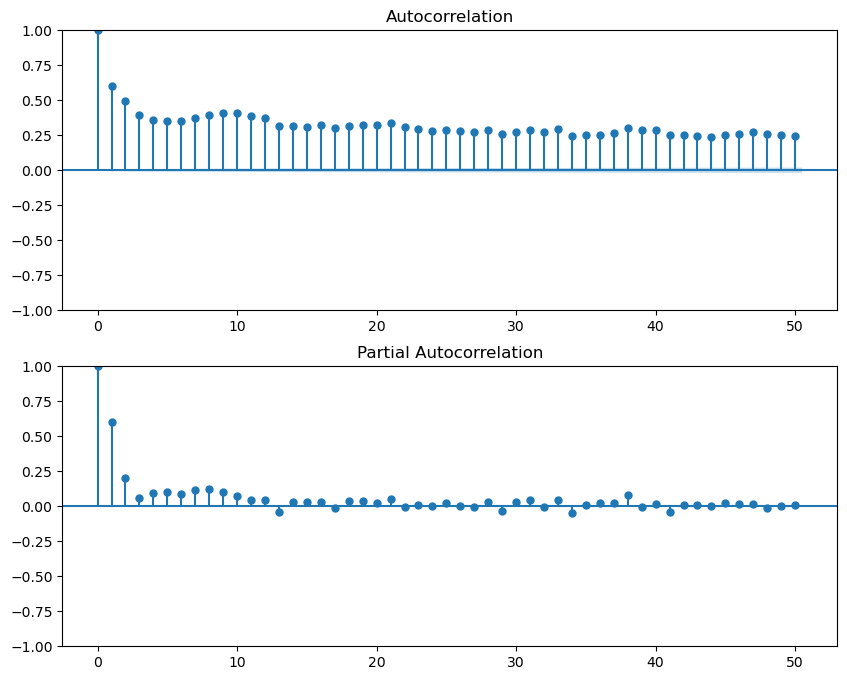

In [26]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

data = pd.read_csv("train_dataset_merged.csv", parse_dates=['week'])
data = data[['week', 'units_sold']].set_index('week')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['units_sold'], lags=50, ax=ax1)
plot_pacf(data['units_sold'], lags=50, ax=ax2)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

data = pd.read_csv("train_dataset_merged.csv")





x_values = data['units_sold']
y_values = data['week']


plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, color='blue', marker='o', label='Data Line')
plt.title('Line Chart of Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)


plt.show()




In [ ]:





from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


seasonal_diff_order = 1
seasonal_data = data['units_sold'].diff(seasonal_diff_order)


p = 2
d = 1 
q = 1


s = 52
P = 2
D = seasonal_diff_order
Q = 2


model = ARIMA(seasonal_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)


forecasted_values = forecast.cumsum() + data['units_sold'].iloc[-s:].values[-1]





In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['units_sold'], label='Observed')
plt.plot(forecast_index, forecasted_values, label='Predicted')
plt.plot(test_data.index, test_data['units_sold'], label='True')
plt.legend()
plt.show()